## Money Laundering Data Analysis
Notebook author: Philippe Heitzmann

In [7]:
import pandas as pd

file_path = "/data/AML exercise - dataset.xlsx"
df = pd.read_excel(file_path)

In [8]:
df.head()

Unnamed: 0     Send DateTime      Pay DateTime  Amount Sender Name_  \
0           0  12/26/2015 13:01   12/28/2015 9:19   990.0       name_1   
1           1  12/28/2015 15:36  12/28/2015 19:15   690.0       name_2   
2           2  11/30/2015 20:55   12/1/2015 18:39   990.0       name_3   
3           3   12/8/2015 15:33   12/8/2015 17:37  1000.0       name_4   
4           4  12/10/2015 14:48  12/10/2015 15:48   830.0       name_5   

  Sender Address_  Sender ID1 info     Sender City Sender State Payee Name_  \
0       address_1                1       PALO ALTO           CA    name_742   
1       address_2                0        SAN JOSE           CA   name_3020   
2       address_3                1    REDWOOD CITY           CA   name_3021   
3       address_4                1      SAN CARLOS           CA   name_2609   
4       address_5                0  EAST PALO ALTO           CA   name_3022   

   ... Send Agent State   Send Country Send Operator Name_ Pay Agent Name_  \
0  ...               CA  UNITED STATES     operator_name_3         agent_1   
1  ...               CA  UNITED STATES    operator_name_12         agent_2   
2  ...               CA  UNITED STATES     operator_name_3         agent_3   
3  ...               CA  UNITED STATES    operator_name_12         agent_4   
4  ...               CA  UNITED STATES    operator_name_12         agent_5   

  Pay Agent City Pay Agent State  Pay Country Pay Operator Name_ Sender Age  \
0        MORELIA             NaN       MEXICO    operator_name_0       40.0   
1     MANZANILLO             NaN       MEXICO    operator_name_0       50.0   
2          YANGA             NaN       MEXICO    operator_name_0       47.0   
3    GUADALAJARA             NaN       MEXICO    operator_name_0       51.0   
4   SAN SALVADOR             NaN  EL SALVADOR    operator_name_0       49.0   

  Payee Age  
0       NaN  
1       NaN  
2       NaN  
3      53.0  
4       NaN  

[5 rows x 26 columns]

## Part 1

#### A) Data Exploration

As a warmup, spend some time exploring the dataset. What patterns do you see in the data? Consider factors such as transaction size, transaction frequency, commonly used send and pay agents, send and pay locations, and so on. Visuals and explanations of your findings are encouraged throughout.

Visualizations to show:  

1. Histogram of "Amount" column transaction size → look for clusters below common reporting thresholds of $3k and $10k  
2. Boxplots of txn amounts grouped by sender/reciever age  
3. Barplot of txn counts / amounts by agents  
4. Hist of send and pay datetime columns → see send vs recieve time differences  
5. Boxplot of txn amounts by "Send Country" vs "Pay Country" (two separate boxplots)  
6. Side by side barplots of txn amounts ("Amount" column) by id provided vs not provided  
   - use columns "Payee ID1 info" and "Sender ID1 info" (so two separate barplots)  
7. Scatterplot of "Sender Age" vs "Amount" and "Payee Age" vs "Amount"  
8. Heatmap of txn amounts betwen send and pay states (columns: "Send Agent State" and "Pay Agent State")  

##### Data Cleaning

In [15]:
# ---- Setup & data prep -------------------------------------------------------
import pandas as pd
import numpy as np

# Path from your prompt
PATH = "/data/AML exercise - dataset.xlsx"

# Load dataset
df = pd.read_excel(PATH)

# Ensure key columns are the right dtypes
for col in ["Send DateTime", "Pay DateTime"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["Sender Age"] = pd.to_numeric(df["Sender Age"], errors="coerce")
df["Payee Age"] = pd.to_numeric(df["Payee Age"], errors="coerce")

# Simple helpers / engineered fields
df["Send Hour"] = df["Send DateTime"].dt.hour
df["Pay Hour"] = df["Pay DateTime"].dt.hour

# Age bands for clearer groupings
age_bins = [0, 24, 34, 44, 54, 64, np.inf]
age_labels = ["<25","25–34","35–44","45–54","55–64","65+"]

df["Sender Age Band"] = pd.cut(df["Sender Age"], bins=age_bins, labels=age_labels, right=True)
df["Payee Age Band"] = pd.cut(df["Payee Age"], bins=age_bins, labels=age_labels, right=True)

# ID provided flags
def id_provided(series):
    return series.astype(str).str.strip().replace({"nan": ""}).ne("")

df["Sender ID Provided"] = id_provided(df["Sender ID1 info"])
df["Payee ID Provided"]  = id_provided(df["Payee ID1 info"])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Initiated with figsize (12, 7)


##### Data Exploration with Visualizations

In [24]:
del viz
# Instantiate your Viz class with the dataframe
viz = Viz(df=df, figsize=(12, 7))

Initiated with figsize (12, 7)


(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Transaction Amounts (with common thresholds)'}, xlabel='Amount (USD)', ylabel='Count'>)

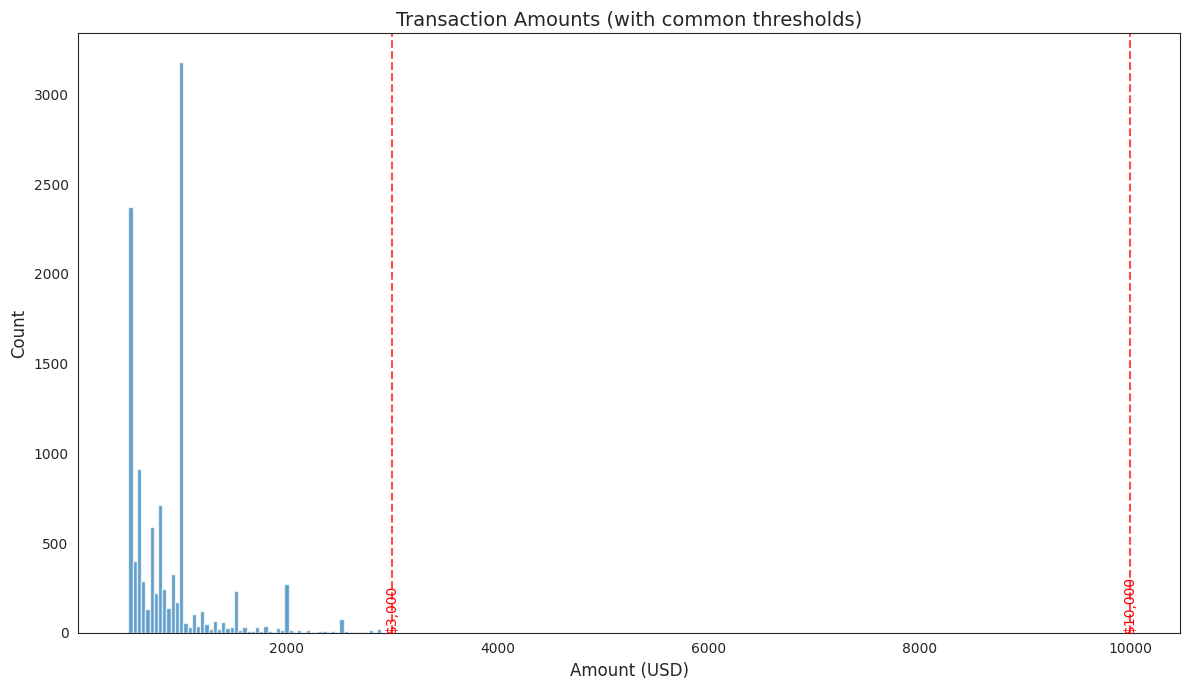

In [25]:
# ---- 1) Histogram of Amount (cluster near $3K and $10K) ----------------------
"""
What this shows:
A distribution of transaction sizes (Amount) with vertical reference lines at
$3,000 and $10,000 to visually inspect any clustering or structuring below
common reporting thresholds.
"""
viz.make_hist(
    "Amount",
    num_bins=60,
    title=("Transaction Amounts (with common thresholds)", 14),
    xlabel=("Amount (USD)", 12),
    ylabel=("Count", 12),
    vlines=[3000, 10000],
)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Transaction Amounts in $3K–$10K Band'}, xlabel='Amount (USD)', ylabel='Count'>)

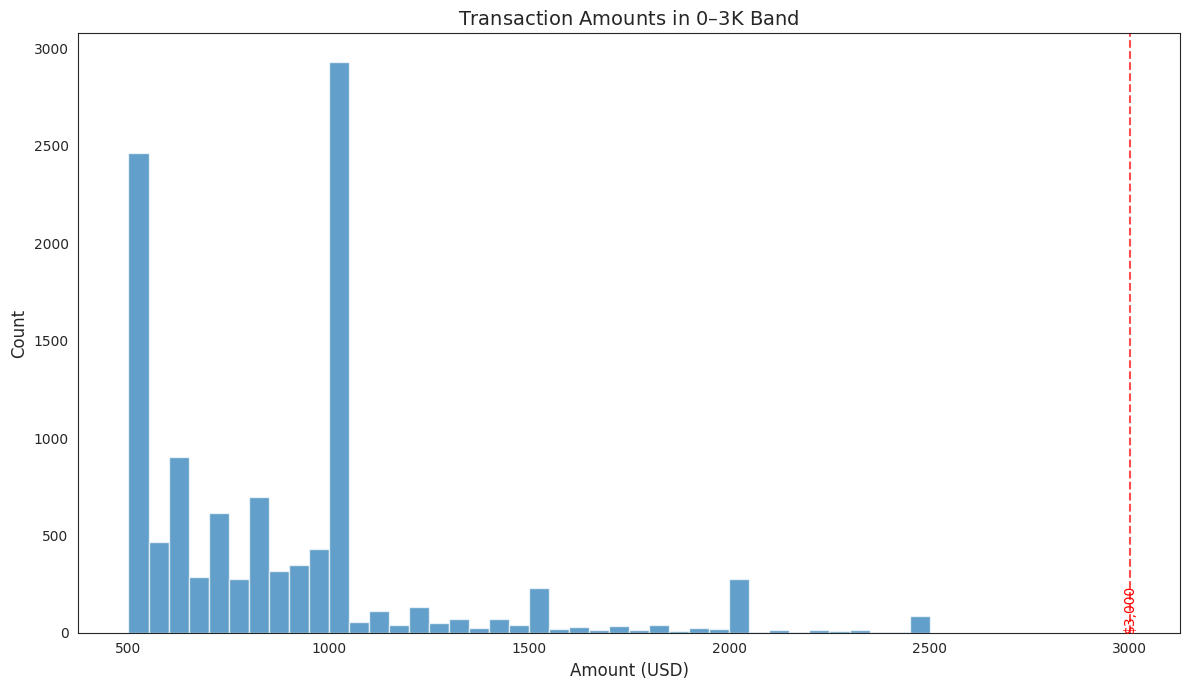

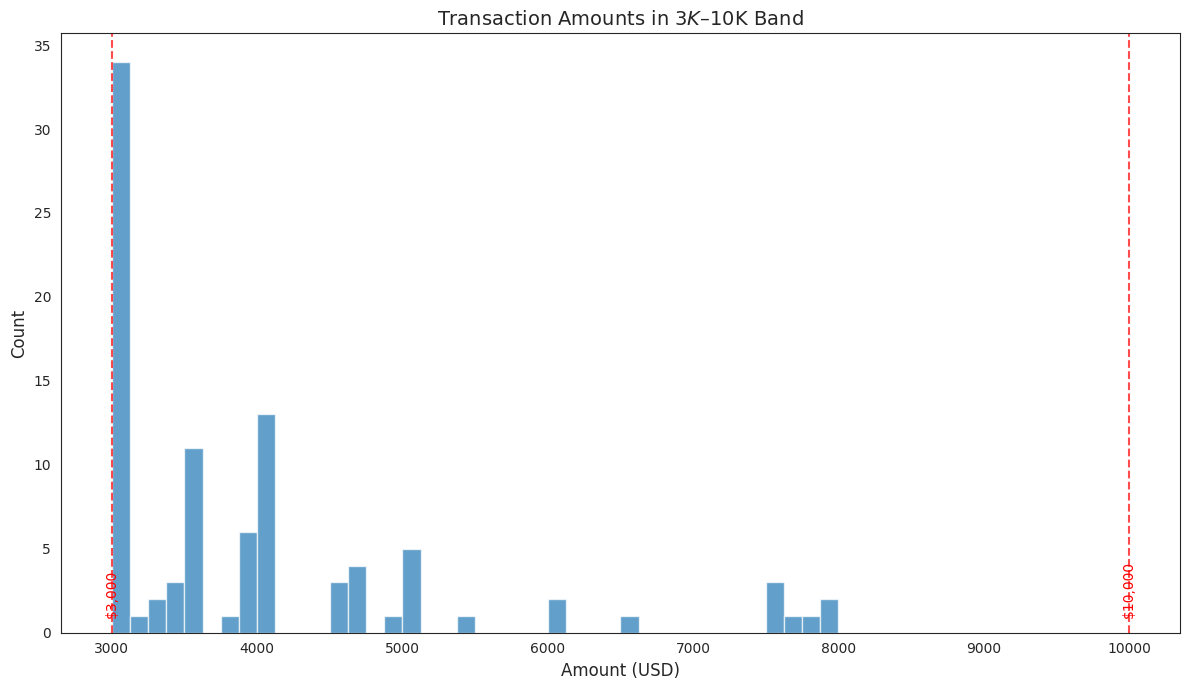

In [45]:
# ---- Histogram for 0–3K band --------------------------------
band_0_3k = df[df["Amount"].between(0, 3000)]

viz.make_hist(
    "Amount",
    df=band_0_3k,
    num_bins=40,
    title=("Transaction Amounts in $0–$3K Band", 14),
    xlabel=("Amount (USD)", 12),
    ylabel=("Count", 12),
    vlines=[3000],   # mark upper bound
)

# ---- Histogram for 3K–10K band -------------------------------
band_3k_10k = df[df["Amount"].between(3000, 10000)]

viz.make_hist(
    "Amount",
    df=band_3k_10k,
    num_bins=40,
    title=("Transaction Amounts in $3K–$10K Band", 14),
    xlabel=("Amount (USD)", 12),
    ylabel=("Count", 12),
    vlines=[3000, 10000],   # mark both bounds
)


/tmp/ipykernel_51/3338714858.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_dict = {str(grp[0]):grp[1][y].median() for grp in df.groupby(x)}
/tmp/ipykernel_51/3338714858.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_obs = df.groupby(x)[y].size().values
/tmp/ipykernel_51/3338714858.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_dict = {str(grp[0]):grp[1][y].median() for grp in df.gr

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Amount by Payee Age Band'}, xlabel='Payee Age Band', ylabel='Amount (USD)'>)

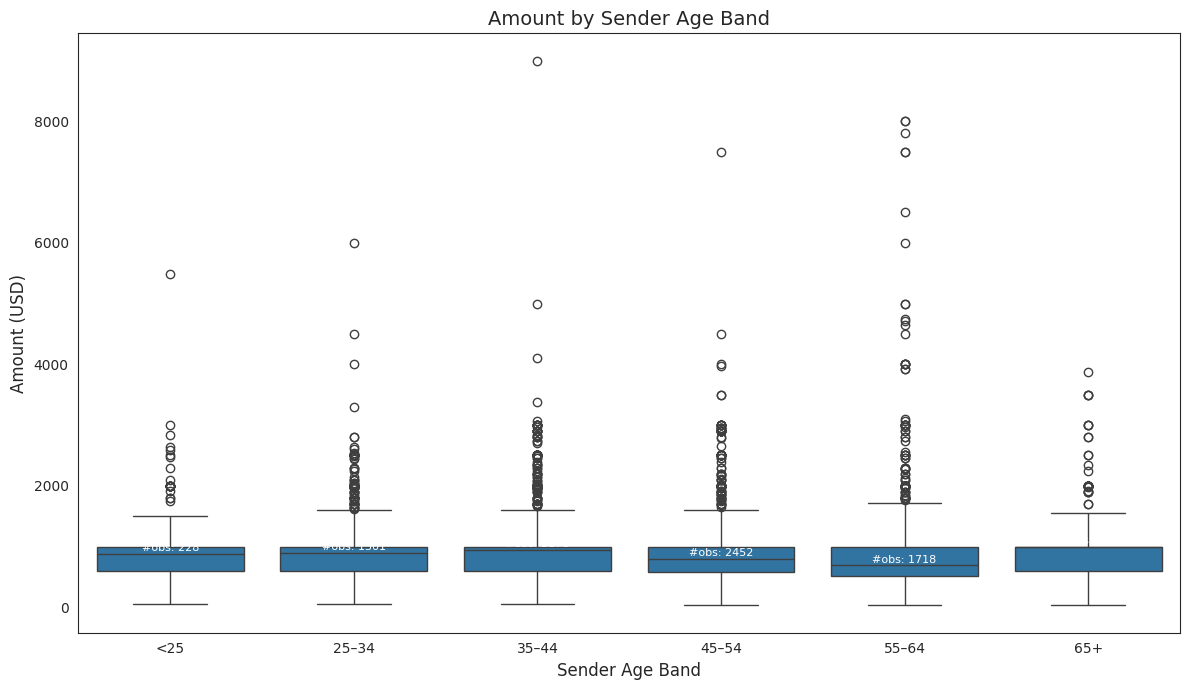

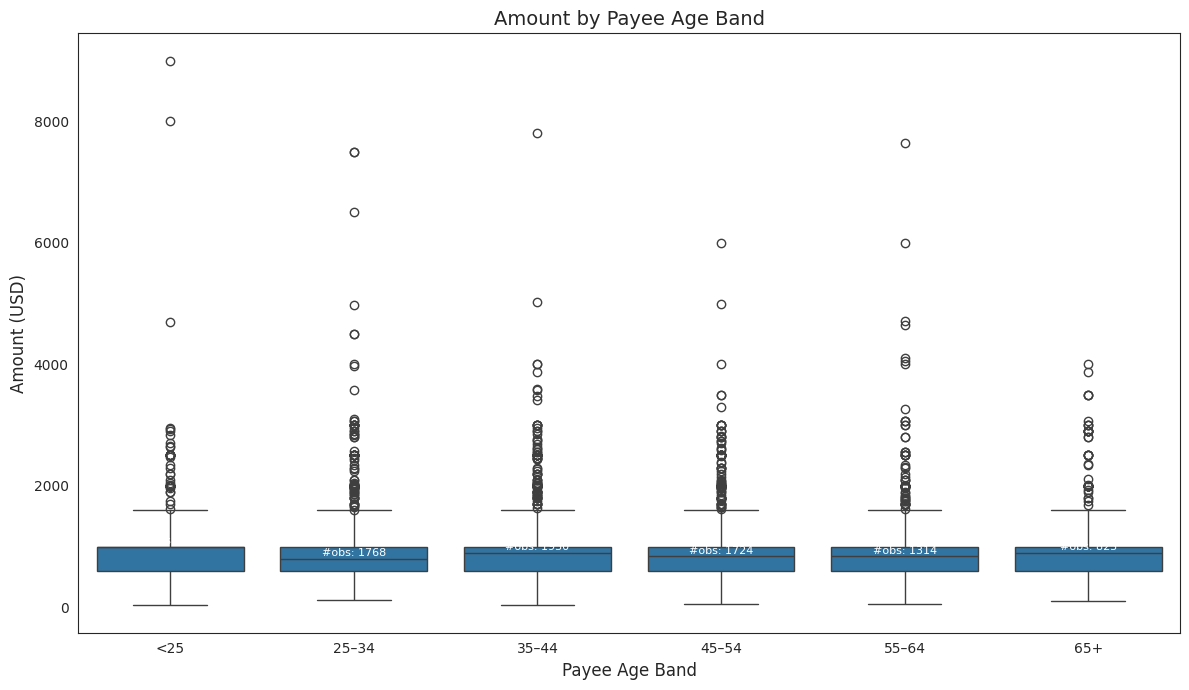

In [27]:
# ---- 2) Boxplots: Amount grouped by sender/receiver age ----------------------
"""
What this shows:
Two separate boxplots of transaction Amount by age bands—first by Sender Age,
then by Payee Age—to spot how distribution (median, spread, outliers) varies
across demographic segments.
"""
viz.make_boxplot(
    x="Sender Age Band",
    y="Amount",
    title=("Amount by Sender Age Band", 14),
    xlabel=("Sender Age Band", 12),
    ylabel=("Amount (USD)", 12),
)

viz.make_boxplot(
    x="Payee Age Band",
    y="Amount",
    title=("Amount by Payee Age Band", 14),
    xlabel=("Payee Age Band", 12),
    ylabel=("Amount (USD)", 12),
)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Top 15 Send Agents by Transaction Count'}, xlabel='Send Agent', ylabel='Count'>)

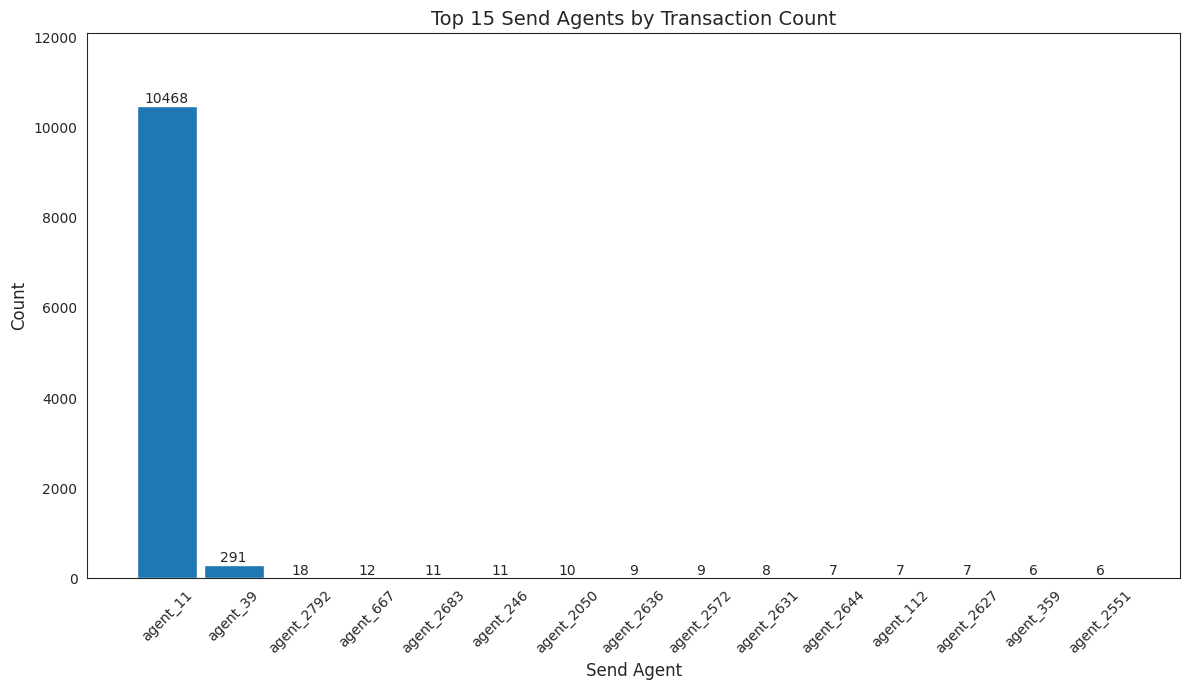

In [28]:
# ---- 3) Barplots: transaction counts / amounts by agents ---------------------
"""
What this shows:
Barplots ranking agents by activity. First by COUNT of transactions, then by
TOTAL Amount. Separate views for Send Agents and Pay Agents (top 15 in each),
useful to identify dominant outlets/partners by volume and value.
"""

# Top Send Agents by count
send_counts = (
    df["Send Agent Name_"].value_counts()
      .head(15)
      .rename_axis("Send Agent")
      .reset_index(name="Txn Count")
)
viz.make_barplot(
    x="Send Agent",
    height="Txn Count",
    df=send_counts,
    rotation=45,
    title=("Top 15 Send Agents by Transaction Count", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Count", 12),
    annots=True,
)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Top 15 Send Agents by Total Amount'}, xlabel='Send Agent', ylabel='Total Amount (USD)'>)

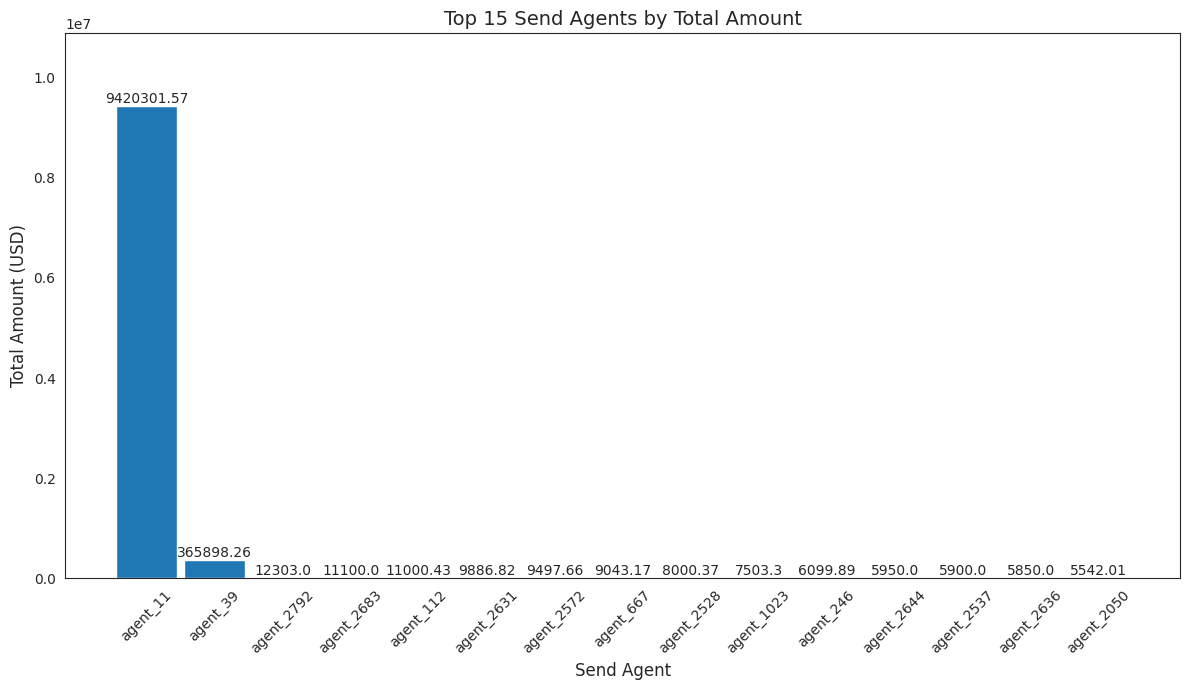

In [29]:
# Top Send Agents by total amount
send_amounts = (
    df.groupby("Send Agent Name_")["Amount"].sum()
      .sort_values(ascending=False)
      .head(15)
      .rename_axis("Send Agent")
      .reset_index(name="Total Amount")
)
viz.make_barplot(
    x="Send Agent",
    height="Total Amount",
    df=send_amounts,
    rotation=45,
    title=("Top 15 Send Agents by Total Amount", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Total Amount (USD)", 12),
    annots=True,
)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Top 15 Pay Agents by Transaction Count'}, xlabel='Pay Agent', ylabel='Count'>)

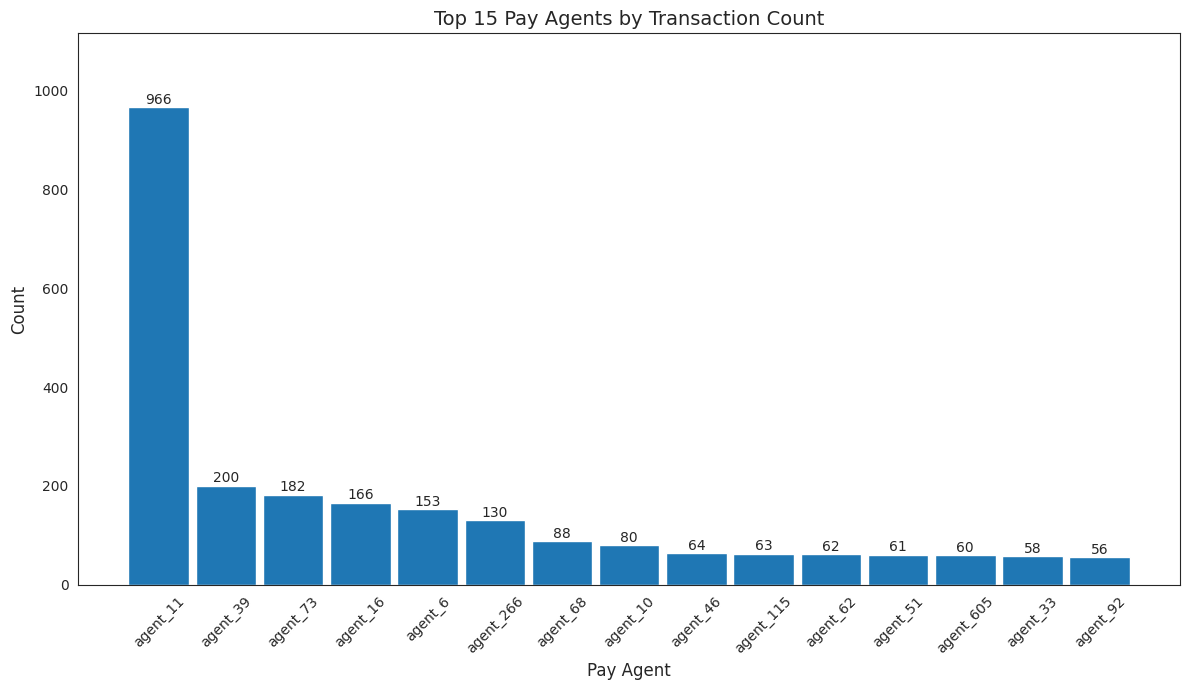

In [30]:
# Top Pay Agents by count
pay_counts = (
    df["Pay Agent Name_"].value_counts()
      .head(15)
      .rename_axis("Pay Agent")
      .reset_index(name="Txn Count")
)
viz.make_barplot(
    x="Pay Agent",
    height="Txn Count",
    df=pay_counts,
    rotation=45,
    title=("Top 15 Pay Agents by Transaction Count", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Count", 12),
    annots=True,
)

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Top 15 Pay Agents by Total Amount'}, xlabel='Pay Agent', ylabel='Total Amount (USD)'>)

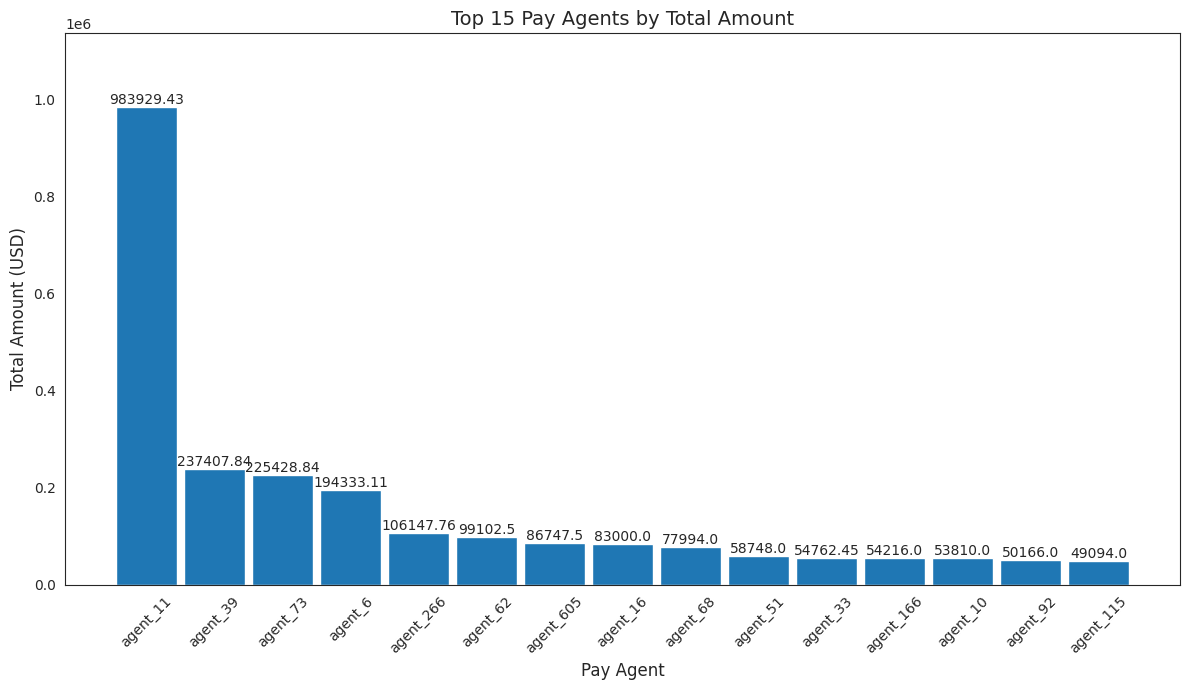

In [31]:
# Top Pay Agents by total amount
pay_amounts = (
    df.groupby("Pay Agent Name_")["Amount"].sum()
      .sort_values(ascending=False)
      .head(15)
      .rename_axis("Pay Agent")
      .reset_index(name="Total Amount")
)
viz.make_barplot(
    x="Pay Agent",
    height="Total Amount",
    df=pay_amounts,
    rotation=45,
    title=("Top 15 Pay Agents by Total Amount", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Total Amount (USD)", 12),
    annots=True,
)


(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Send vs Pay Activity by Hour of Day'}, xlabel='Hour of Day (local)', ylabel='Count'>)

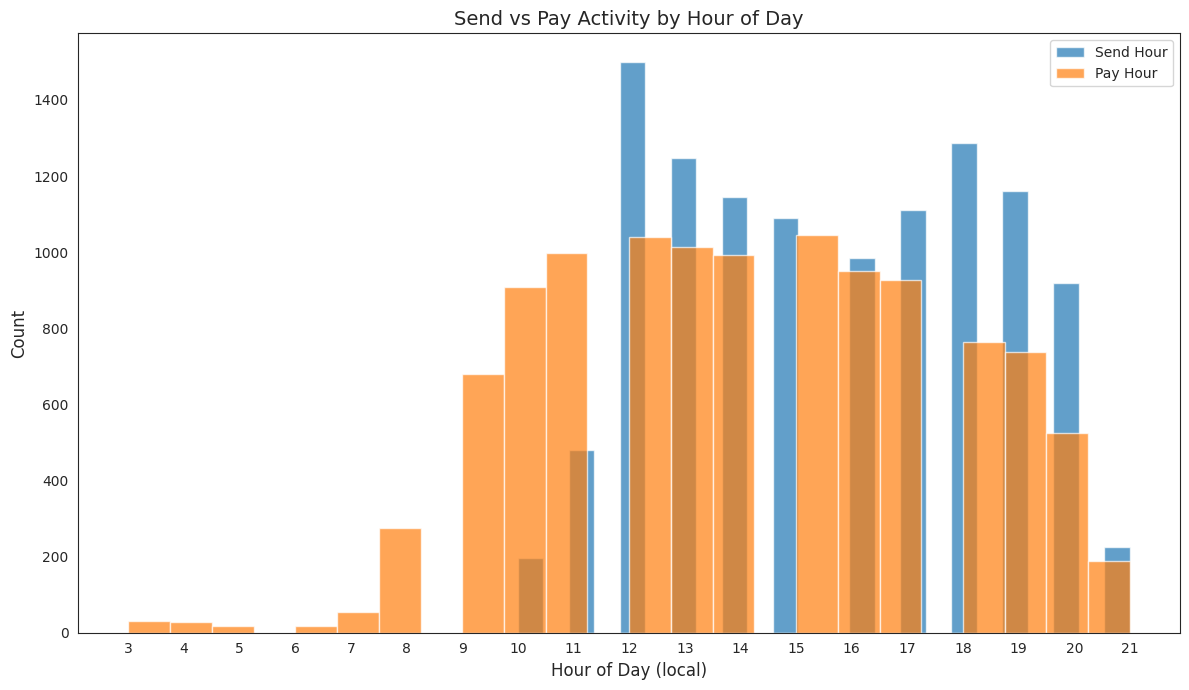

In [32]:
# ---- 4) Hist of Send vs Pay DateTime (hour-of-day) ---------------------------
"""
What this shows:
Two overlaid histograms of transaction activity by hour-of-day for the Send
and Pay timestamps (0–23). This highlights operational timing differences
between initiation and payout.
"""
viz.make_hist(
    "Send Hour",
    "Pay Hour",
    num_bins=24,
    title=("Send vs Pay Activity by Hour of Day", 14),
    xlabel=("Hour of Day (local)", 12),
    ylabel=("Count", 12),
    xticklocs=list(range(0, 24, 1)),
)



(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Amount by Pay Country (Top 15 by count)'}, xlabel='Pay Country', ylabel='Amount (USD)'>)

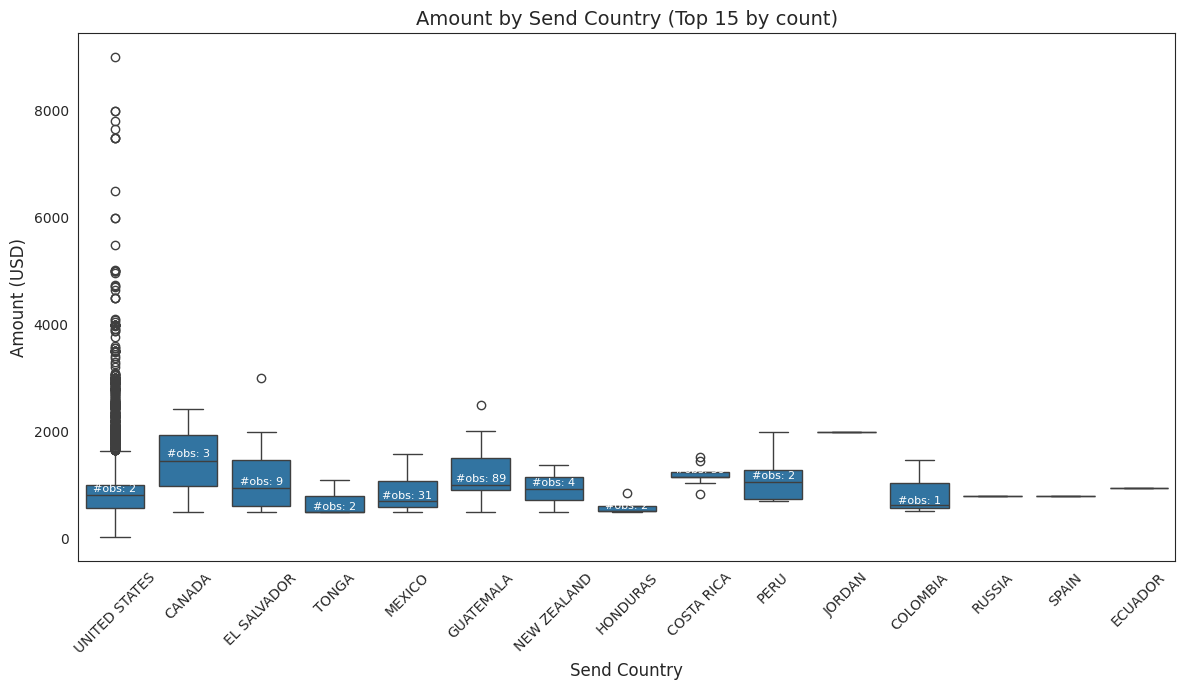

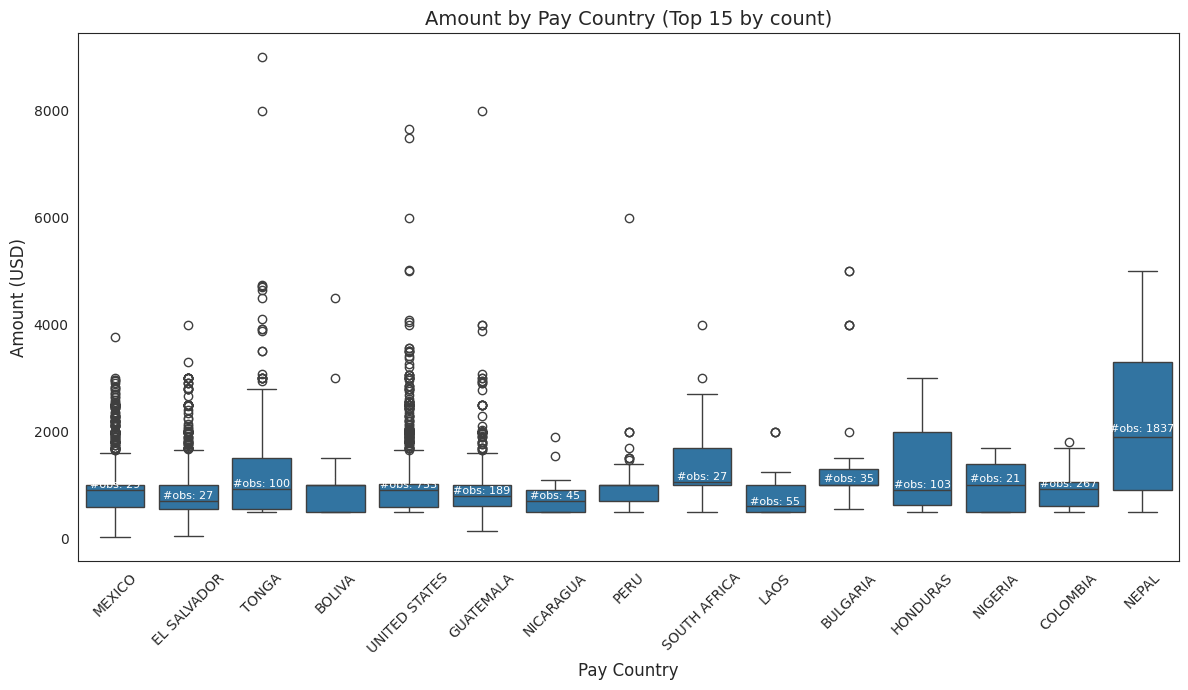

In [33]:
# ---- 5) Boxplots: Amount by Send Country and by Pay Country ------------------
"""
What this shows:
Two separate boxplots of Amount by Send Country and by Pay Country (each using
the top 15 countries by transaction count) to reveal country-level distribution
differences (medians, variability, outliers).
"""
top_send_countries = (
    df["Send Country"].value_counts().head(15).index
)
viz.make_boxplot(
    x="Send Country",
    y="Amount",
    df=df[df["Send Country"].isin(top_send_countries)],
    rotation=45,
    title=("Amount by Send Country (Top 15 by count)", 14),
    xlabel=("Send Country", 12),
    ylabel=("Amount (USD)", 12),
)

top_pay_countries = (
    df["Pay Country"].value_counts().head(15).index
)
viz.make_boxplot(
    x="Pay Country",
    y="Amount",
    df=df[df["Pay Country"].isin(top_pay_countries)],
    rotation=45,
    title=("Amount by Pay Country (Top 15 by count)", 14),
    xlabel=("Pay Country", 12),
    ylabel=("Amount (USD)", 12),
)

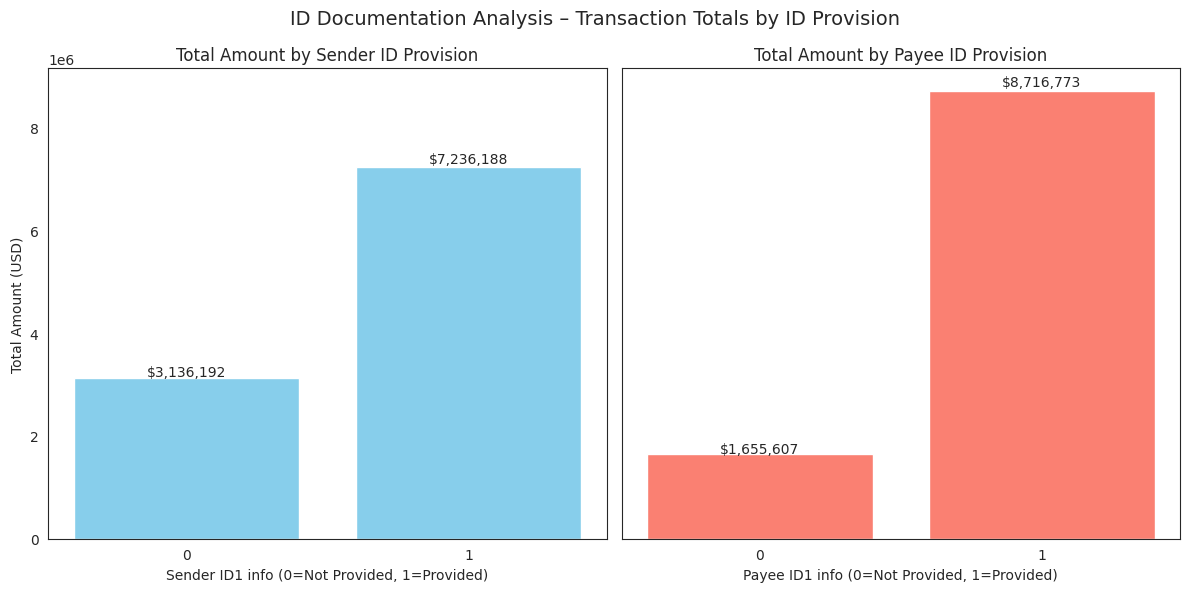

In [38]:
import matplotlib.pyplot as plt

# Aggregate total transaction Amount by ID flag (0 = not provided, 1 = provided)
sender_id_totals = df.groupby("Sender ID1 info")["Amount"].sum()
payee_id_totals  = df.groupby("Payee ID1 info")["Amount"].sum()

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# ---- Sender ID barplot ----
axes[0].bar(sender_id_totals.index.astype(str), sender_id_totals.values, color="skyblue")
axes[0].set_title("Total Amount by Sender ID Provision")
axes[0].set_xlabel("Sender ID1 info (0=Not Provided, 1=Provided)")
axes[0].set_ylabel("Total Amount (USD)")
for i, v in enumerate(sender_id_totals.values):
    axes[0].text(i, v + (0.01 * v), f"${v:,.0f}", ha="center", fontsize=10)

# ---- Payee ID barplot ----
axes[1].bar(payee_id_totals.index.astype(str), payee_id_totals.values, color="salmon")
axes[1].set_title("Total Amount by Payee ID Provision")
axes[1].set_xlabel("Payee ID1 info (0=Not Provided, 1=Provided)")
for i, v in enumerate(payee_id_totals.values):
    axes[1].text(i, v + (0.01 * v), f"${v:,.0f}", ha="center", fontsize=10)

plt.suptitle("ID Documentation Analysis – Transaction Totals by ID Provision", fontsize=14)
plt.tight_layout()
plt.show()


(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Payee Age vs Amount'}, xlabel='Payee Age', ylabel='Amount (USD)'>)

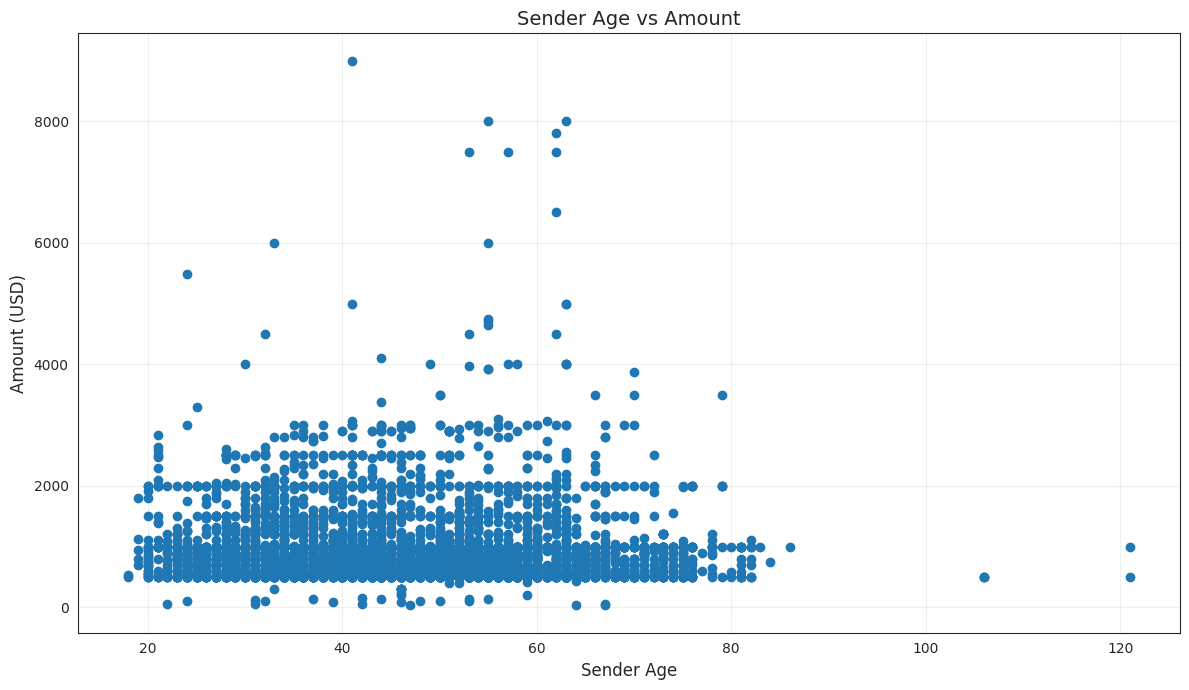

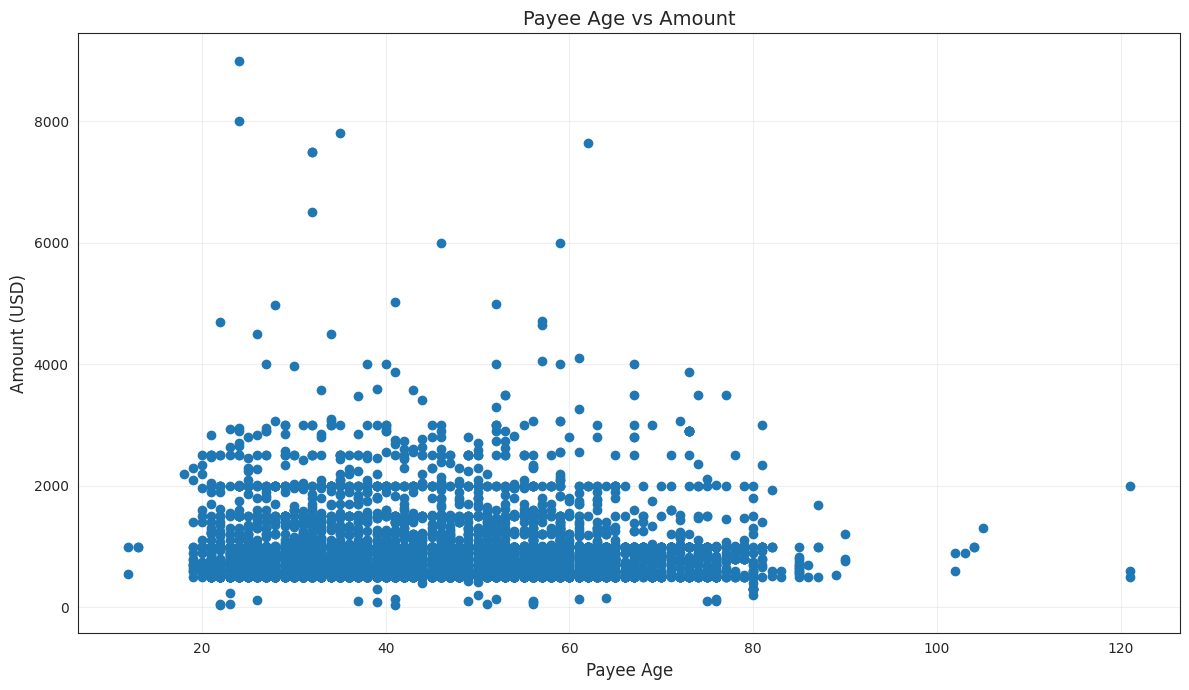

In [39]:

# ---- 7) Scatterplots: Age vs Amount (Sender and Payee) -----------------------
"""
What this shows:
Two scatterplots mapping Age to Amount—one for Sender, one for Payee—to spot
nonlinearities, caps, or clusters (e.g., frequent small sends from younger
senders vs occasional large sends from older segments).
"""
viz.make_scatter(
    "Sender Age", "Amount",
    title=("Sender Age vs Amount", 14),
    xlabel=("Sender Age", 12),
    ylabel=("Amount (USD)", 12),
)

viz.make_scatter(
    "Payee Age", "Amount",
    title=("Payee Age vs Amount", 14),
    xlabel=("Payee Age", 12),
    ylabel=("Amount (USD)", 12),
)

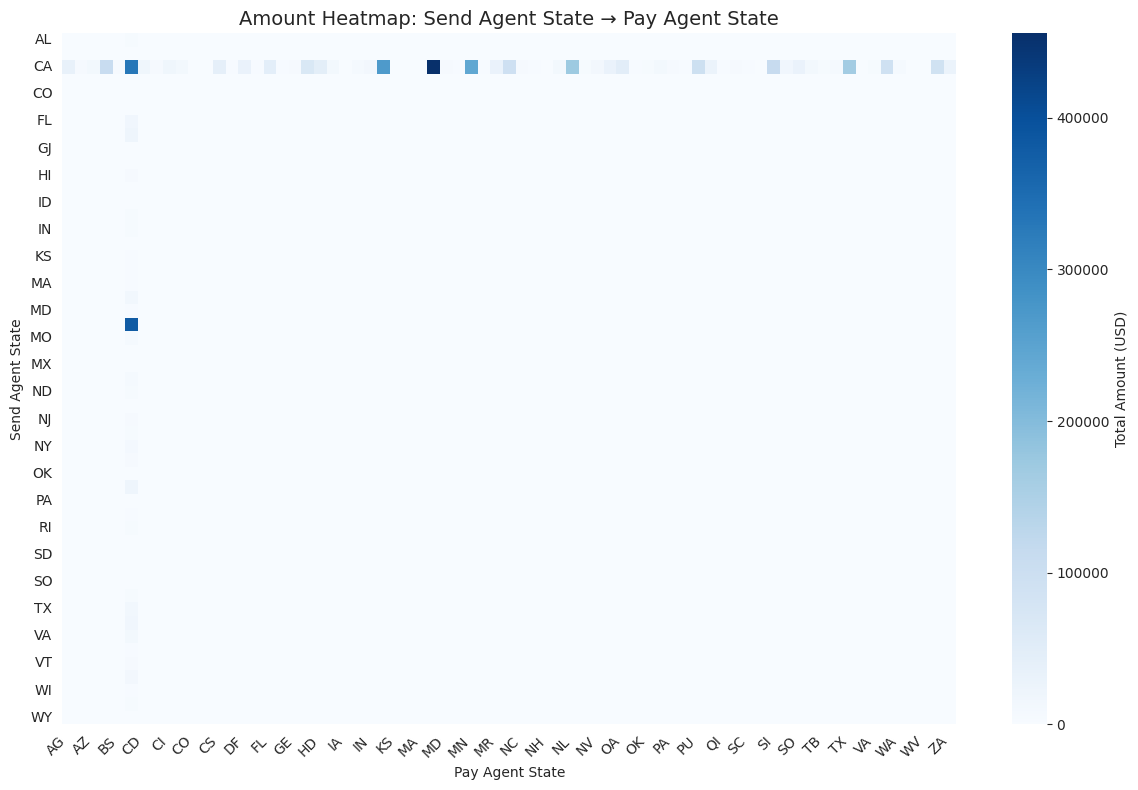

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot to create matrix of Send Agent State (rows) vs Pay Agent State (columns)
state_matrix = (
    df.pivot_table(
        index="Send Agent State",
        columns="Pay Agent State",
        values="Amount",
        aggfunc="sum",
        fill_value=0.0,
    )
    .sort_index()
    .sort_index(axis=1)
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    state_matrix,
    cmap="Blues",
    annot=False,       # set to True if you want actual numbers shown
    fmt=".0f",
    cbar_kws={"label": "Total Amount (USD)"}
)

plt.title("Amount Heatmap: Send Agent State → Pay Agent State", fontsize=14)
plt.xlabel("Pay Agent State")
plt.ylabel("Send Agent State")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


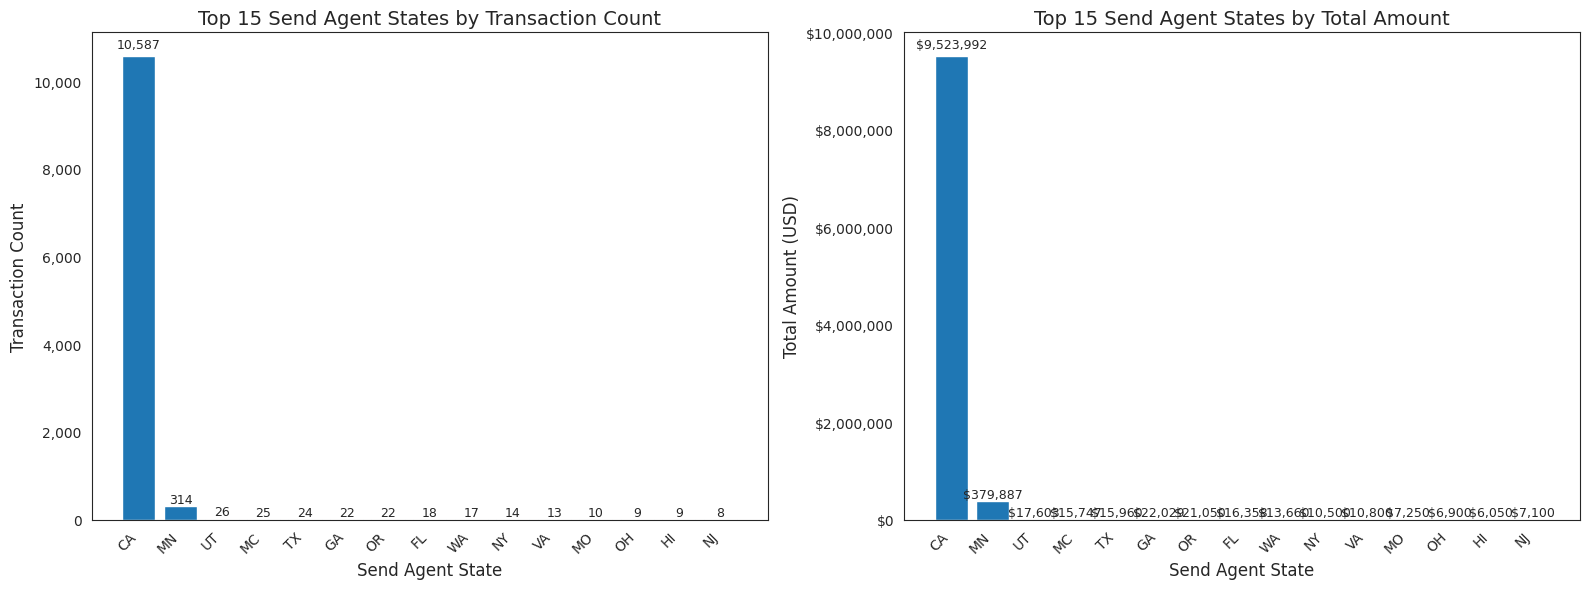

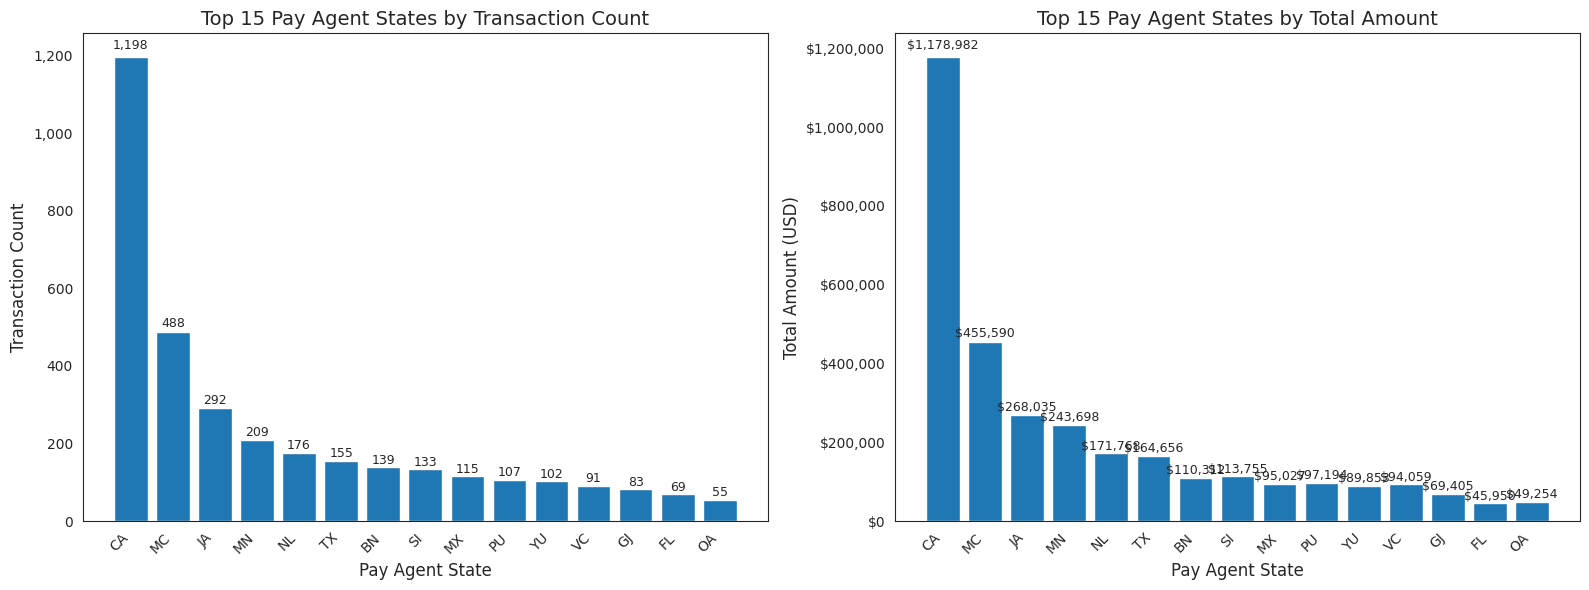

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Helper formatters
thousands_fmt = FuncFormatter(lambda x, pos: f"{x:,.0f}")
dollar_fmt    = FuncFormatter(lambda x, pos: f"${x:,.0f}")

TOP_N = 15

# ------------------- SEND AGENT STATES -------------------
# Counts
send_counts = (
    df["Send Agent State"]
    .value_counts()
    .head(TOP_N)
    .rename_axis("Send Agent State")
    .reset_index(name="Txn Count")
)

# Total Amounts (align to top states by count)
send_amounts = (
    df.groupby("Send Agent State")["Amount"].sum()
    .rename("Total Amount")
    .reset_index()
)
send_amounts = send_amounts[send_amounts["Send Agent State"].isin(send_counts["Send Agent State"])]
send_amounts = send_amounts.set_index("Send Agent State").loc[send_counts["Send Agent State"]].reset_index()

# Figure: Send Agent States
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left subplot: counts
axes[0].bar(send_counts["Send Agent State"], send_counts["Txn Count"])
axes[0].set_title("Top 15 Send Agent States by Transaction Count", fontsize=14)
axes[0].set_xlabel("Send Agent State", fontsize=12)
axes[0].set_ylabel("Transaction Count", fontsize=12)
axes[0].yaxis.set_major_formatter(thousands_fmt)
axes[0].tick_params(axis="x", labelrotation=45)
for tick in axes[0].get_xticklabels():
    tick.set_ha("right")
for i, v in enumerate(send_counts["Txn Count"].values):
    axes[0].text(i, v * 1.01, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

# Right subplot: total amounts
axes[1].bar(send_amounts["Send Agent State"], send_amounts["Total Amount"])
axes[1].set_title("Top 15 Send Agent States by Total Amount", fontsize=14)
axes[1].set_xlabel("Send Agent State", fontsize=12)
axes[1].set_ylabel("Total Amount (USD)", fontsize=12)
axes[1].yaxis.set_major_formatter(dollar_fmt)
axes[1].tick_params(axis="x", labelrotation=45)
for tick in axes[1].get_xticklabels():
    tick.set_ha("right")
for i, v in enumerate(send_amounts["Total Amount"].values):
    axes[1].text(i, v * 1.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# ------------------- PAY AGENT STATES -------------------
# Counts
pay_counts = (
    df["Pay Agent State"]
    .value_counts()
    .head(TOP_N)
    .rename_axis("Pay Agent State")
    .reset_index(name="Txn Count")
)

# Total Amounts (align to top states by count)
pay_amounts = (
    df.groupby("Pay Agent State")["Amount"].sum()
    .rename("Total Amount")
    .reset_index()
)
pay_amounts = pay_amounts[pay_amounts["Pay Agent State"].isin(pay_counts["Pay Agent State"])]
pay_amounts = pay_amounts.set_index("Pay Agent State").loc[pay_counts["Pay Agent State"]].reset_index()

# Figure: Pay Agent States
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left subplot: counts
axes[0].bar(pay_counts["Pay Agent State"], pay_counts["Txn Count"])
axes[0].set_title("Top 15 Pay Agent States by Transaction Count", fontsize=14)
axes[0].set_xlabel("Pay Agent State", fontsize=12)
axes[0].set_ylabel("Transaction Count", fontsize=12)
axes[0].yaxis.set_major_formatter(thousands_fmt)
axes[0].tick_params(axis="x", labelrotation=45)
for tick in axes[0].get_xticklabels():
    tick.set_ha("right")
for i, v in enumerate(pay_counts["Txn Count"].values):
    axes[0].text(i, v * 1.01, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

# Right subplot: total amounts
axes[1].bar(pay_amounts["Pay Agent State"], pay_amounts["Total Amount"])
axes[1].set_title("Top 15 Pay Agent States by Total Amount", fontsize=14)
axes[1].set_xlabel("Pay Agent State", fontsize=12)
axes[1].set_ylabel("Total Amount (USD)", fontsize=12)
axes[1].yaxis.set_major_formatter(dollar_fmt)
axes[1].tick_params(axis="x", labelrotation=45)
for tick in axes[1].get_xticklabels():
    tick.set_ha("right")
for i, v in enumerate(pay_amounts["Total Amount"].values):
    axes[1].text(i, v * 1.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


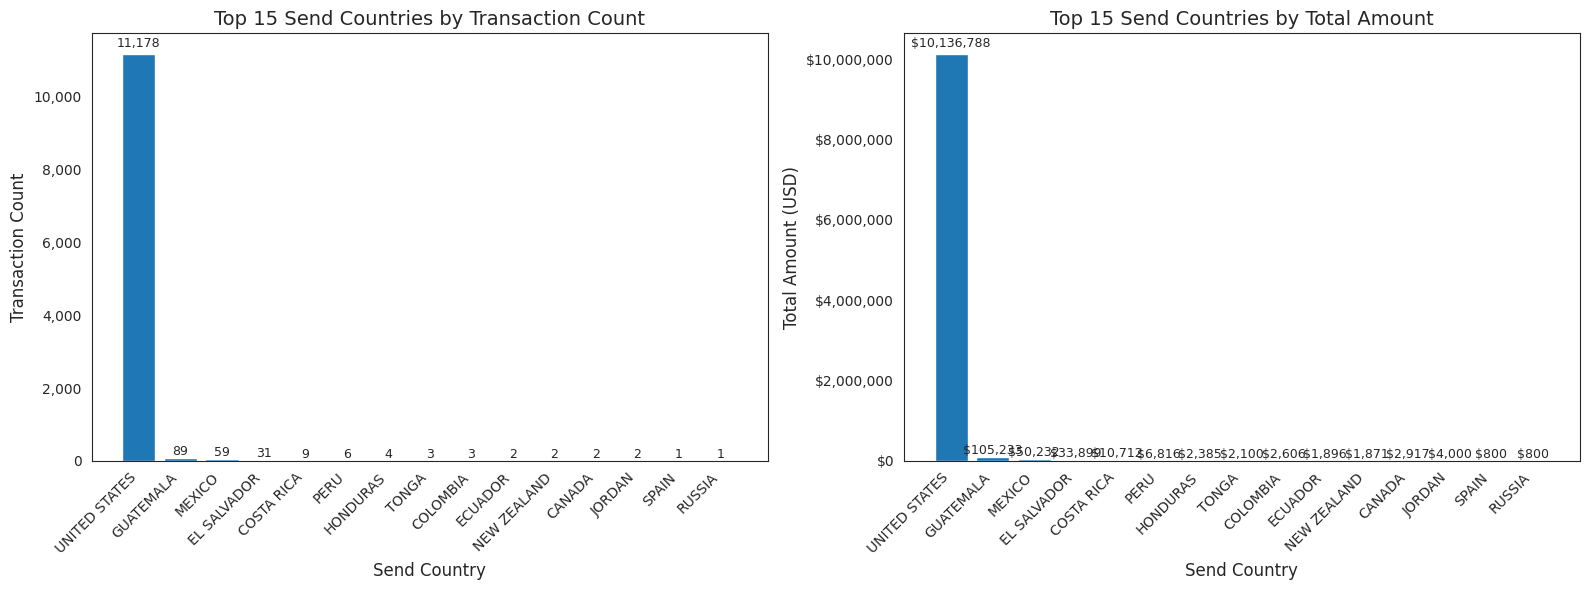

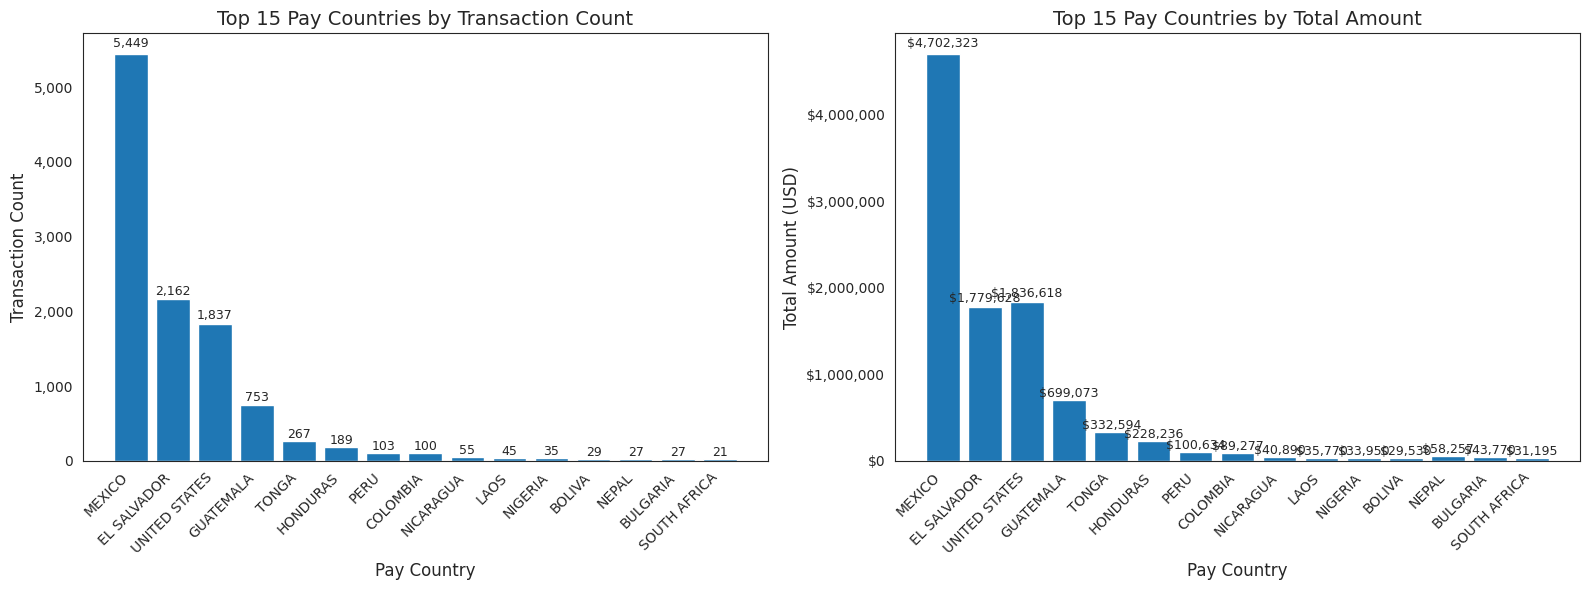

In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Formatters
thousands_fmt = FuncFormatter(lambda x, pos: f"{x:,.0f}")
dollar_fmt    = FuncFormatter(lambda x, pos: f"${x:,.0f}")

TOP_N = 15

# ------------------- SEND COUNTRY -------------------
# Counts
send_country_counts = (
    df["Send Country"]
    .value_counts()
    .head(TOP_N)
    .rename_axis("Send Country")
    .reset_index(name="Txn Count")
)

# Total Amounts (aligned to top count countries)
send_country_amounts = (
    df.groupby("Send Country")["Amount"].sum()
    .rename("Total Amount")
    .reset_index()
)
send_country_amounts = send_country_amounts[
    send_country_amounts["Send Country"].isin(send_country_counts["Send Country"])
]
send_country_amounts = (
    send_country_amounts
    .set_index("Send Country")
    .loc[send_country_counts["Send Country"]]
    .reset_index()
)

# Figure: Send Country
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: counts
axes[0].bar(send_country_counts["Send Country"], send_country_counts["Txn Count"])
axes[0].set_title("Top 15 Send Countries by Transaction Count", fontsize=14)
axes[0].set_xlabel("Send Country", fontsize=12)
axes[0].set_ylabel("Transaction Count", fontsize=12)
axes[0].yaxis.set_major_formatter(thousands_fmt)
axes[0].tick_params(axis="x", labelrotation=45)
for tick in axes[0].get_xticklabels():
    tick.set_ha("right")
for i, v in enumerate(send_country_counts["Txn Count"].values):
    axes[0].text(i, v * 1.01, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

# Right: amounts
axes[1].bar(send_country_amounts["Send Country"], send_country_amounts["Total Amount"])
axes[1].set_title("Top 15 Send Countries by Total Amount", fontsize=14)
axes[1].set_xlabel("Send Country", fontsize=12)
axes[1].set_ylabel("Total Amount (USD)", fontsize=12)
axes[1].yaxis.set_major_formatter(dollar_fmt)
axes[1].tick_params(axis="x", labelrotation=45)
for tick in axes[1].get_xticklabels():
    tick.set_ha("right")
for i, v in enumerate(send_country_amounts["Total Amount"].values):
    axes[1].text(i, v * 1.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


# ------------------- PAY COUNTRY -------------------
# Counts
pay_country_counts = (
    df["Pay Country"]
    .value_counts()
    .head(TOP_N)
    .rename_axis("Pay Country")
    .reset_index(name="Txn Count")
)

# Total Amounts (aligned to top count countries)
pay_country_amounts = (
    df.groupby("Pay Country")["Amount"].sum()
    .rename("Total Amount")
    .reset_index()
)
pay_country_amounts = pay_country_amounts[
    pay_country_amounts["Pay Country"].isin(pay_country_counts["Pay Country"])
]
pay_country_amounts = (
    pay_country_amounts
    .set_index("Pay Country")
    .loc[pay_country_counts["Pay Country"]]
    .reset_index()
)

# Figure: Pay Country
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: counts
axes[0].bar(pay_country_counts["Pay Country"], pay_country_counts["Txn Count"])
axes[0].set_title("Top 15 Pay Countries by Transaction Count", fontsize=14)
axes[0].set_xlabel("Pay Country", fontsize=12)
axes[0].set_ylabel("Transaction Count", fontsize=12)
axes[0].yaxis.set_major_formatter(thousands_fmt)
axes[0].tick_params(axis="x", labelrotation=45)
for tick in axes[0].get_xticklabels():
    tick.set_ha("right")
for i, v in enumerate(pay_country_counts["Txn Count"].values):
    axes[0].text(i, v * 1.01, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

# Right: amounts
axes[1].bar(pay_country_amounts["Pay Country"], pay_country_amounts["Total Amount"])
axes[1].set_title("Top 15 Pay Countries by Total Amount", fontsize=14)
axes[1].set_xlabel("Pay Country", fontsize=12)
axes[1].set_ylabel("Total Amount (USD)", fontsize=12)
axes[1].yaxis.set_major_formatter(dollar_fmt)
axes[1].tick_params(axis="x", labelrotation=45)
for tick in axes[1].get_xticklabels():
    tick.set_ha("right")
for i, v in enumerate(pay_country_amounts["Total Amount"].values):
    axes[1].text(i, v * 1.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


#### B) Hypotheses based on Exploration

List out some hypotheses as to what indicates a suspicious transaction. Feel free to use external sources, such as FINCEN to guide you. Make sure to explain why your hypotheses might indicate suspicious behavior.

For example, a short time between the wiring and receiving of a transaction may be suspicious because the quick reception of a transfer means that the receiver was informed that the transaction would be coming through (these transactions are being wired and received in person).

## Part 2

#### A) Hypothesis Testing

1. Test the hypotheses. What interesting or suspicious patterns can you find? Share any supporting analysis and visualizations. In your analysis, be sure to test:
    1. Transaction amount/size,
    2. Transaction frequency, 
    3. Short time between wiring and receiving, 
    4. Any other hypotheses you found compelling.

FINCEN knowledge context:

- \$10K Threshold: Any business or financial institution must file a Currency Transaction Report (CTR) with FinCEN for cash transactions exceeding \$10,000 in a single day, whether from one transaction or several aggregated transactions that surpass the threshold.

- \$3K Threshold: Financial institutions and Money Services Businesses (MSBs) are required to keep detailed records for any funds transfer, payment, or purchase of monetary instruments (like bank checks, cashier's checks, money orders, or traveler's checks) made in cash between \$3,000 and \$10,000

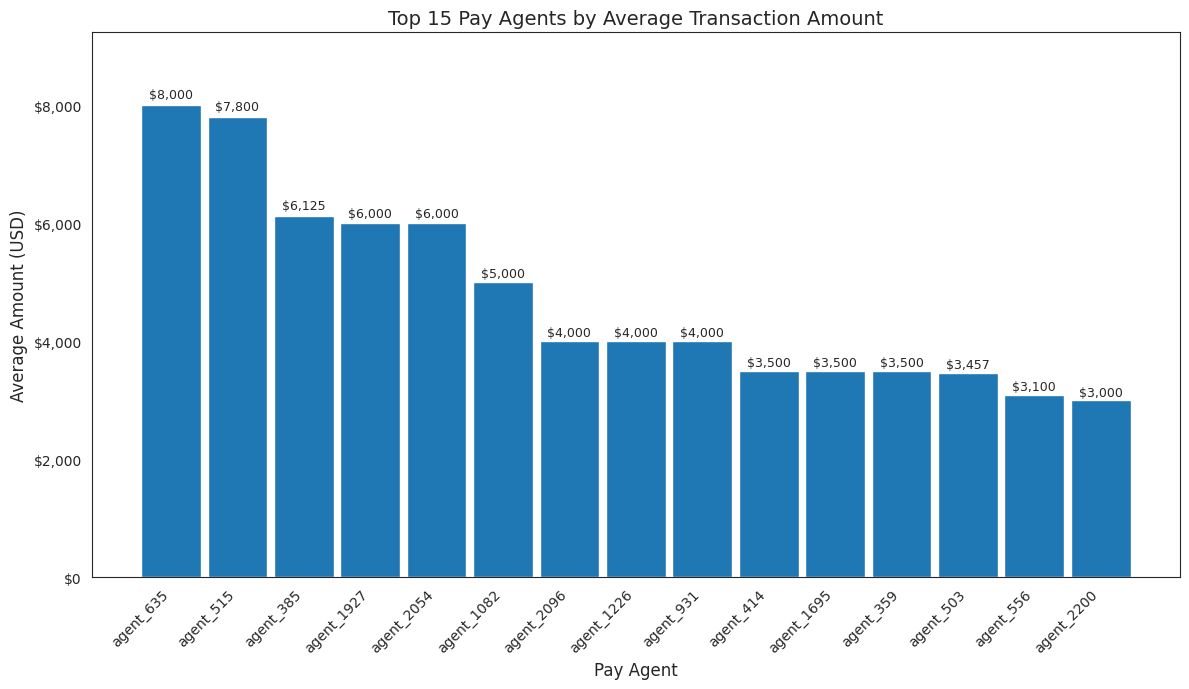

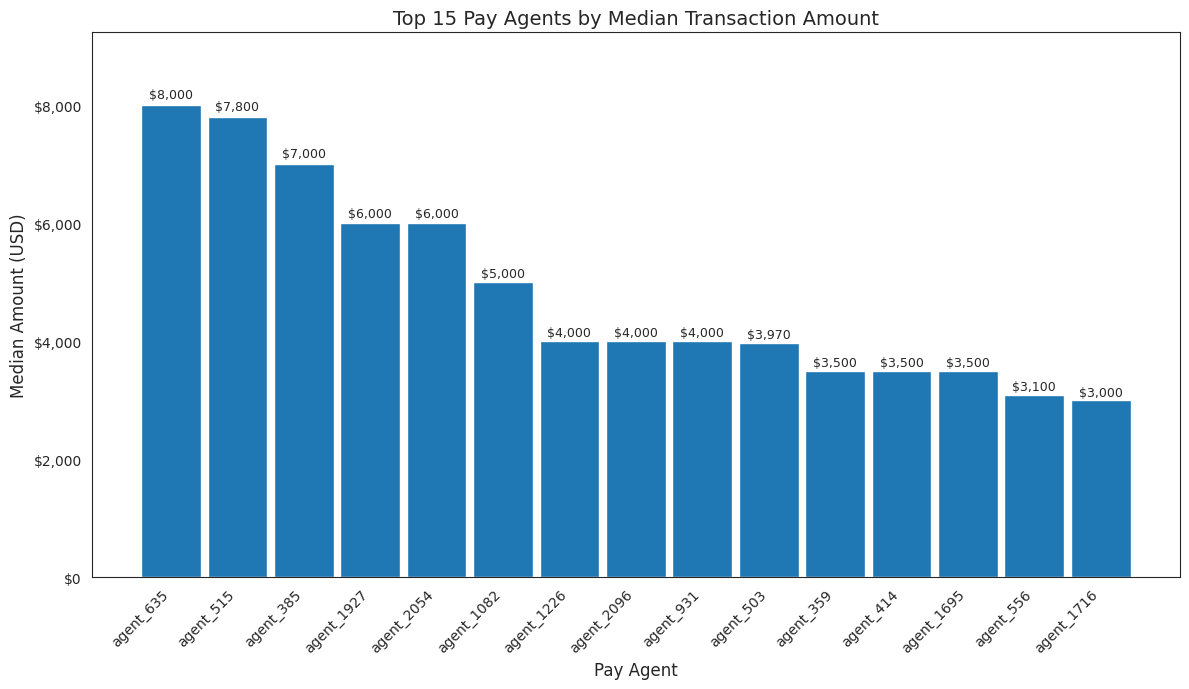

In [43]:
import pandas as pd
from matplotlib.ticker import FuncFormatter

# --- Aggregate average & median by Pay Agent ---
pay_stats = df.groupby("Pay Agent Name_")["Amount"].agg(mean="mean", median="median")

# Top 15 by average
top_avg = (pay_stats
           .sort_values("mean", ascending=False)
           .head(15)
           .reset_index()
           .rename(columns={"Pay Agent Name_": "Pay Agent", "mean": "Average Amount"}))

# Top 15 by median
top_med = (pay_stats
           .sort_values("median", ascending=False)
           .head(15)
           .reset_index()
           .rename(columns={"Pay Agent Name_": "Pay Agent", "median": "Median Amount"}))

# Dollar formatter for y-axis
dollar_fmt = FuncFormatter(lambda x, pos: f'${x:,.0f}')

# ---------- Plot: Top 15 by AVERAGE ----------
fig, ax = viz.make_barplot(
    x="Pay Agent",
    height="Average Amount",
    df=top_avg,
    rotation=45,                         # rotate ticks
    title=("Top 15 Pay Agents by Average Transaction Amount", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Average Amount (USD)", 12),
    annots=False                         # we'll add our own labels
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():       # fix alignment (avoid tick_params ha=...)
    tick.set_ha('right')

# add dollar labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y * 1.01,
            f"${y:,.0f}", ha="center", va="bottom", fontsize=9)

fig.tight_layout()

# ---------- Plot: Top 15 by MEDIAN ----------
fig, ax = viz.make_barplot(
    x="Pay Agent",
    height="Median Amount",
    df=top_med,
    rotation=45,
    title=("Top 15 Pay Agents by Median Transaction Amount", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Median Amount (USD)", 12),
    annots=False
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha('right')

for rect in ax.patches:
    y = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y * 1.01,
            f"${y:,.0f}", ha="center", va="bottom", fontsize=9)

fig.tight_layout()


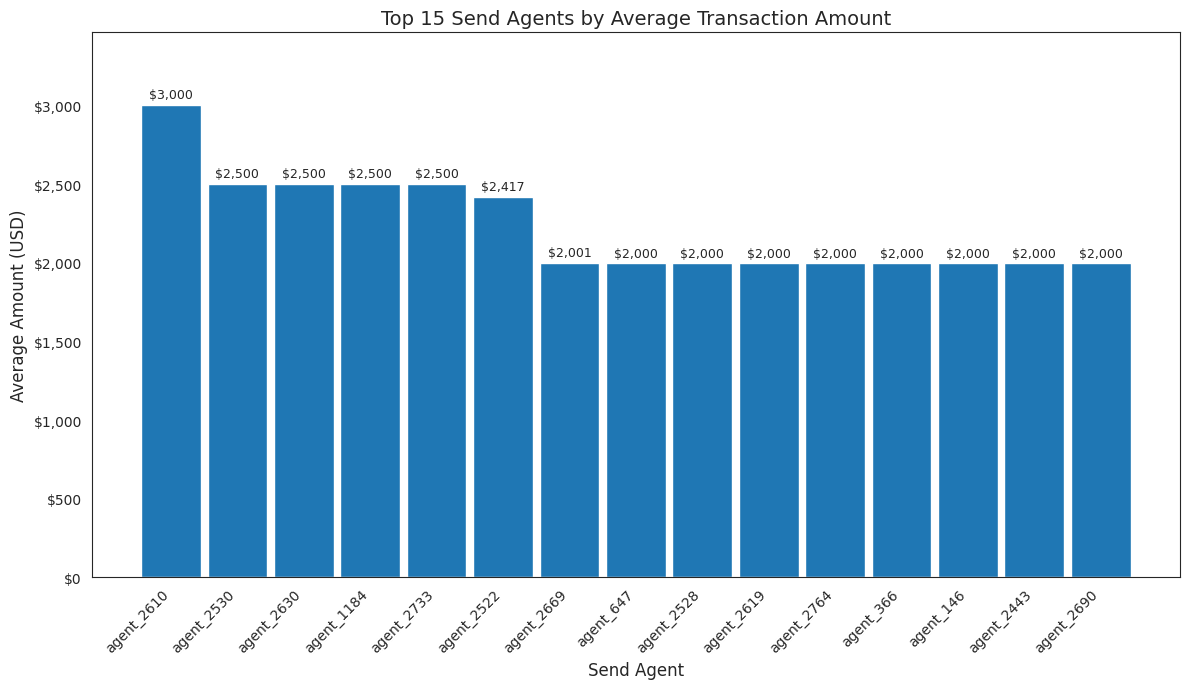

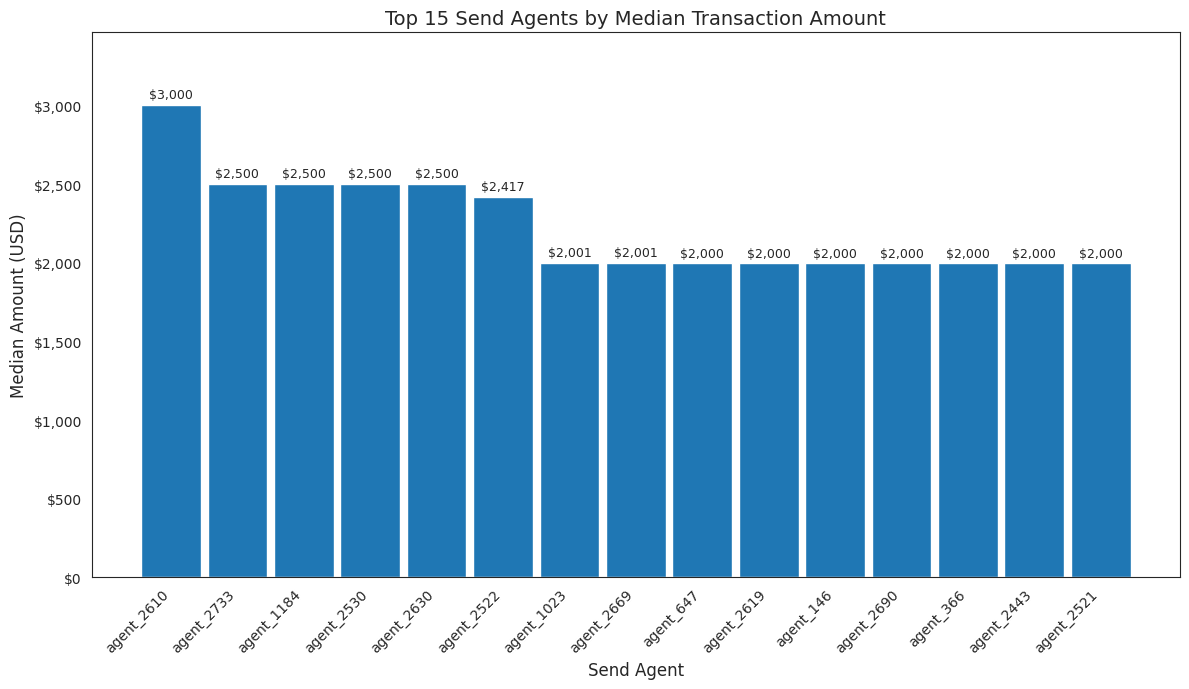

In [44]:
from matplotlib.ticker import FuncFormatter

# --- Aggregate average & median by Send Agent ---
send_stats = df.groupby("Send Agent Name_")["Amount"].agg(mean="mean", median="median")

# Top 15 by average
top_avg_send = (send_stats
                .sort_values("mean", ascending=False)
                .head(15)
                .reset_index()
                .rename(columns={"Send Agent Name_": "Send Agent", "mean": "Average Amount"}))

# Top 15 by median
top_med_send = (send_stats
                .sort_values("median", ascending=False)
                .head(15)
                .reset_index()
                .rename(columns={"Send Agent Name_": "Send Agent", "median": "Median Amount"}))

# Dollar formatter for y-axis
dollar_fmt = FuncFormatter(lambda x, pos: f'${x:,.0f}')

# ---------- Plot: Top 15 by AVERAGE ----------
fig, ax = viz.make_barplot(
    x="Send Agent",
    height="Average Amount",
    df=top_avg_send,
    rotation=45,
    title=("Top 15 Send Agents by Average Transaction Amount", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Average Amount (USD)", 12),
    annots=False
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha('right')

# Add dollar labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y * 1.01,
            f"${y:,.0f}", ha="center", va="bottom", fontsize=9)

fig.tight_layout()

# ---------- Plot: Top 15 by MEDIAN ----------
fig, ax = viz.make_barplot(
    x="Send Agent",
    height="Median Amount",
    df=top_med_send,
    rotation=45,
    title=("Top 15 Send Agents by Median Transaction Amount", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Median Amount (USD)", 12),
    annots=False
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha('right')

# Add dollar labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y * 1.01,
            f"${y:,.0f}", ha="center", va="bottom", fontsize=9)

fig.tight_layout()


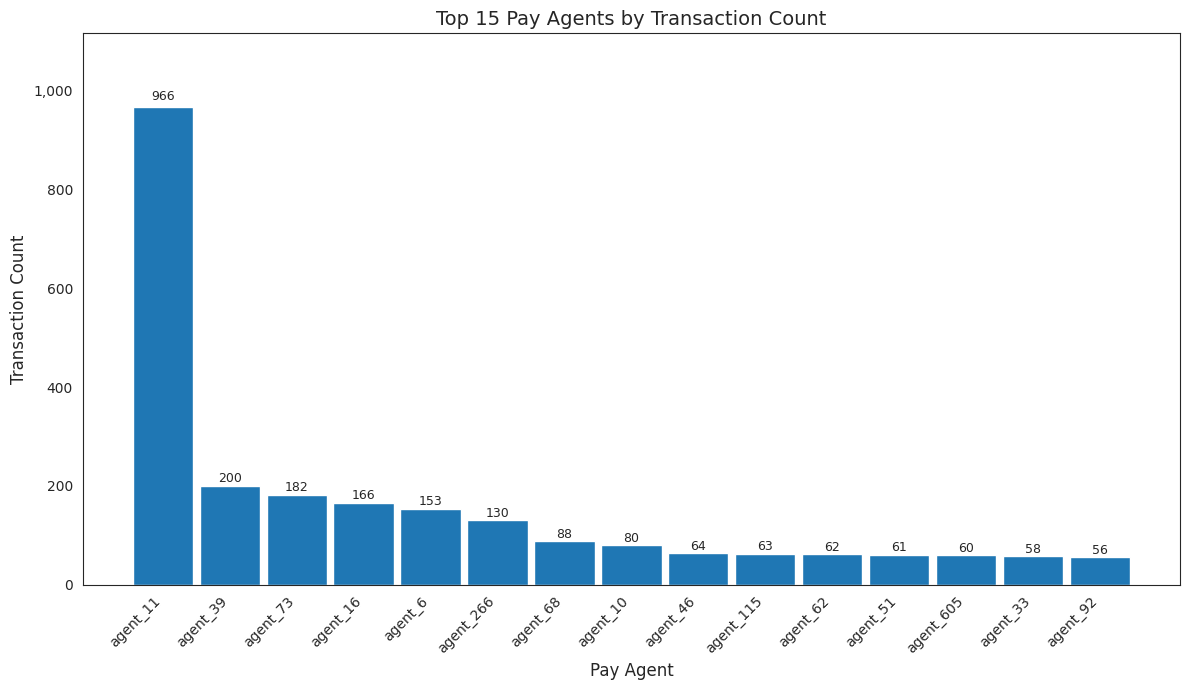

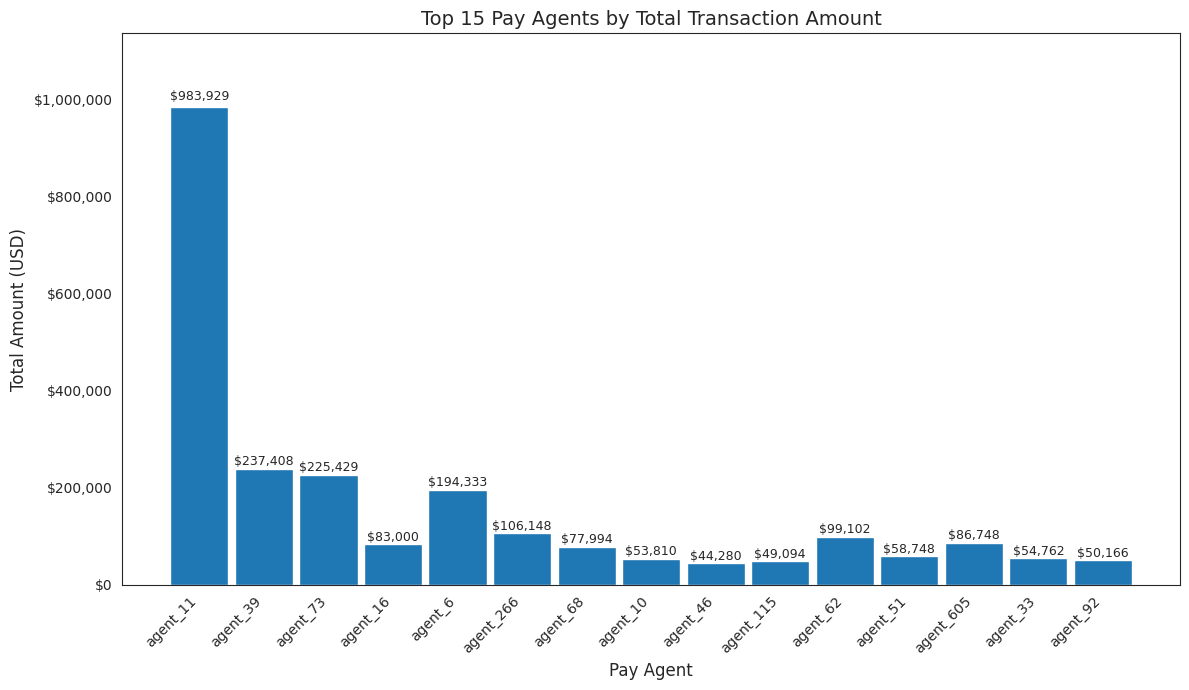

In [48]:
import pandas as pd
from matplotlib.ticker import FuncFormatter

# --- Aggregate transaction counts and total amounts by Pay Agent ---
pay_stats = df.groupby("Pay Agent Name_").agg(
    Txn_Count=("Amount", "size"),
    Total_Amount=("Amount", "sum")
)

# Get Top 15 agents by transaction count
top_txn_agents = (
    pay_stats
    .sort_values("Txn_Count", ascending=False)
    .head(15)
    .reset_index()
    .rename(columns={"Pay Agent Name_": "Pay Agent"})
)

# Formatters
thousands_fmt = FuncFormatter(lambda x, pos: f"{x:,.0f}")
dollar_fmt    = FuncFormatter(lambda x, pos: f'${x:,.0f}')

# ---------- Plot: Transaction Count ----------
fig, ax = viz.make_barplot(
    x="Pay Agent",
    height="Txn_Count",
    df=top_txn_agents,
    rotation=45,
    title=("Top 15 Pay Agents by Transaction Count", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Transaction Count", 12),
    annots=False
)
ax.yaxis.set_major_formatter(thousands_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha("right")

# add labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width()/2, y * 1.01,
        f"{y:,.0f}", ha="center", va="bottom", fontsize=9
    )

fig.tight_layout()

# ---------- Plot: Total Transaction Amount ----------
fig, ax = viz.make_barplot(
    x="Pay Agent",
    height="Total_Amount",
    df=top_txn_agents,
    rotation=45,
    title=("Top 15 Pay Agents by Total Transaction Amount", 14),
    xlabel=("Pay Agent", 12),
    ylabel=("Total Amount (USD)", 12),
    annots=False
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha("right")

# add labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width()/2, y * 1.01,
        f"${y:,.0f}", ha="center", va="bottom", fontsize=9
    )

fig.tight_layout()


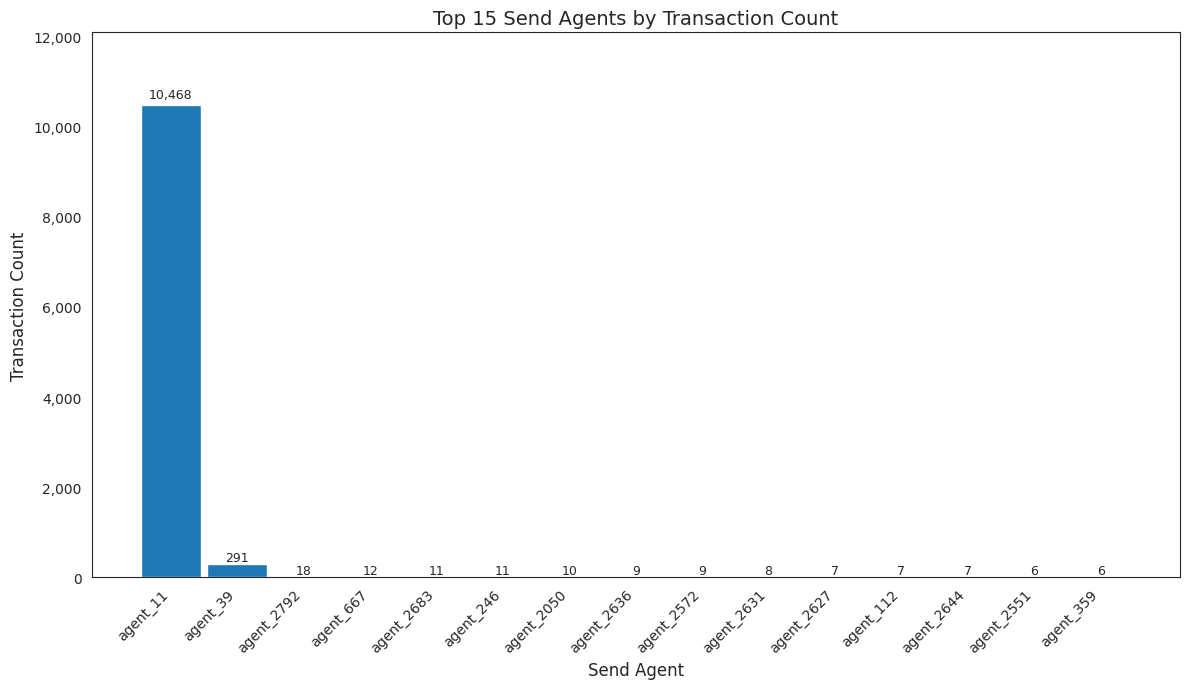

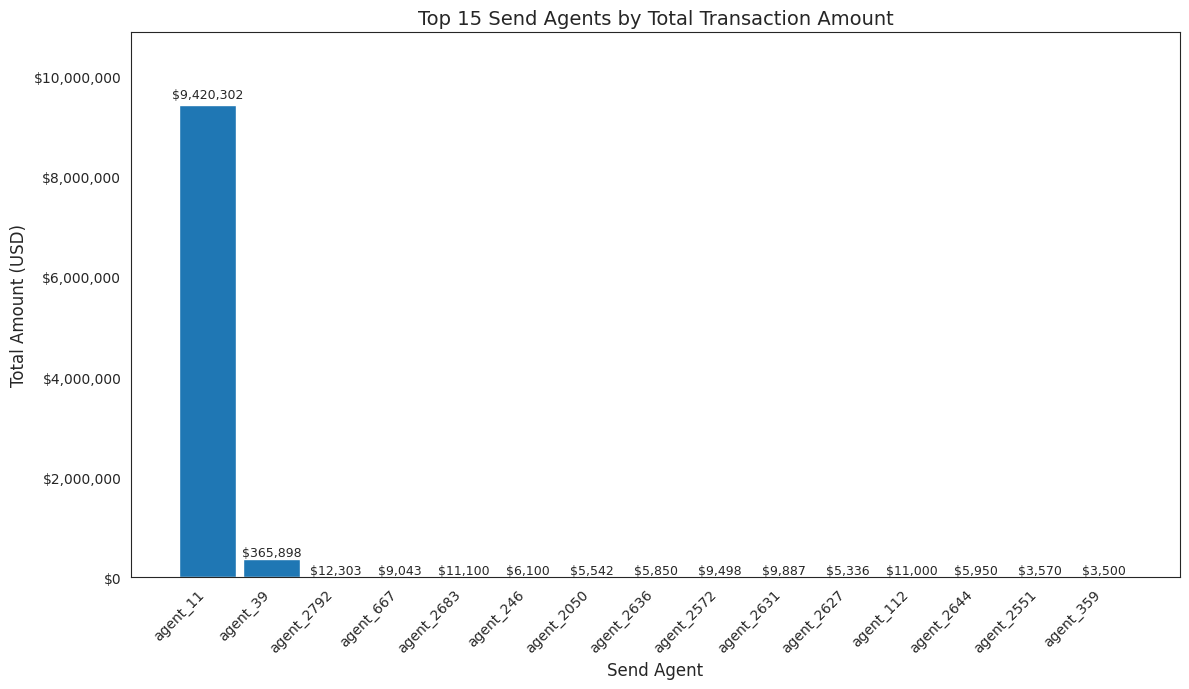

In [49]:
import pandas as pd
from matplotlib.ticker import FuncFormatter

# --- Aggregate transaction counts and total amounts by Send Agent ---
send_stats = df.groupby("Send Agent Name_").agg(
    Txn_Count=("Amount", "size"),
    Total_Amount=("Amount", "sum")
)

# Get Top 15 agents by transaction count
top_txn_send_agents = (
    send_stats
    .sort_values("Txn_Count", ascending=False)
    .head(15)
    .reset_index()
    .rename(columns={"Send Agent Name_": "Send Agent"})
)

# Formatters
thousands_fmt = FuncFormatter(lambda x, pos: f"{x:,.0f}")
dollar_fmt    = FuncFormatter(lambda x, pos: f'${x:,.0f}')

# ---------- Plot: Transaction Count ----------
fig, ax = viz.make_barplot(
    x="Send Agent",
    height="Txn_Count",
    df=top_txn_send_agents,
    rotation=45,
    title=("Top 15 Send Agents by Transaction Count", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Transaction Count", 12),
    annots=False
)
ax.yaxis.set_major_formatter(thousands_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha("right")

# add labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width()/2, y * 1.01,
        f"{y:,.0f}", ha="center", va="bottom", fontsize=9
    )

fig.tight_layout()

# ---------- Plot: Total Transaction Amount ----------
fig, ax = viz.make_barplot(
    x="Send Agent",
    height="Total_Amount",
    df=top_txn_send_agents,
    rotation=45,
    title=("Top 15 Send Agents by Total Transaction Amount", 14),
    xlabel=("Send Agent", 12),
    ylabel=("Total Amount (USD)", 12),
    annots=False
)
ax.yaxis.set_major_formatter(dollar_fmt)
for tick in ax.get_xticklabels():
    tick.set_ha("right")

# add labels above bars
for rect in ax.patches:
    y = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width()/2, y * 1.01,
        f"${y:,.0f}", ha="center", va="bottom", fontsize=9
    )

fig.tight_layout()


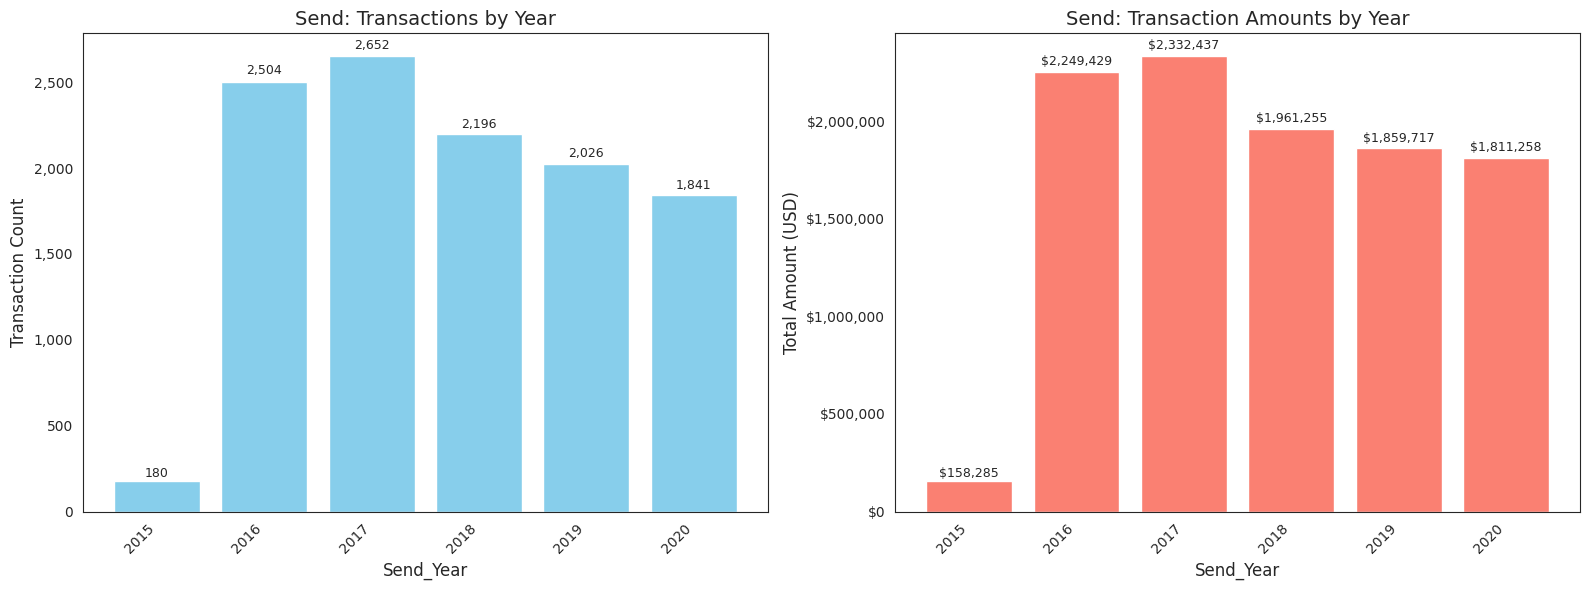

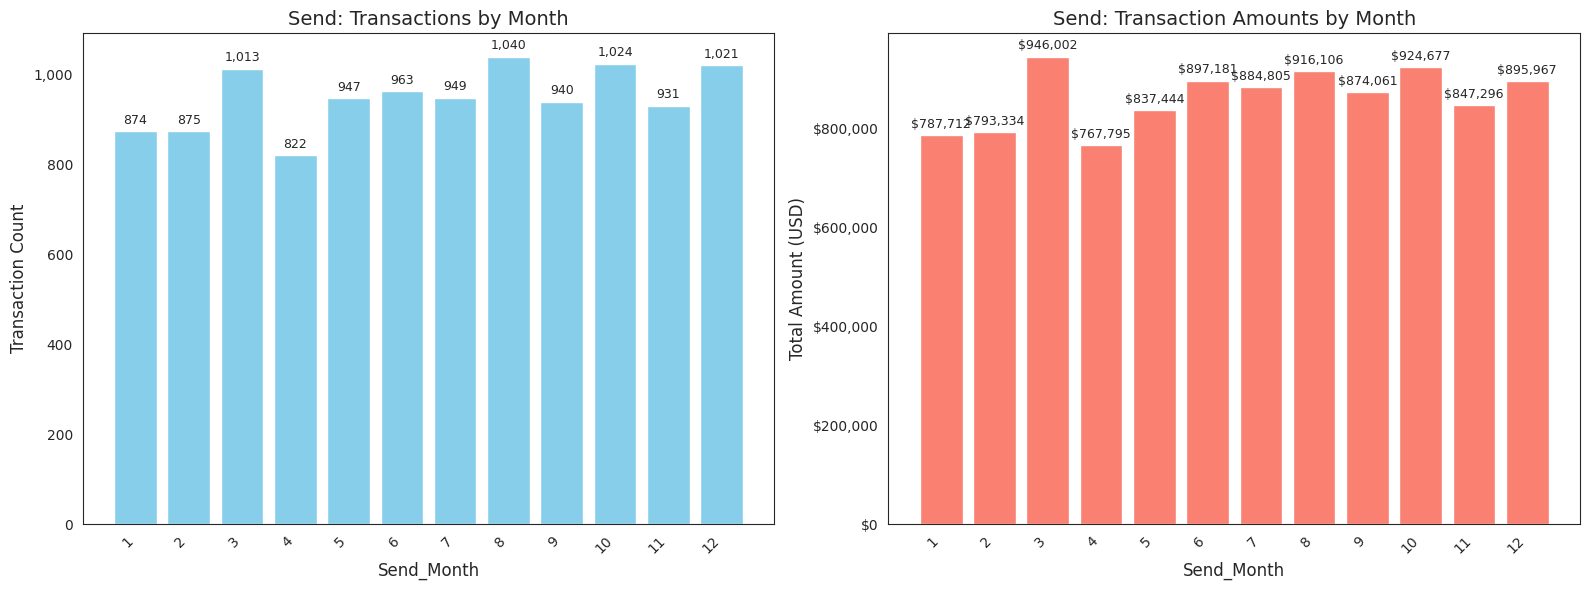

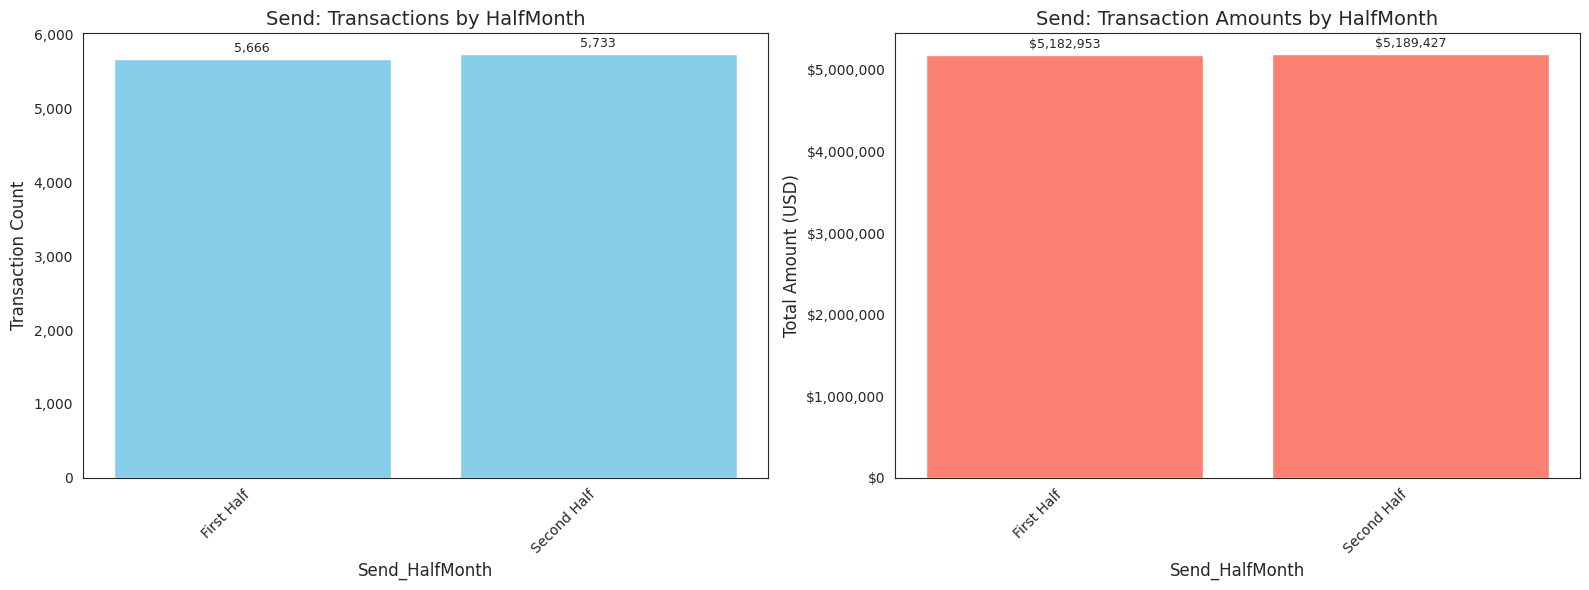

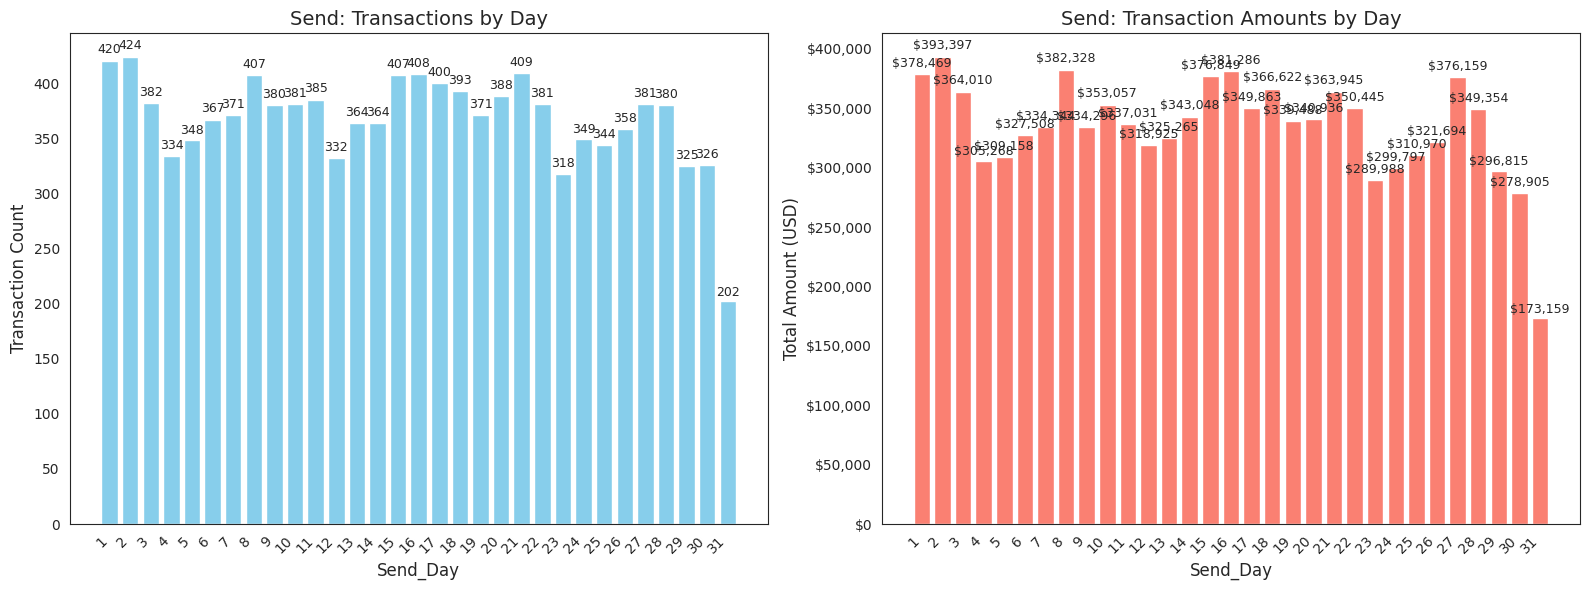

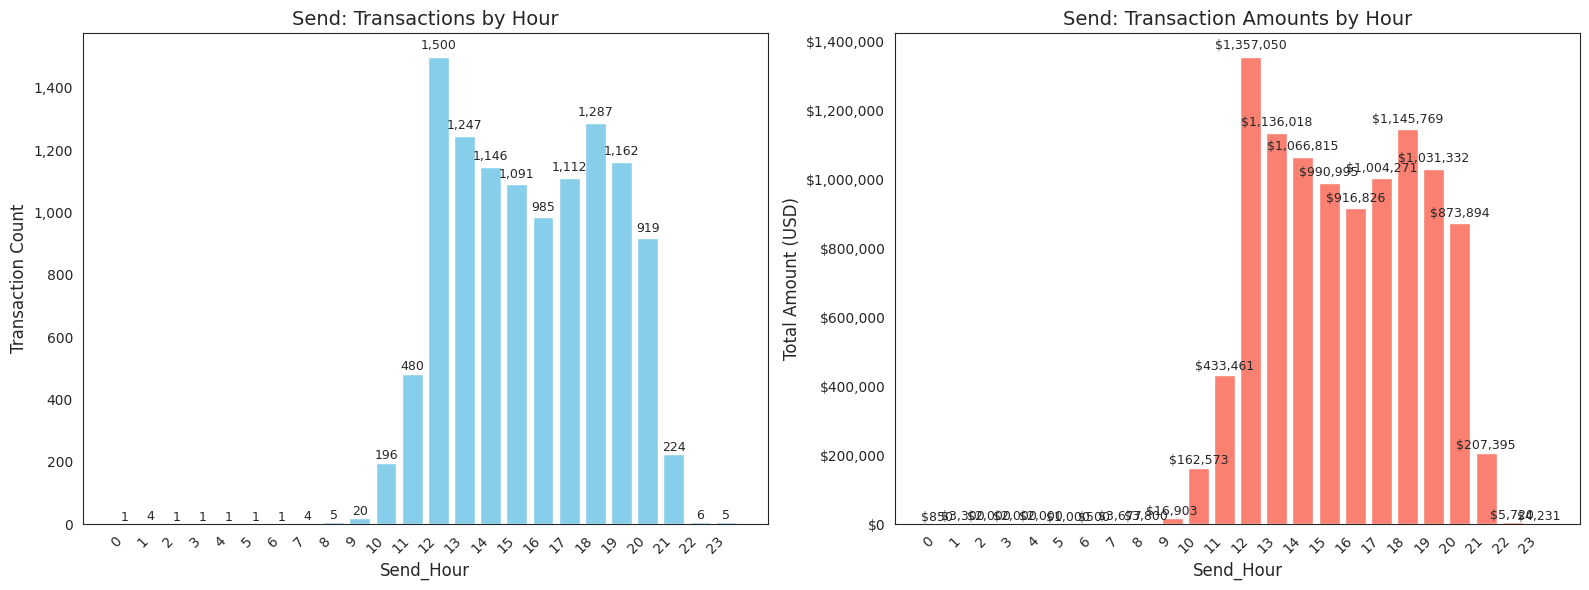

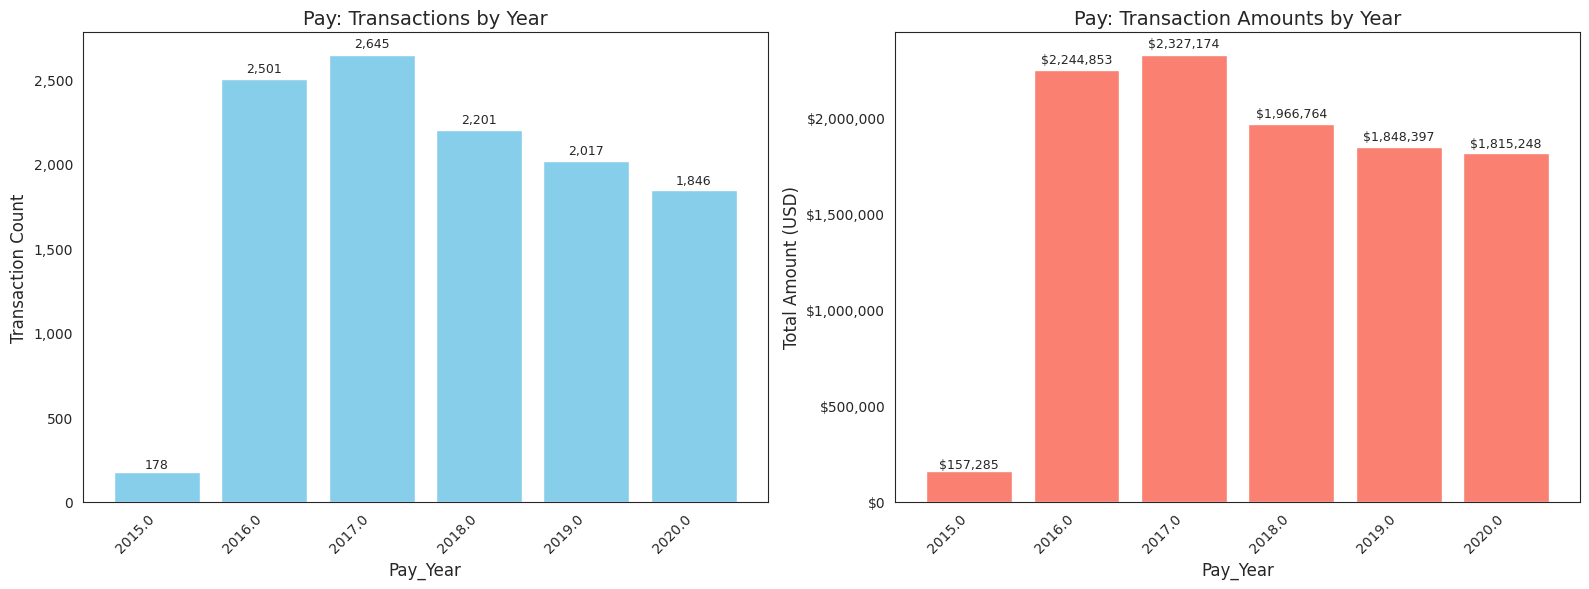

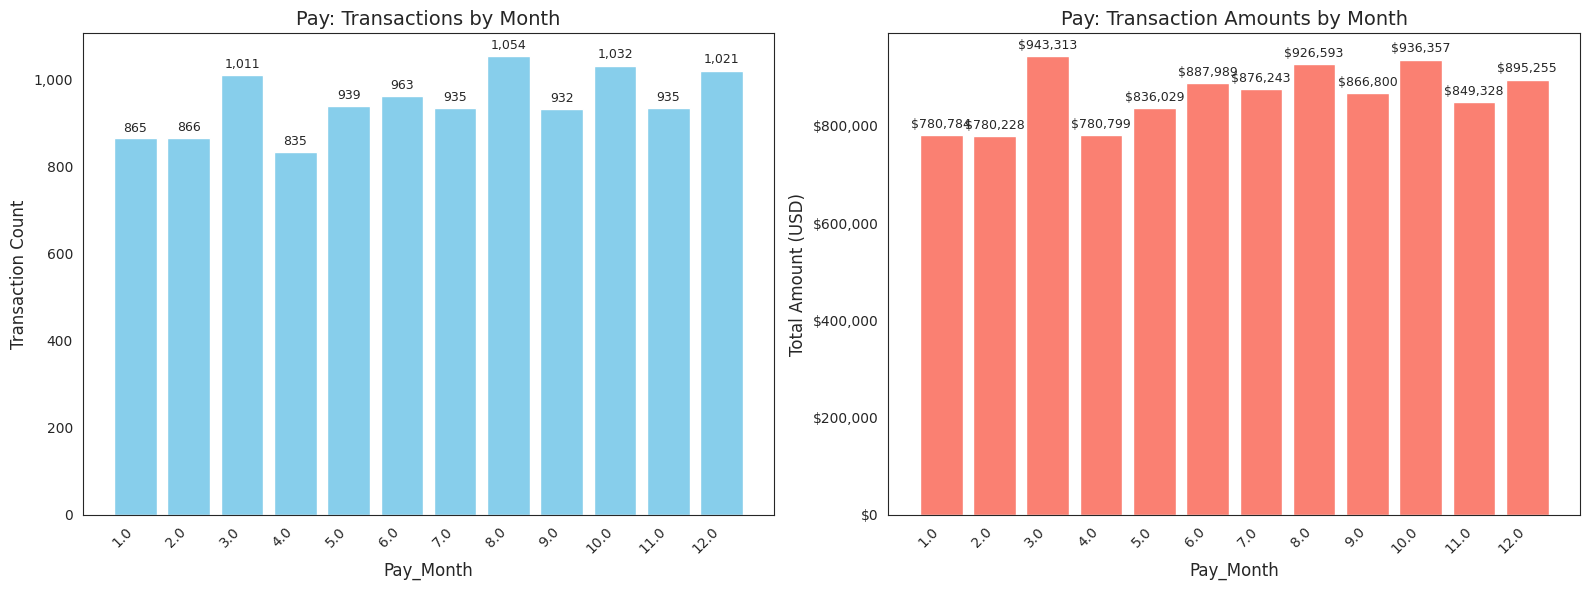

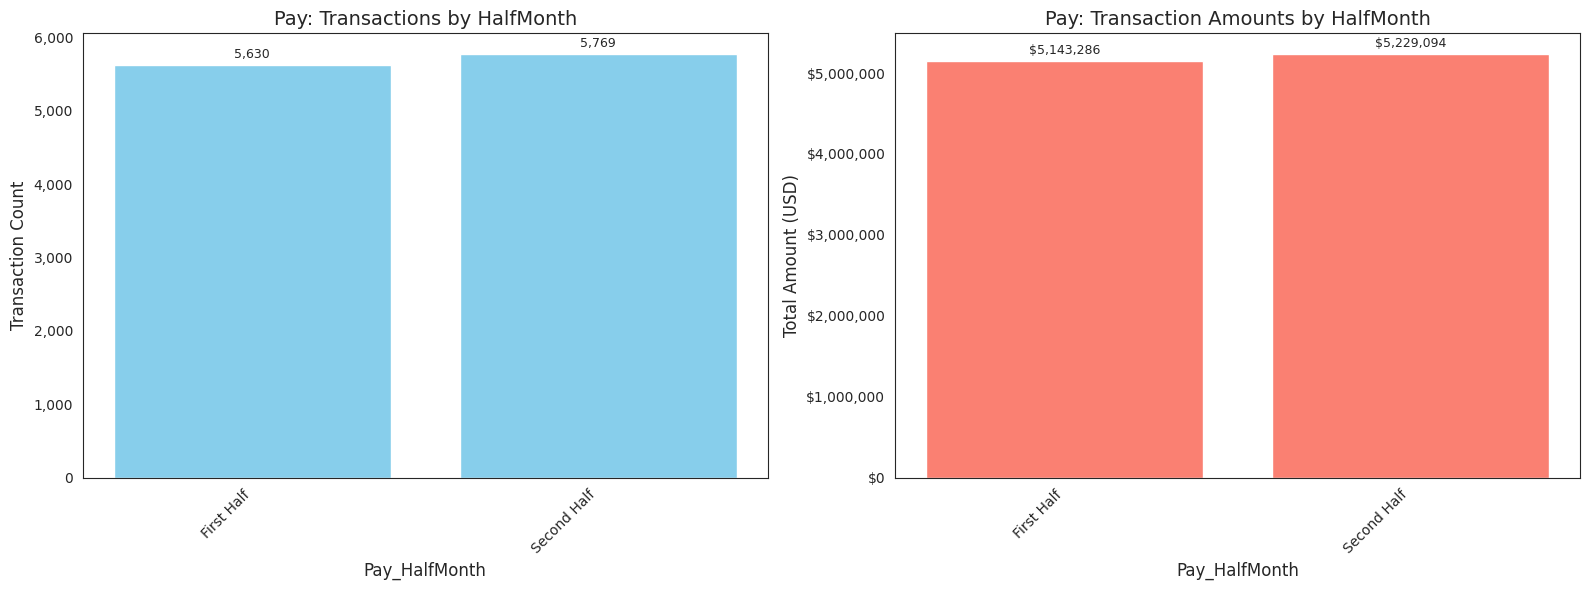

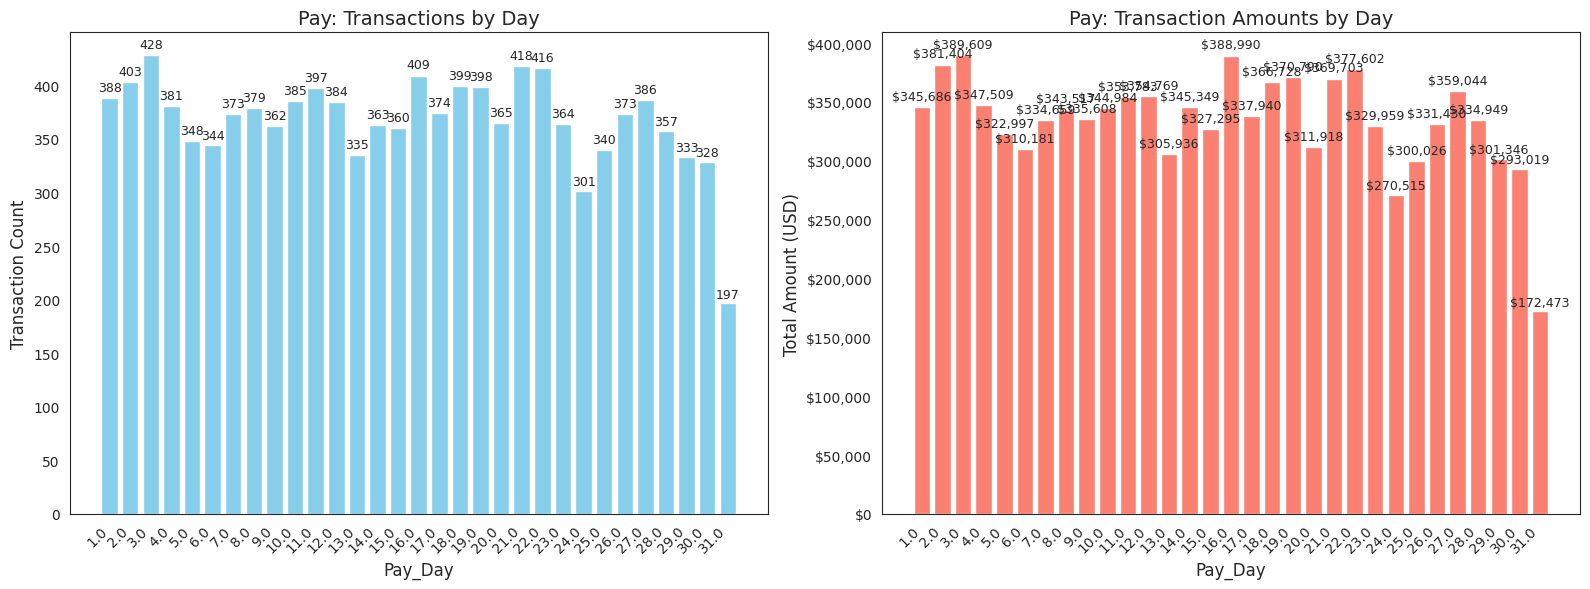

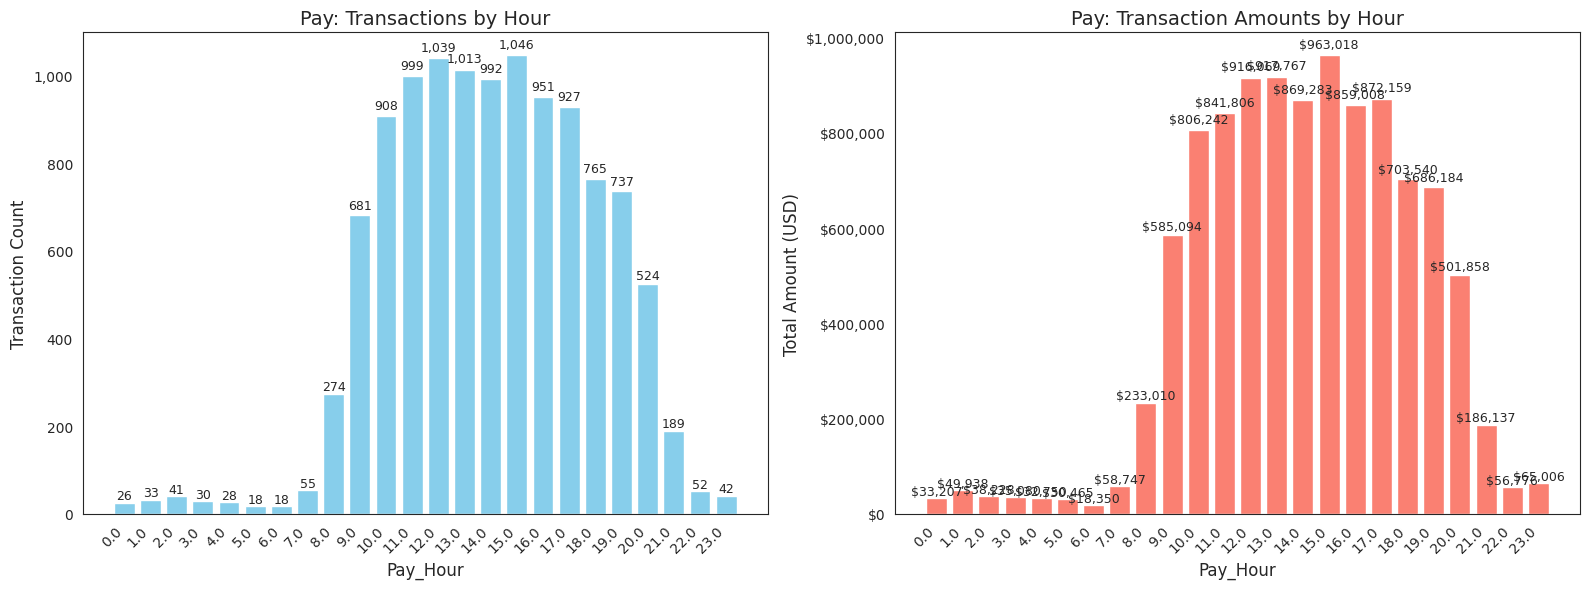

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Ensure datetime conversion
df["Send DateTime"] = pd.to_datetime(df["Send DateTime"], errors="coerce")
df["Pay DateTime"]  = pd.to_datetime(df["Pay DateTime"], errors="coerce")

# ---------- Feature Engineering ----------
for col in ["Send DateTime", "Pay DateTime"]:
    prefix = col.split()[0]   # "Send" or "Pay"
    df[f"{prefix}_Year"]  = df[col].dt.year
    df[f"{prefix}_Month"] = df[col].dt.month
    df[f"{prefix}_Day"]   = df[col].dt.day
    df[f"{prefix}_Hour"]  = df[col].dt.hour
    df[f"{prefix}_HalfMonth"] = df[col].dt.day.apply(lambda d: "First Half" if d <= 15 else "Second Half")

# Formatter helpers
thousands_fmt = FuncFormatter(lambda x, pos: f"{x:,.0f}")
dollar_fmt    = FuncFormatter(lambda x, pos: f'${x:,.0f}')

# ---------- Aggregation & Visualization ----------
def plot_time_dimension(prefix, time_col, ylabel, fmt):
    """
    Creates bar plots of transaction count and total amount for a given time dimension.
    """
    # Aggregate counts and amounts
    agg_df = df.groupby(time_col).agg(
        Txn_Count=("Amount", "size"),
        Total_Amount=("Amount", "sum")
    ).reset_index()

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # --- Transaction Count ---
    axes[0].bar(agg_df[time_col].astype(str), agg_df["Txn_Count"], color="skyblue")
    axes[0].set_title(f"{prefix}: Transactions by {time_col.split('_')[-1]}", fontsize=14)
    axes[0].set_xlabel(time_col, fontsize=12)
    axes[0].set_ylabel("Transaction Count", fontsize=12)
    axes[0].yaxis.set_major_formatter(thousands_fmt)
    axes[0].tick_params(axis="x", labelrotation=45)
    for tick in axes[0].get_xticklabels():
        tick.set_ha("right")
    for i, v in enumerate(agg_df["Txn_Count"].values):
        axes[0].text(i, v * 1.01, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

    # --- Total Amount ---
    axes[1].bar(agg_df[time_col].astype(str), agg_df["Total_Amount"], color="salmon")
    axes[1].set_title(f"{prefix}: Transaction Amounts by {time_col.split('_')[-1]}", fontsize=14)
    axes[1].set_xlabel(time_col, fontsize=12)
    axes[1].set_ylabel("Total Amount (USD)", fontsize=12)
    axes[1].yaxis.set_major_formatter(dollar_fmt)
    axes[1].tick_params(axis="x", labelrotation=45)
    for tick in axes[1].get_xticklabels():
        tick.set_ha("right")
    for i, v in enumerate(agg_df["Total_Amount"].values):
        axes[1].text(i, v * 1.01, f"${v:,.0f}", ha="center", va="bottom", fontsize=9)

    plt.tight_layout()
    plt.show()

# ---------- Run for each time dimension ----------
time_dims = ["Year", "Month", "HalfMonth", "Day", "Hour"]

for prefix in ["Send", "Pay"]:
    for dim in time_dims:
        plot_time_dimension(prefix, f"{prefix}_{dim}", "Transactions", thousands_fmt)


In [52]:
import pandas as pd

# --- Agents of Interest ---
pay_agents_to_review  = ["agent_6", "agent_11", "agent_39", "agent_73"]
send_agents_to_review = ["agent_2610", "agent_2733", "agent_1184", "agent_2530", "agent_2630", "agent_2522"]

# --- Helper functions for ML red flag checks ---

def structuring_check(df, threshold=3000, buffer=100):
    """
    Counts how many transactions fall just below a threshold.
    Example: within $100 below $3K.
    """
    return df[(df["Amount"] >= (threshold - buffer)) & (df["Amount"] < threshold)].shape[0]

def unusual_age_check(df):
    """
    Counts transactions where Sender or Payee age is <21 or >75.
    """
    return df[
        (df["Sender Age"].between(0, 25)) | (df["Sender Age"] >= 66) |
        (df["Payee Age"].between(0, 25))  | (df["Payee Age"] >= 66)
    ].shape[0]

def cross_border_us_to_foreign(df):
    """
    Counts transactions where money is sent from US to a non-US country.
    """
    return df[(df["Send Country"] == "US") & (df["Pay Country"] != "US")].shape[0]

# --- Run checks for Pay Agents ---
print("=== Pay Agent Red Flag Checks ===")
for agent in pay_agents_to_review:
    subset = df[df["Pay Agent Name_"] == agent]
    if subset.empty:
        continue
    near_3k = structuring_check(subset, 3000)
    near_10k = structuring_check(subset, 10000)
    unusual_age = unusual_age_check(subset)
    cross_border = cross_border_us_to_foreign(subset)

    print(f"\nPay Agent: {agent}")
    print(f"  Transactions near $3K: {near_3k}")
    print(f"  Transactions near $10K: {near_10k}")
    print(f"  Transactions with unusual ages (<21 or >75): {unusual_age}")
    print(f"  US → Foreign transfers: {cross_border}")

# --- Run checks for Send Agents ---
print("\n=== Send Agent Red Flag Checks ===")
for agent in send_agents_to_review:
    subset = df[df["Send Agent Name_"] == agent]
    if subset.empty:
        continue
    near_3k = structuring_check(subset, 3000)
    near_10k = structuring_check(subset, 10000)
    unusual_age = unusual_age_check(subset)
    cross_border = cross_border_us_to_foreign(subset)

    print(f"\nSend Agent: {agent}")
    print(f"  Transactions near $3K: {near_3k}")
    print(f"  Transactions near $10K: {near_10k}")
    print(f"  Transactions with unusual ages (<21 or >75): {unusual_age}")
    print(f"  US → Foreign transfers: {cross_border}")


=== Pay Agent Red Flag Checks ===

Pay Agent: agent_6
  Transactions near $3K: 1
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 27
  US → Foreign transfers: 0

Pay Agent: agent_11
  Transactions near $3K: 2
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 140
  US → Foreign transfers: 0

Pay Agent: agent_39
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 17
  US → Foreign transfers: 0

Pay Agent: agent_73
  Transactions near $3K: 4
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 17
  US → Foreign transfers: 0

=== Send Agent Red Flag Checks ===

Send Agent: agent_2610
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 0
  US → Foreign transfers: 0

Send Agent: agent_2733
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 1
  US → Foreign transfers: 0

S


=== Pay Agent: agent_6 ===
  Transactions near $3K: 1
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 5
  US → Foreign transfers: 0


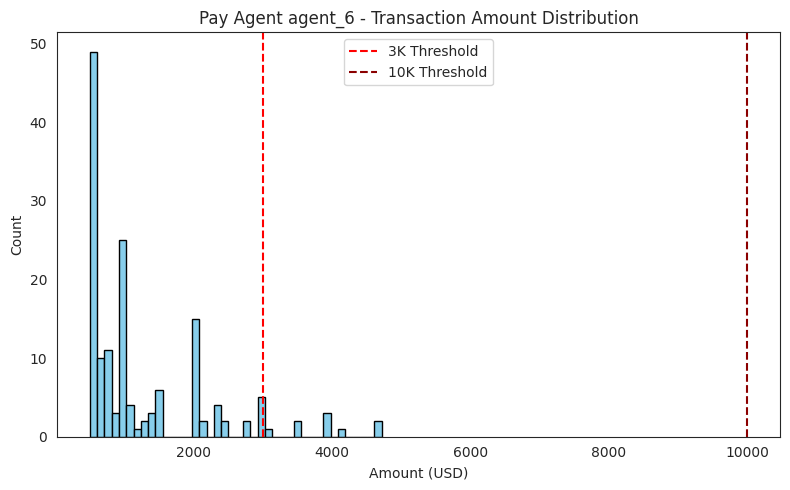

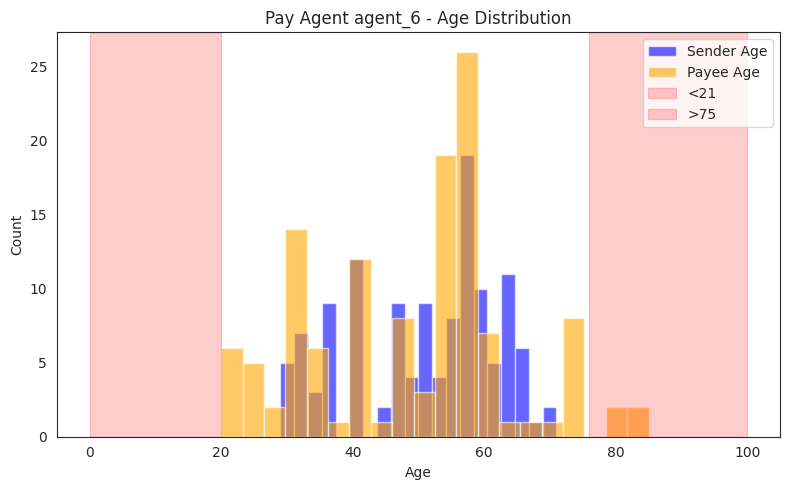

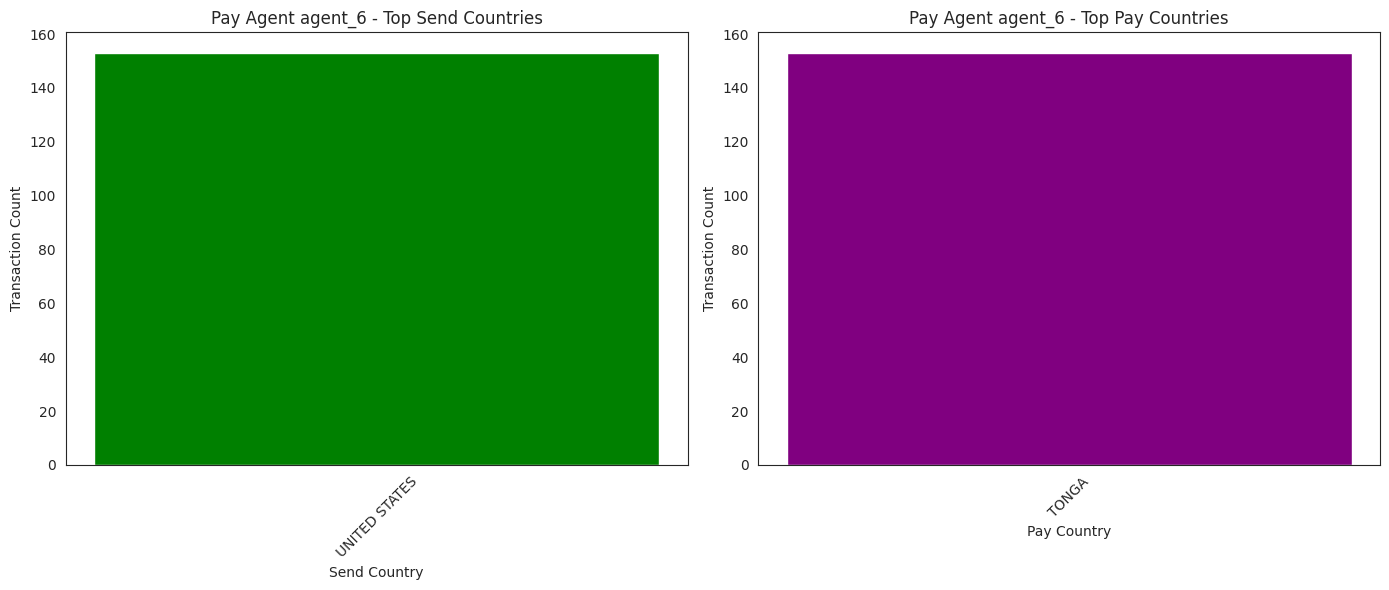


=== Pay Agent: agent_11 ===
  Transactions near $3K: 2
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 22
  US → Foreign transfers: 0


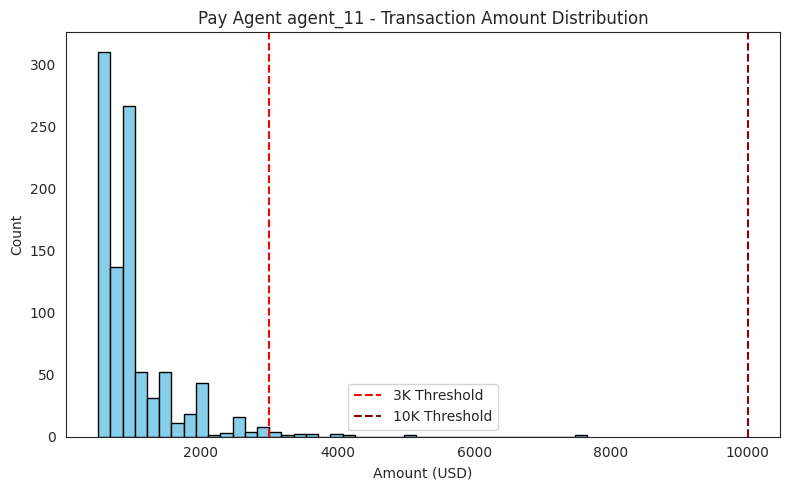

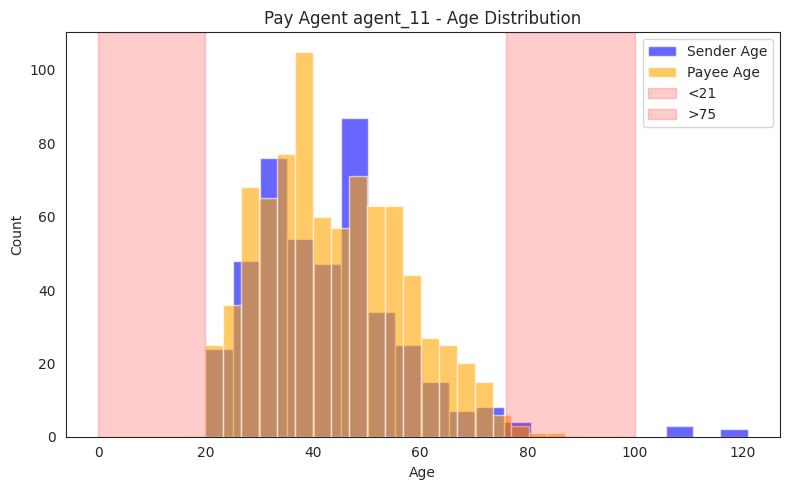

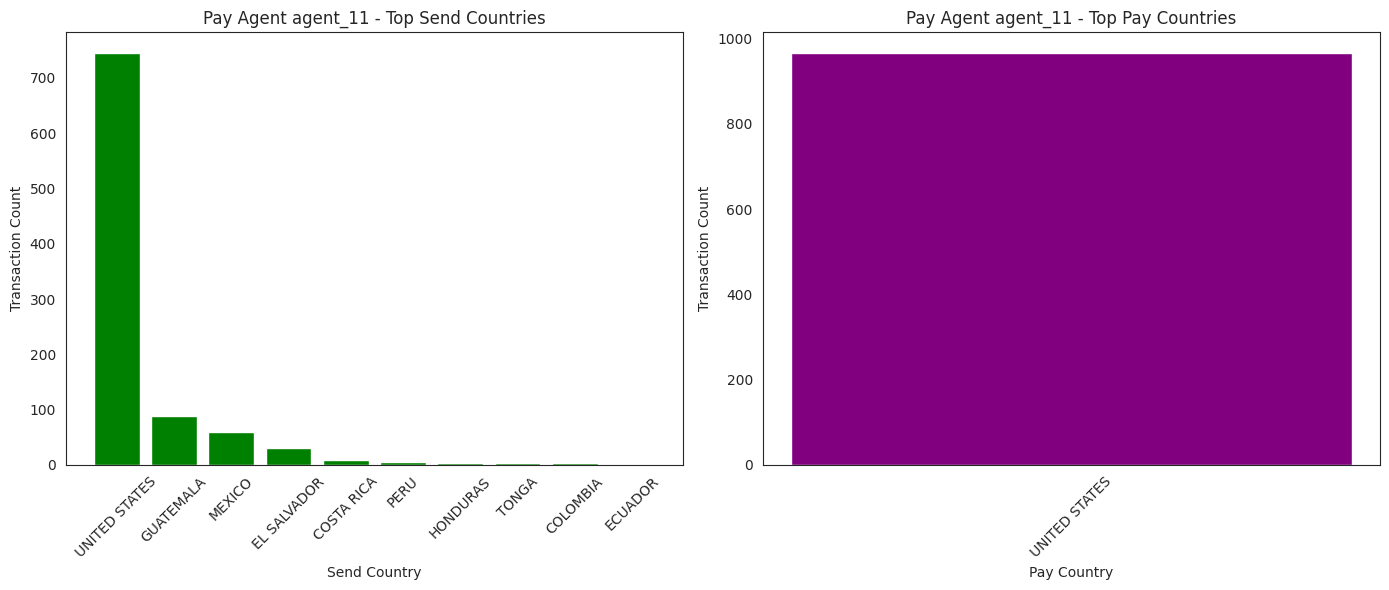


=== Pay Agent: agent_39 ===
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 7
  US → Foreign transfers: 0


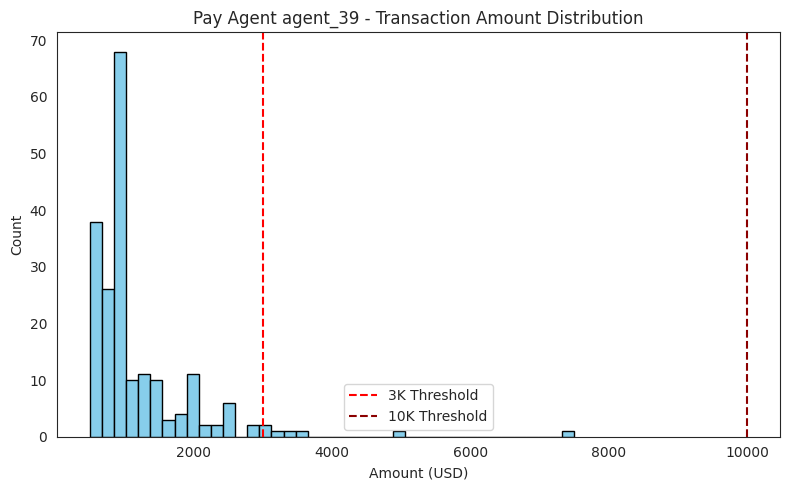

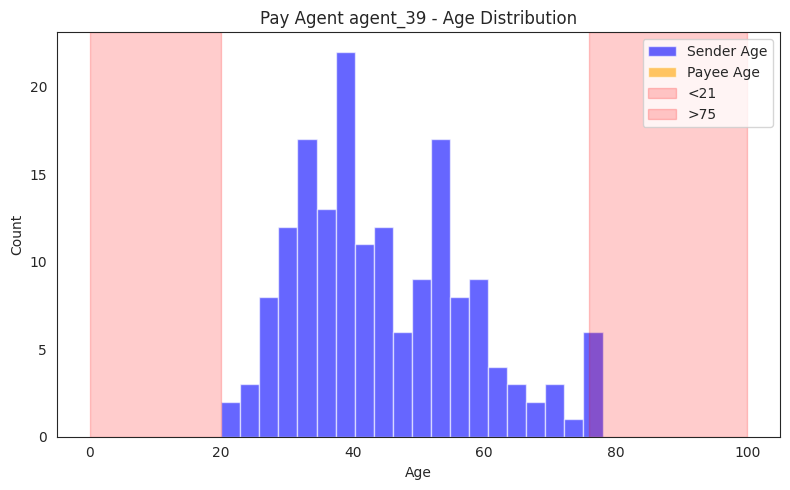

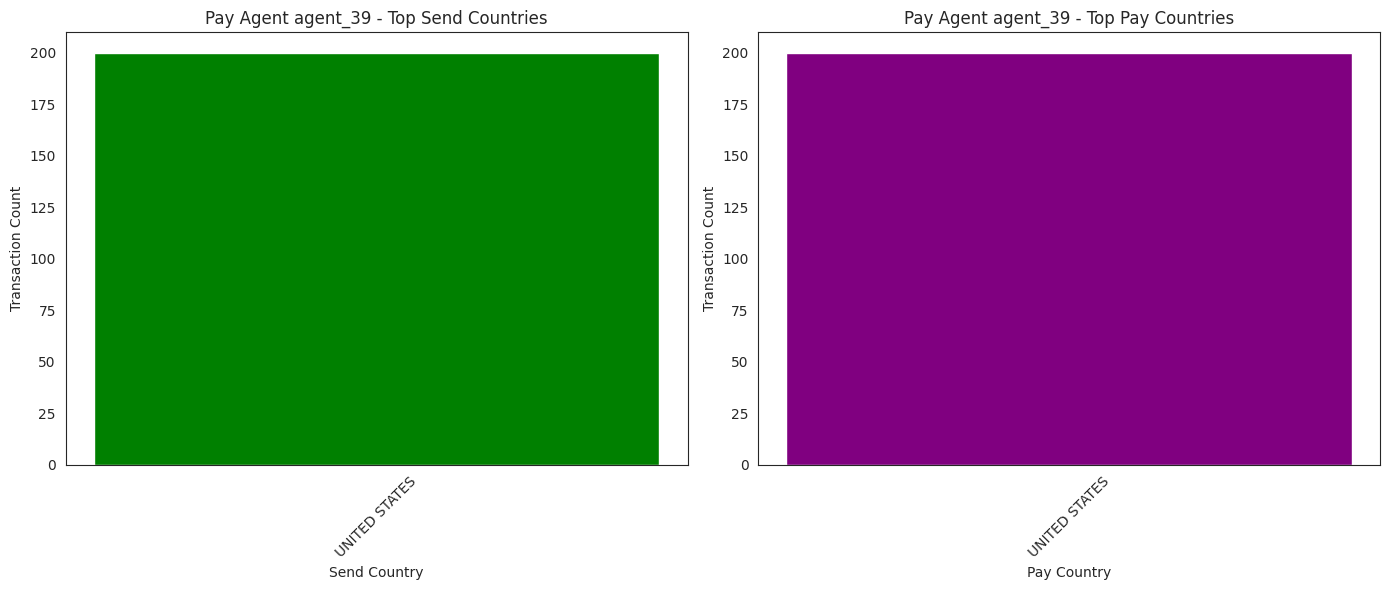


=== Pay Agent: agent_73 ===
  Transactions near $3K: 4
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 4
  US → Foreign transfers: 0


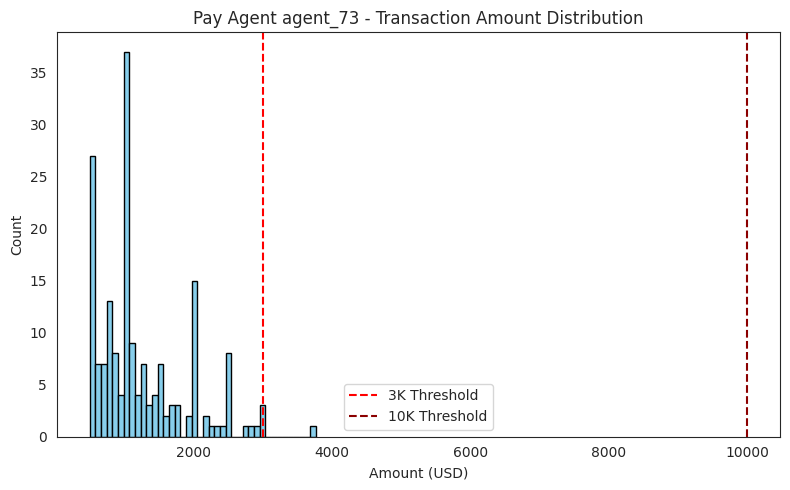

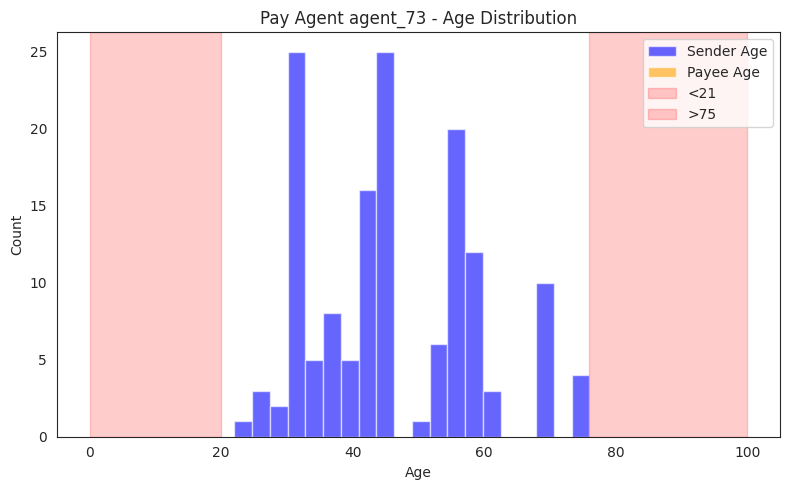

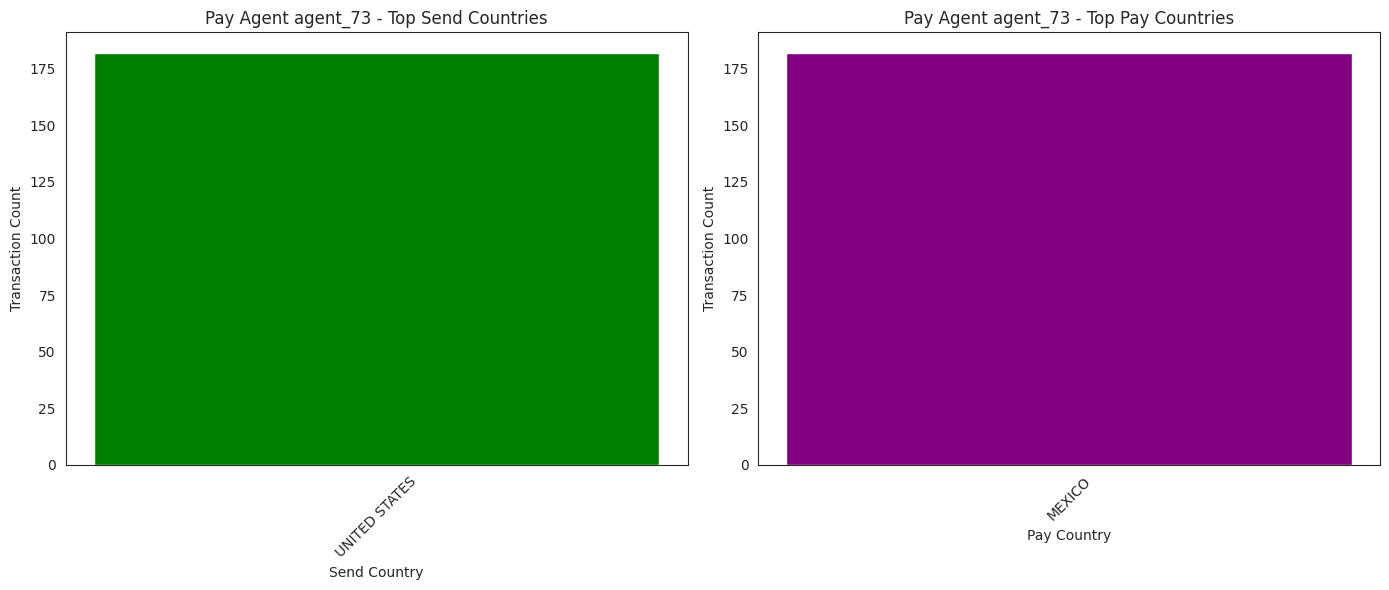


=== Send Agent: agent_2610 ===
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 0
  US → Foreign transfers: 0


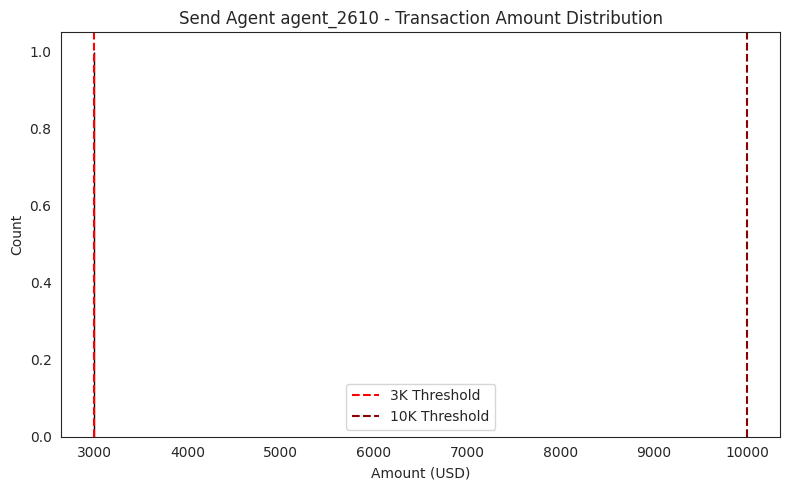

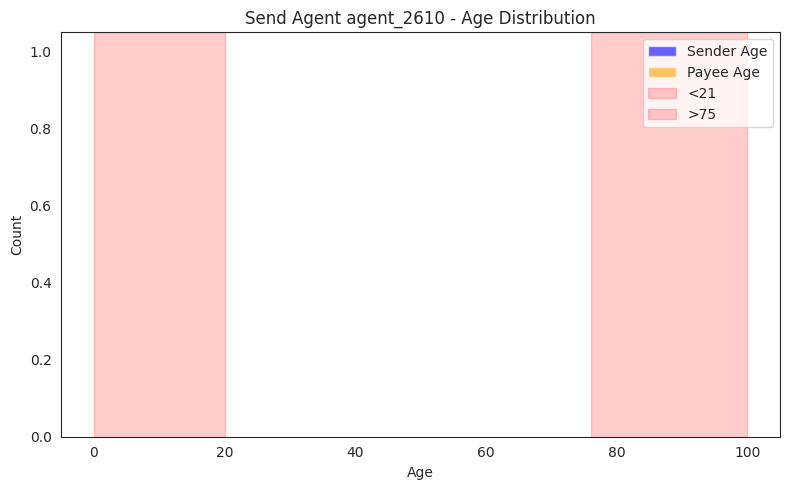

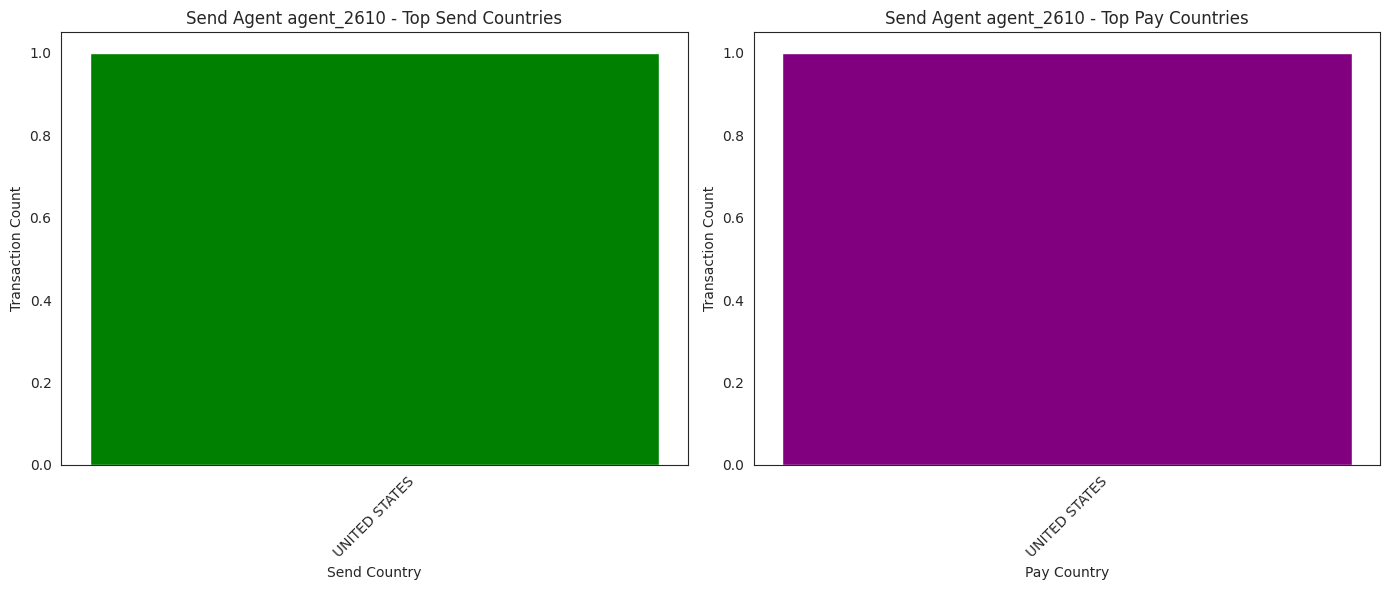


=== Send Agent: agent_2733 ===
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 0
  US → Foreign transfers: 0


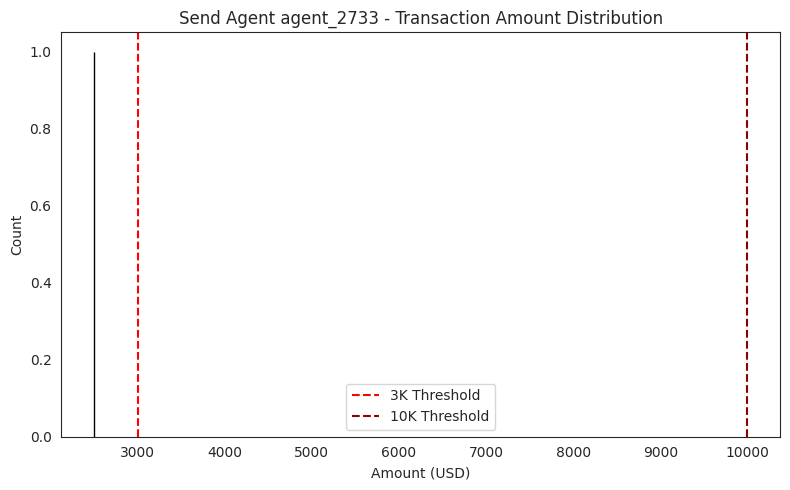

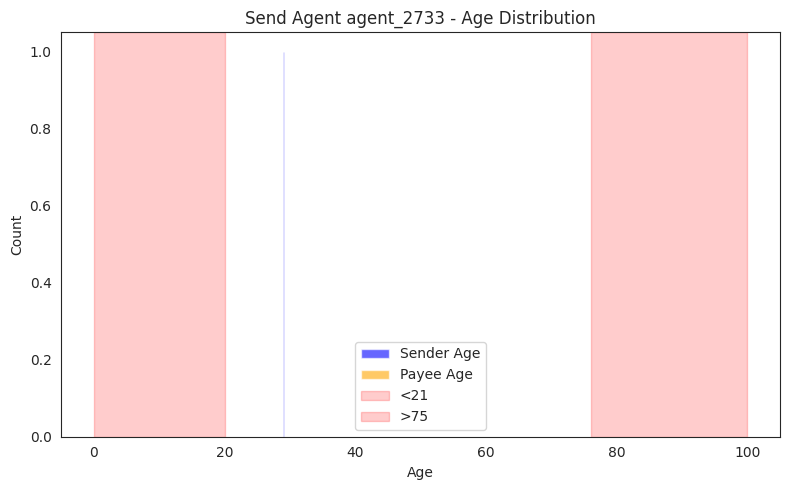

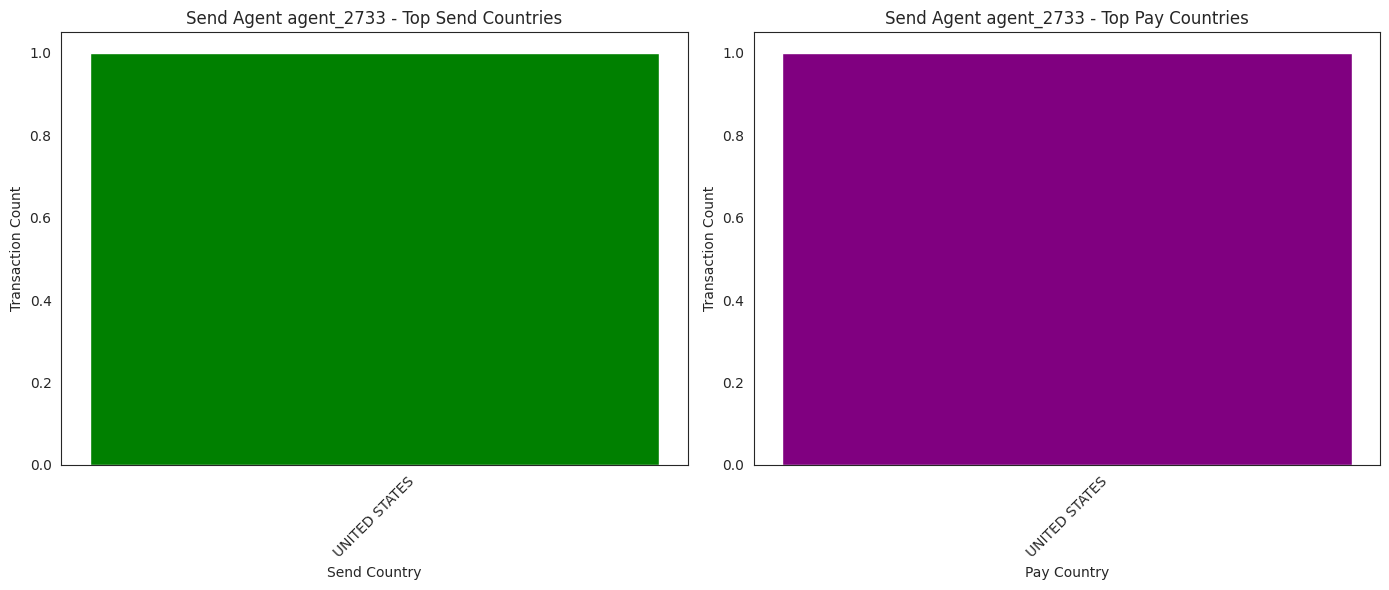


=== Send Agent: agent_1184 ===
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 0
  US → Foreign transfers: 0


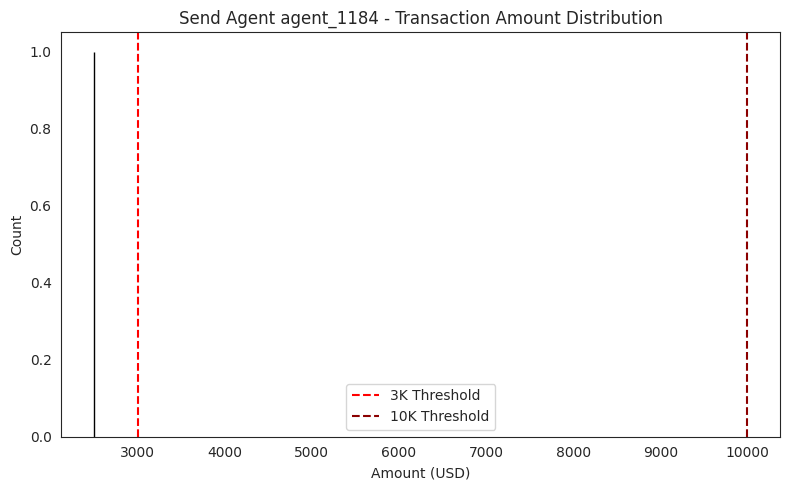

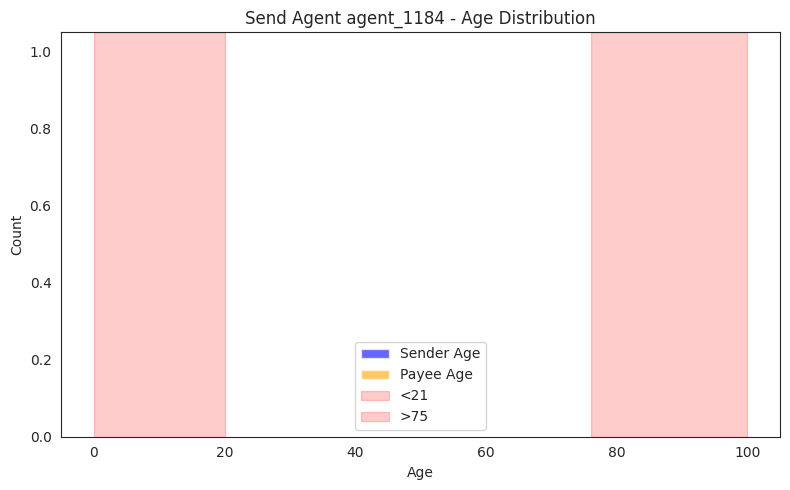

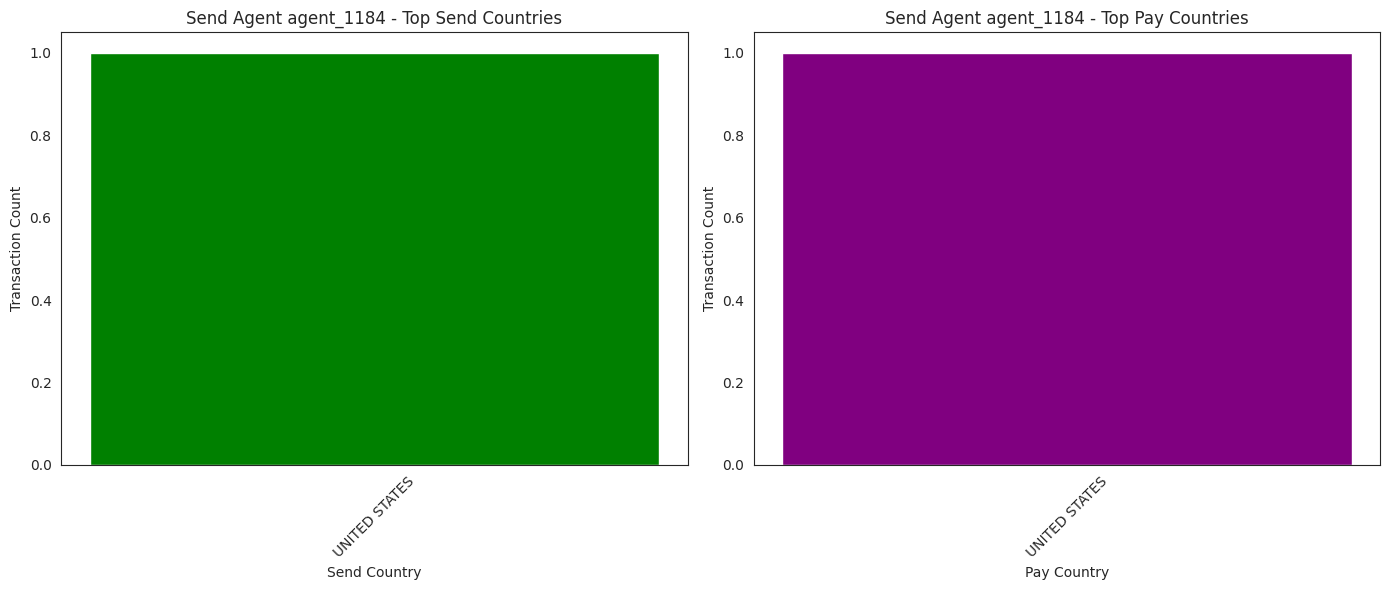


=== Send Agent: agent_2530 ===
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 0
  US → Foreign transfers: 0


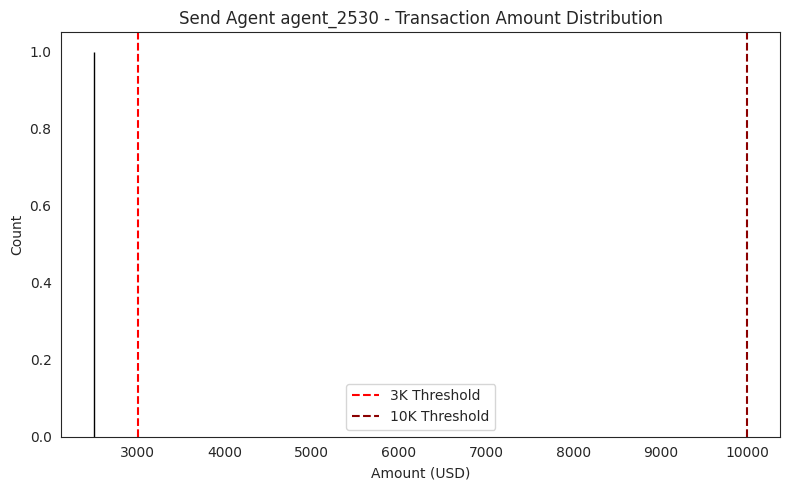

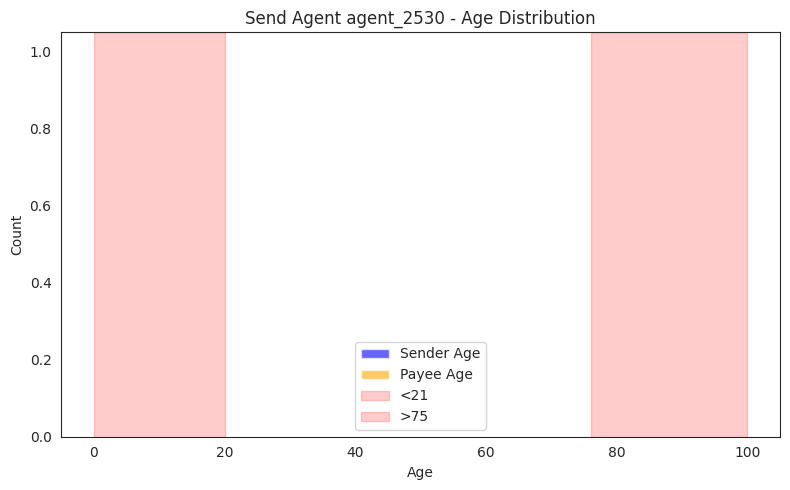

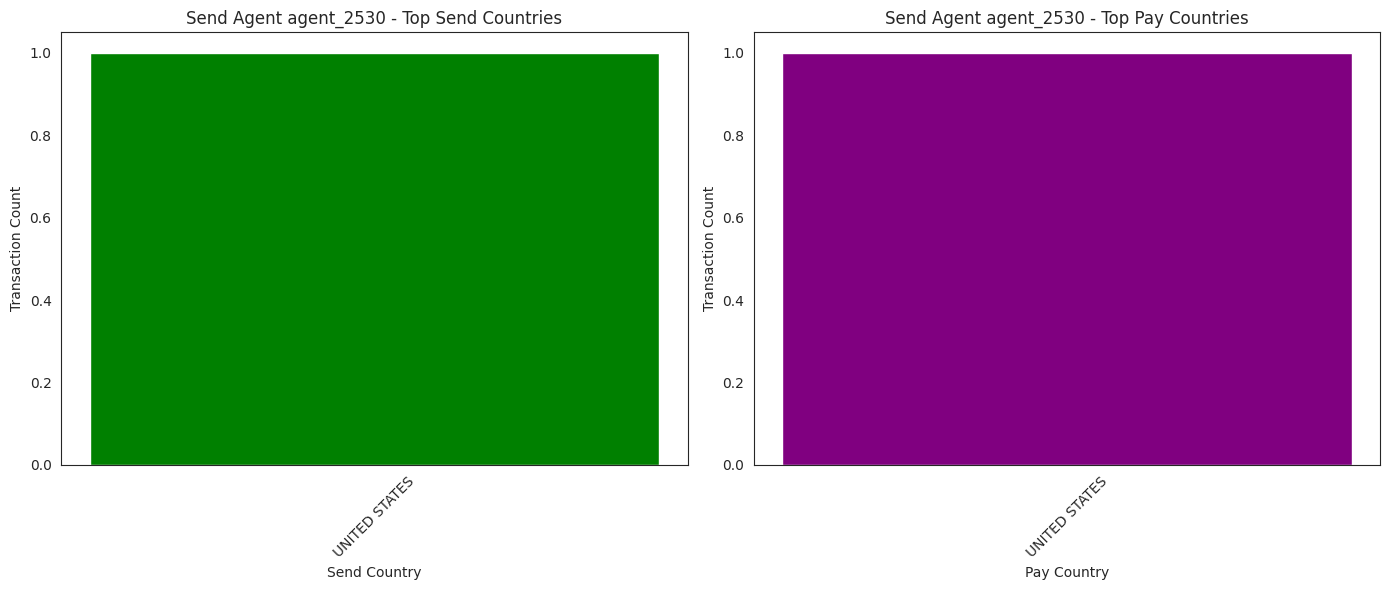


=== Send Agent: agent_2630 ===
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 0
  US → Foreign transfers: 0


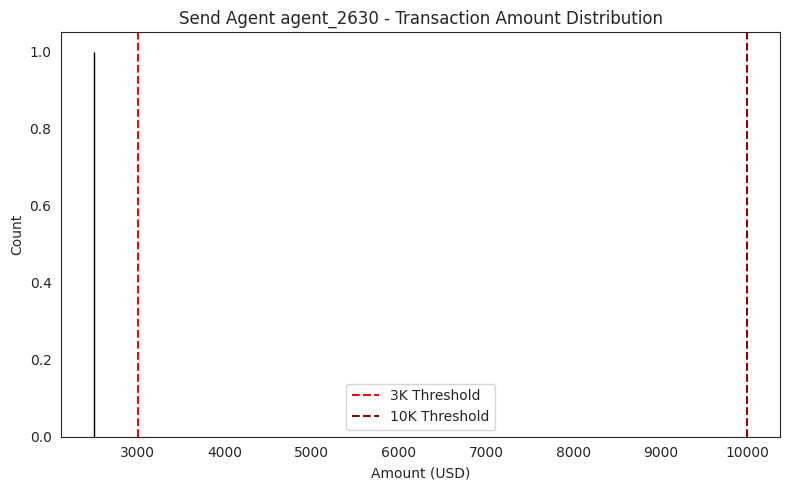

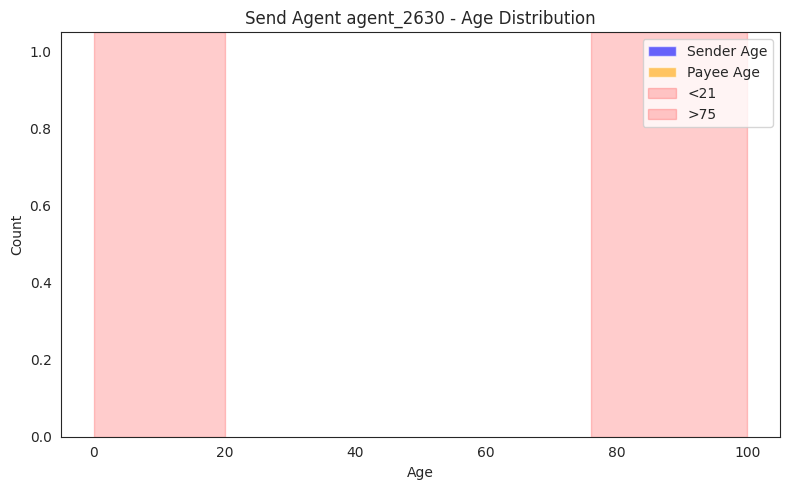

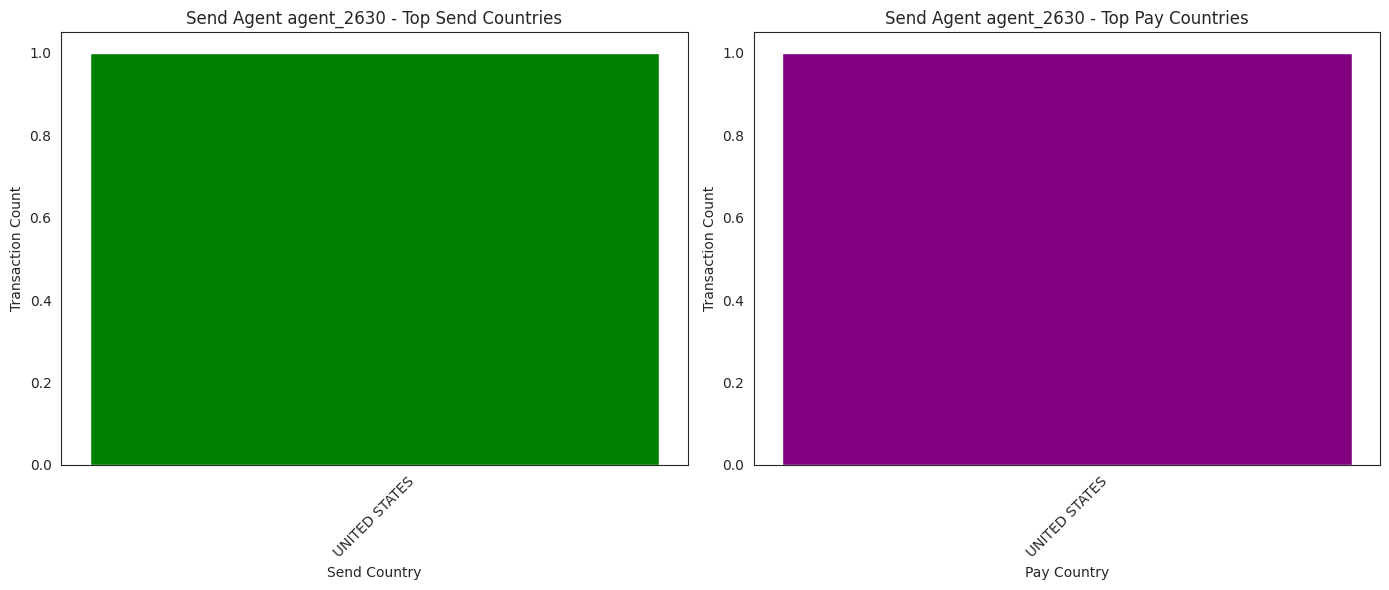


=== Send Agent: agent_2522 ===
  Transactions near $3K: 0
  Transactions near $10K: 0
  Transactions with unusual ages (<21 or >75): 0
  US → Foreign transfers: 0


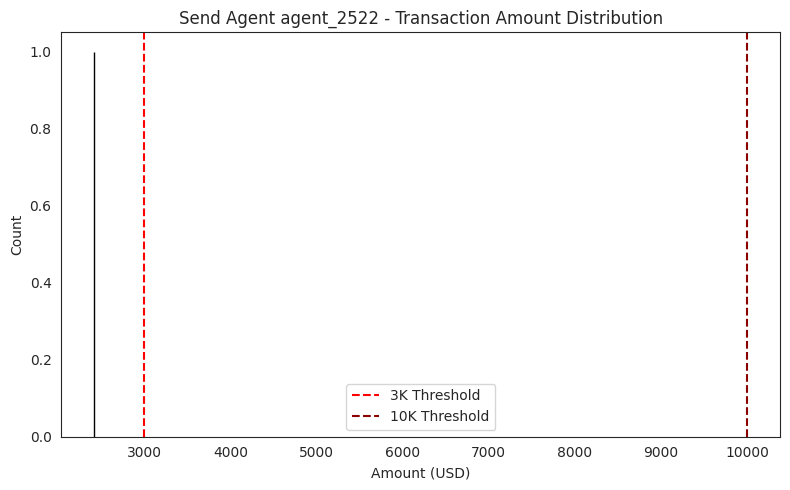

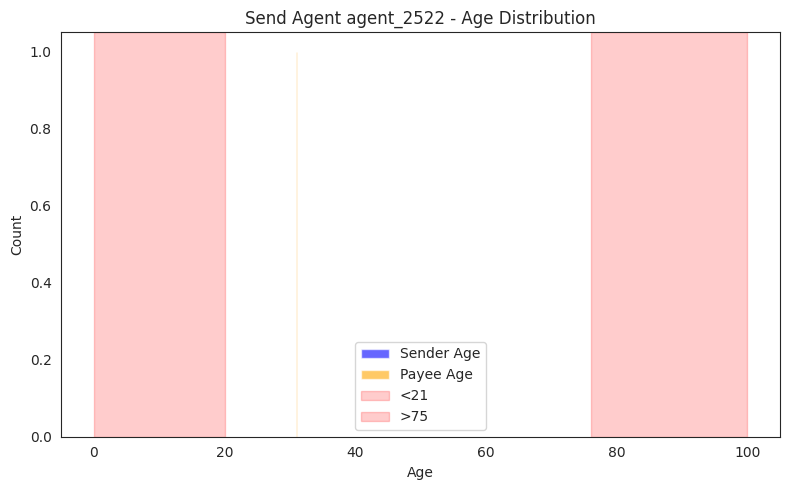

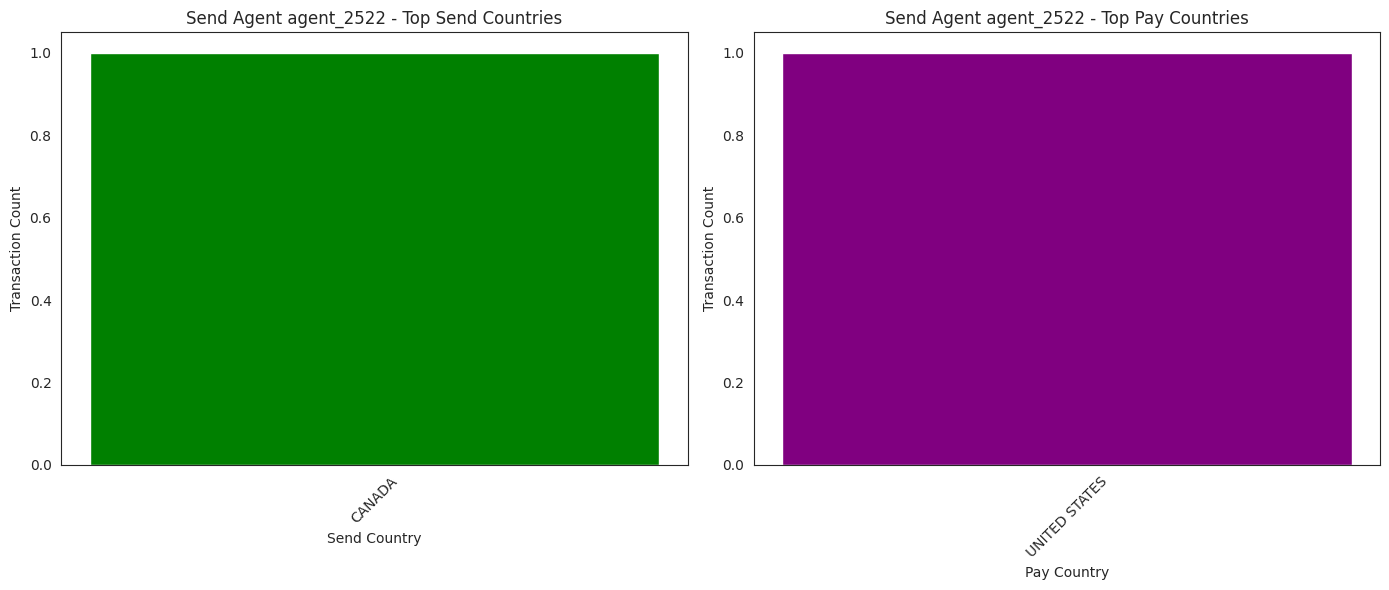

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Agents to review
pay_agents_to_review  = ["agent_6", "agent_11", "agent_39", "agent_73"]
send_agents_to_review = ["agent_2610", "agent_2733", "agent_1184", "agent_2530", "agent_2630", "agent_2522"]

# --- Helper visualization functions ---

def plot_amount_hist(df, agent_name, agent_type):
    """Histogram of amounts for a given agent."""
    plt.figure(figsize=(8,5))
    plt.hist(df["Amount"], bins=40, color="skyblue", edgecolor="black")
    plt.axvline(3000, color="red", linestyle="--", label="3K Threshold")
    plt.axvline(10000, color="darkred", linestyle="--", label="10K Threshold")
    plt.title(f"{agent_type} {agent_name} - Transaction Amount Distribution")
    plt.xlabel("Amount (USD)")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_age_distribution(df, agent_name, agent_type):
    """Barplot of sender & payee ages for a given agent."""
    plt.figure(figsize=(8,5))
    plt.hist(df["Sender Age"].dropna(), bins=20, alpha=0.6, label="Sender Age", color="blue")
    plt.hist(df["Payee Age"].dropna(), bins=20, alpha=0.6, label="Payee Age", color="orange")
    plt.axvspan(0, 20, color="red", alpha=0.2, label="<21")
    plt.axvspan(76, 100, color="red", alpha=0.2, label=">75")
    plt.title(f"{agent_type} {agent_name} - Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_country_bar(df, agent_name, agent_type):
    """Barplot of transaction counts by Send/Pay Country for a given agent."""
    send_counts = df["Send Country"].value_counts().head(10)
    pay_counts  = df["Pay Country"].value_counts().head(10)

    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # Send Countries
    axes[0].bar(send_counts.index, send_counts.values, color="green")
    axes[0].set_title(f"{agent_type} {agent_name} - Top Send Countries")
    axes[0].set_xlabel("Send Country")
    axes[0].set_ylabel("Transaction Count")
    axes[0].tick_params(axis="x", rotation=45)

    # Pay Countries
    axes[1].bar(pay_counts.index, pay_counts.values, color="purple")
    axes[1].set_title(f"{agent_type} {agent_name} - Top Pay Countries")
    axes[1].set_xlabel("Pay Country")
    axes[1].set_ylabel("Transaction Count")
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()


# --- Analysis and Visualization Loop ---

def run_agent_analysis(agent_name, agent_type, df, filter_col):
    """Run checks and visualizations for a given agent."""
    subset = df[df[filter_col] == agent_name]
    if subset.empty:
        print(f"{agent_type} {agent_name}: No transactions found.\n")
        return

    # --- Stats ---
    near_3k = subset[(subset["Amount"] >= 2900) & (subset["Amount"] < 3000)].shape[0]
    near_10k = subset[(subset["Amount"] >= 9900) & (subset["Amount"] < 10000)].shape[0]
    unusual_age = subset[
        (subset["Sender Age"].between(0,20)) | (subset["Sender Age"] >= 76) |
        (subset["Payee Age"].between(0,20))  | (subset["Payee Age"] >= 76)
    ].shape[0]
    cross_border = subset[(subset["Send Country"] == "US") & (subset["Pay Country"] != "US")].shape[0]

    print(f"\n=== {agent_type}: {agent_name} ===")
    print(f"  Transactions near $3K: {near_3k}")
    print(f"  Transactions near $10K: {near_10k}")
    print(f"  Transactions with unusual ages (<21 or >75): {unusual_age}")
    print(f"  US → Foreign transfers: {cross_border}")

    # --- Visualizations ---
    plot_amount_hist(subset, agent_name, agent_type)
    plot_age_distribution(subset, agent_name, agent_type)
    plot_country_bar(subset, agent_name, agent_type)


# Run for Pay Agents
for agent in pay_agents_to_review:
    run_agent_analysis(agent, "Pay Agent", df, "Pay Agent Name_")

# Run for Send Agents
for agent in send_agents_to_review:
    run_agent_analysis(agent, "Send Agent", df, "Send Agent Name_")


## Final Recommendation

## Supporting Code

(Previously independently created code for personal projects I've led - see the projects section at https://philippe-heitzmann.com/ for more information)

In [23]:
# Your Viz class (keeping it unchanged)
class Viz():
    '''Class used to create a variety of visualizations such as barplots, lineplots, pairplots, heatmaps etc in an efficient manner'''
    
    def __init__(self, df = None, figsize = (10,6)):
        self.df = df
        if self.df is not None:
            self.df = df.copy(deep = True)
        self.figsize = figsize 
        print(f'Initiated with figsize {figsize}') 

    def check_df(self, df):
        '''Helper function to check if dataframe object is not None'''
        if df is not None: return df
        if self.df is not None: df = self.df 
        else: raise ValueError('Dataframe object needs to be passed during either object instantiation or method call')
        return df 

    def set_decorations(self, ax, **kwargs):
        '''Helper function setting figure decorations such as title, xlabel, ylabel, etc if provided as kwargs'''
        if 'title' in kwargs: ax.set_title(kwargs['title'][0], fontsize = kwargs['title'][1])
        if 'xlabel' in kwargs: ax.set_xlabel(kwargs['xlabel'][0], fontsize = kwargs['xlabel'][1])
        if 'ylabel' in kwargs: ax.set_ylabel(kwargs['ylabel'][0], fontsize = kwargs['ylabel'][1])
        if 'xlim' in kwargs: plt.xlim(kwargs['xlim'][0], kwargs['xlim'][1])
        if 'ylim' in kwargs: plt.ylim(kwargs['ylim'][0], kwargs['ylim'][1])     
        if 'legend' in kwargs: plt.legend(bbox_to_anchor = kwargs['legend'], loc = 'upper center')
        if 'xticklocs' in kwargs:
            ax.set_xticks(kwargs['xticklocs'])
            if 'xticklabels' in kwargs:
                ax.set_xticklabels(kwargs['xticklabels'])
        if 'rotation' in kwargs: plt.xticks(rotation = kwargs['rotation'])
        if 'vlines' in kwargs:
            for vline in kwargs['vlines']:
                plt.axvline(x = vline, linestyle = '--', color = 'red', linewidth = 1.5, alpha=0.7)
                # Add text annotation in data coordinates instead of using transform
                ylim = ax.get_ylim()
                plt.text(vline, ylim[1] * 0.9, f'${vline:,}', fontsize = 10, color = 'red', 
                        ha='center', va='bottom', rotation=90)
        if 'hlines' in kwargs:
            for hline in kwargs['hlines']:
                plt.axhline(y = hline, linestyle = '--', color = 'red', linewidth = 1.5, alpha=0.7)
                # Add text annotation in data coordinates instead of using transform
                xlim = ax.get_xlim()
                plt.text(xlim[1] * 0.05, hline, f'{hline}', fontsize = 10, color = 'red', 
                        ha='left', va='bottom')
        if 'points' in kwargs and 'col' in kwargs:
            for point in kwargs['points']:
                ax.plot(point, self.df.loc[self.df['TIME_DIM_NB2'] == point][[kwargs['col']]].iloc[0,0], 'or')
        plt.grid(False)
        return ax 
                             
    @staticmethod
    def get_xticks(df, col, n):
        return [x for x in range(0, len(df[col].unique()), n)]
                             
    def download_fig(self, **kwargs):
        if 'download' in kwargs and kwargs['download']:
            filename = 'plot' + '{:02d}'.format(datetime.now().month) + '{:02d}'.format(datetime.now().day) + '{:02d}'.format(datetime.now().hour) + '{:02d}'.format(datetime.now().minute) + '.png'
            plt.savefig(filename, bbox_inches = 'tight')
            print(f'Saved fig under filename {filename}')
                             
    def make_hist(self, *cols, df = None, num_bins = 50, **kwargs):
        '''Method for creating a histogram'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        for col in cols:
            # Filter out extreme outliers that might cause rendering issues
            data = df[col].dropna()
            q99 = data.quantile(0.99)
            q01 = data.quantile(0.01)
            filtered_data = data[(data >= q01) & (data <= q99)]
            
            # Ensure we have reasonable bin edges
            if len(filtered_data) > 0:
                n, bins, patches = ax.hist(filtered_data, bins = num_bins, alpha=0.7)
            else:
                print(f"Warning: No data to plot for column {col}")
        
        if len(cols) > 1:
            plt.gca().legend(cols)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        try:
            fig.tight_layout()
        except:
            print("Warning: Could not apply tight_layout, continuing without it")
        return fig, ax
                             
    def make_densityplot(self, *cols, df = None, **kwargs):
        '''Method for creating a density plot using seaborn kdeplot to visualize data in a manner analogous to a continuous probability distribution'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        for col in cols:
            sns.kdeplot(df[col], shade = True, label = 'Cyl=4', alpha = 0.5)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
    def make_boxplot(self, x = '', y = '', df = None, **kwargs):
        '''Method for creating a boxplot using seaborn function'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        sns.boxplot(x = x, y = y, data = df, notch = False)
        medians_dict = {str(grp[0]):grp[1][y].median() for grp in df.groupby(x)}
        xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
        n_obs = df.groupby(x)[y].size().values
        for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
            plt.text(x, medians_dict[xticklabel] * 1.05, '#obs: ' + str(n_ob), horizontalalignment = 'center', fontdict = {'size':8}, color = 'white')
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
    
    def make_pairplot(self, *cols, df = None, **kwargs):
        '''Method for creating a pairplot'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        sns.pairplot(df[list(cols)], kind = 'scatter', hue=group, plot_kw = dict(s=80, edgecolor = 'white', linewidth = 2.5))
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
    def make_divergingbars(self, x = '', y = '', df = None, linewidth = 5, **kwargs):
        '''Method for creating a diverging bars plot'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        df['colors'] = ['red' if val < 0 else 'green' for val in df[x]]
        plt.hlines(y = df[y], xmin = 0, xmax = df[x], color = df.colors, alpha = 0.4, linewidth = linewidth)
        plt.grid(linestyle='--', alpha = 0.5)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
    def make_scatter(self, *cols, x = 'TIME_DIM', y = '', group = None, df = None, timeseries = False, bestfit = False, linewidth = 3, c = None, **kwargs):
        '''Method for creating a simple scatterplot with boolean flag bestfit option to create a best fit line through data'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        if timeseries:
            #updating formatting of xtick labels in case our xaxis xticklabels are in date format for legibility purposes
            xtick_locations = df.index.to_list()[::12]
            xtick_labels = [x[:4] for x in df[x].tolist()[::12]]
            plt.xticks(ticks=xtick_locations, labels = xtick_labels, rotation = 0, fontsize = 12, horizontalalignment = 'center', alpha = 0.7)
            plt.yticks(fontsize=12, alpha = 0.7)
        elif bestfit:
            sns.lmplot(x=x, y=y, hue=group, data=df, height=self.figsize[0], aspect=1.6, robust = True, palette = 'tab10', scatter_kws=dict(s=60, linewidths=0.7, edgecolors = 'black'))
            return
        elif 'lineplot' in kwargs:
            for col in cols:
                plt.plot(df[x], df[col], linewidth = linewidth, **kwargs)
        else:
            plt.scatter(df[cols[0]], df[cols[1]], c = c)
        plt.grid(axis = 'both', alpha = 0.3)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
    def make_marginalhist(self, dfs, x, y, xg, yg, group = '', multi = True, df = None, **kwargs):
        '''Method for creating a marginal histogram showing both distributions and interactions of two numerical variables side by side'''
        df = self.check_df(df)
        fig = plt.figure(figsize = (self.figsize[0], self.figsize[0]))
        if multi:
            df = dfs[0]
            dfg = dfs[1]
        else:
            df = dfs[0]
            dfg = dfs[0]
        grid = plt.GridSpec(4,4, hspace = 0.5, wspace = 0.2)
        ax_main = fig.add_subplot(grid[:-1, :-1])
        ax_right = fig.add_subplot(grid[:-1, -1])
        ax_bottom = fig.add_subplot(grid[-1, :-1])
        ax_main.scatter(xg, yg, s=self.figsize[0] * 3, c = group, alpha = 0.9, data = dfg, cmap = 'tab10', edgecolors = 'gray', linewidths = 0.5)
        #bottom histogram
        ax_bottom.hist(df[x], 40, orientation = 'vertical', color = 'deeppink')
        ax_bottom.invert_yaxis()
        #right histogram
        ax_right.hist(df[y], 40, orientation = 'horizontal', color = 'deeppink')
        ylabel = 'average ' + y 
        ax_main = self.set_decorations(ax_main, title = f'Plot of {x} vs {y}', xlabel = x, ylabel = ylabel, **kwargs)                             
        plt.xticks(rotation = 45)
        self.download_fig(**kwargs)
        fig = ax_main.get_figure()
        fig.tight_layout()
        return fig, ax_main
    
    def make_catplot(self, x = '', y = '', group = '', df = None, **kwargs):
        '''Method for creating categorical plots'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        g = sns.catplot(x = x, y = y, col = group, data = df, saturation = 0.5, kind = 'bar', ci=None, aspect = 0.5)
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                             
                             
    def make_barplot(self, x = '', height = '', df = None, barwidth = 0.9, ylim_scalefactor = 1.1, hline = False, vline = False, barh = False, label_adj = 1, annots = False, **kwargs):
        '''Method for creating a barplot'''
        df = self.check_df(df)
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        if barh:
            y_pos = np.arange(len(list(df[height])))
            ax.bar(x = y_pos, height = height, align = 'center', width = barwidth)
            rects = ax.patches
            ax.set_yticks(y_pos)
            ax.invert_yaxis()
            if vline:
                mean = df[height].mean()
                ax.axvline(mean, color = 'black', linewidth = 2, linestyle = 'dashed', label = 'mean: {:.1f}'.format(mean))
                plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
        else:
            ax.bar(list(df[x]), height = df[height], align = 'center', width = barwidth) 
            rects = ax.patches
            ymin, ymax = plt.ylim()
            plt.ylim(ymin, ymax * ylim_scalefactor)
            if annots:
                labels = [np.round(yval, 2) for yval in list(df[height])]
                for rect, label in zip(rects, labels):
                    rectheight = rect.get_height()
                    ax.text(rect.get_x() + rect.get_width() / 2, rectheight + label_adj, label, ha = 'center', va = 'bottom')
                    if hline: 
                        mean = df[height].mean()
                        ax.axhline(mean, color = 'black', linewidth = 2, linestyle = 'dashed', label = 'mean: {:.1f}'.format(mean))
                        plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')       
        ax.set_facecolor('xkcd:white')
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
    
    def make_grouped_barplot(self, *cols, groups = '', df = None, **kwargs):
        '''Method for creating a grouped barplot'''
        df = self.check_df(df)
        x = np.arange(len(groups))
        width = 0.35
        fig, ax = plt.subplots(figsize = self.figsize)
        ax = self.set_decorations(ax, **kwargs)
        for col in cols:
            ax.bar(x - width/2, df[col], width, label='test')
        self.download_fig(**kwargs)
        fig = ax.get_figure()
        fig.tight_layout()
        return fig, ax
                         
    def make_corrheatmap(self, df = None, color = 'Blues', ticks_fontsize = 14, text_fontsize = 14, **kwargs):
        '''Method for creating a correlation heatmap
        Inputs: df should be prepreprocessed using df.corr() for instance'''
        df = self.check_df(df)
        
        # Limit the size of the heatmap to prevent memory issues
        max_size = 50  # Maximum number of rows/columns to display
        if df.shape[0] > max_size or df.shape[1] > max_size:
            print(f"Warning: Heatmap too large ({df.shape}). Showing top {max_size}x{max_size} subset.")
            df = df.iloc[:max_size, :max_size]
        
        # Adjust figure size based on matrix size
        fig_width
    
    def get_subplots(self, *series, nplots = 2, returnfig = False, **kwargs):
        fig, ax = plt.subplots(nplots, figsize = self.figsize)
        for i in range(nplots):
            ax[i].plot(series[i])
            ax[i] = self.set_decorations(ax[i], **kwargs)
            if 'titles' in kwargs:
                ax[i].set_title(kwargs['titles'][i])
            if 'xlabels' in kwargs:
                ax[i].set_xlabel(kwargs['xlabels'][i])
        self.download_fig(**kwargs)
        if returnfig: return fig
    
    def make_choropleth(self, df = None, state_col = '', values_col = '', title = '', **kwargs):
        '''Method for creating a choropleth'''
        df = self.check_df(df)
        data = [dict(type = 'choropleth', autocolorscale = False, locations = df[state_col], z = df[values_col], locationmode = 'USA=states', marker = dict(line=dict(color = 'rgb(255,255,255)', width = 2)),colorbar = dict(title=title))]
        layout = dict(title = title, geo = dict(scope = 'usa', projection = dict(type='albers usa'), lakecolor = 'rgb(255,255,255)'))
        fig = dict(data = data, layout = layout)
        self.download_fig(**kwargs)
        return pyo.iplot(fig, filename = 'choropleth-map')



=== Pay Agent: agent_6 ===
Total Transactions: 153
Transactions near $3K: 1
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 5
US → Foreign transfers: 0


/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


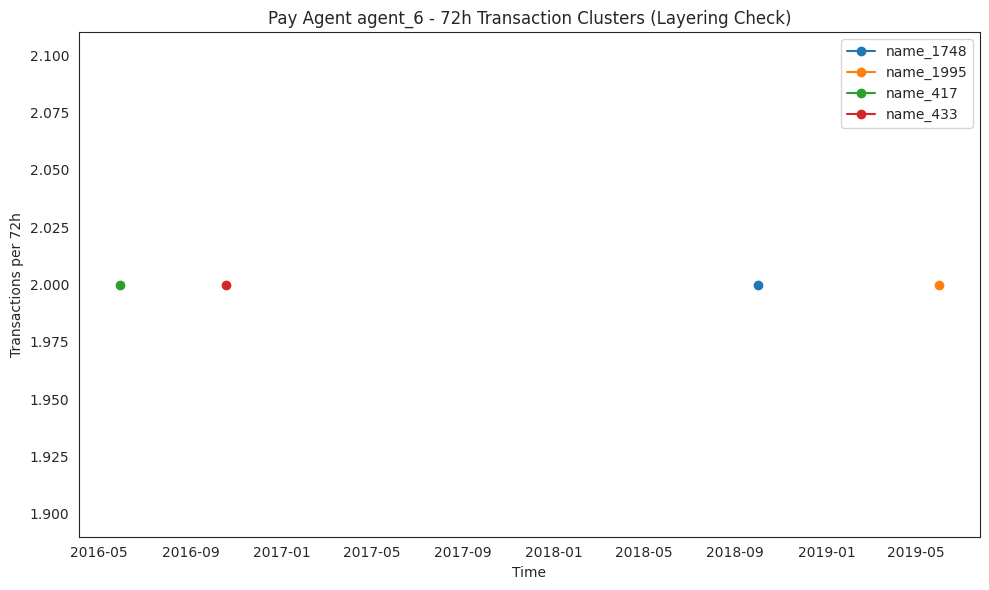

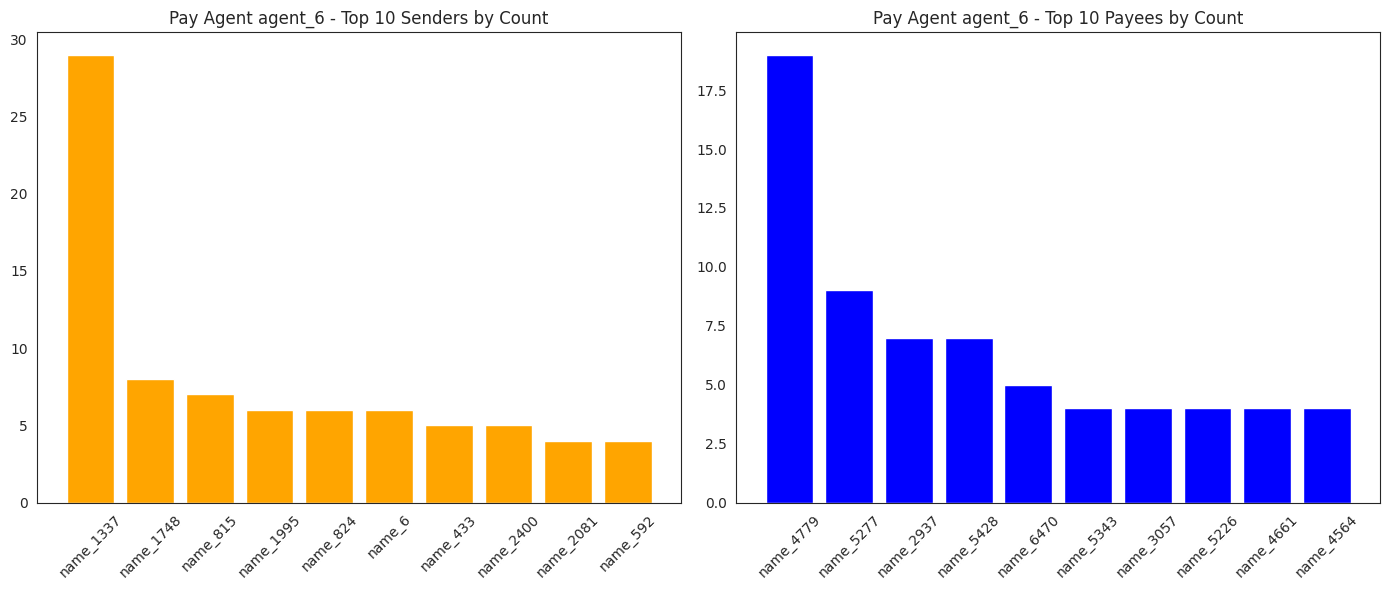

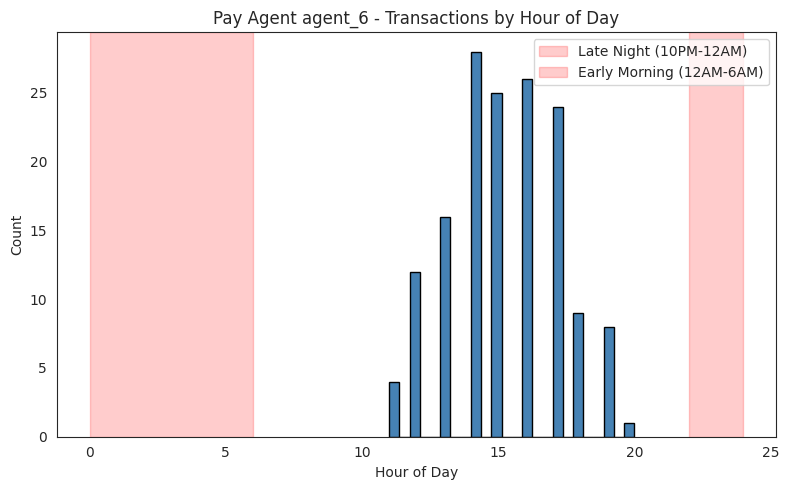

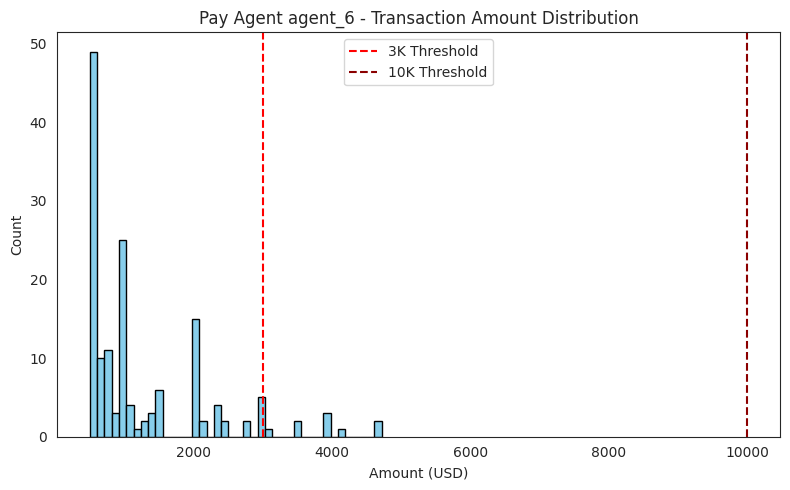

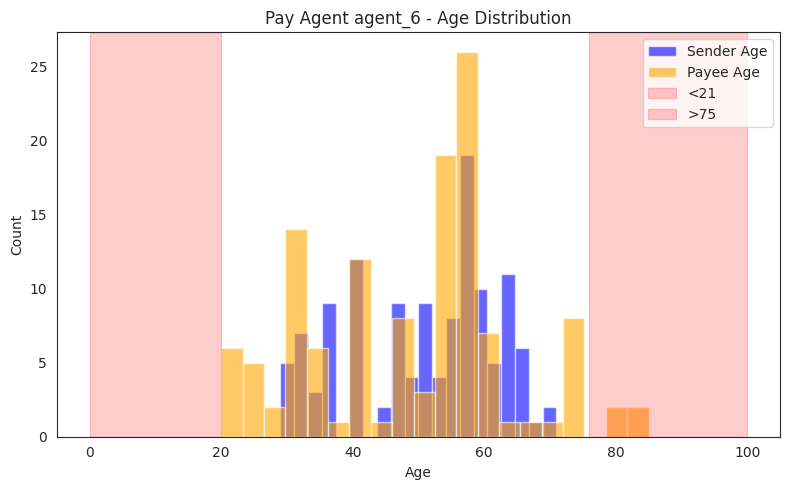

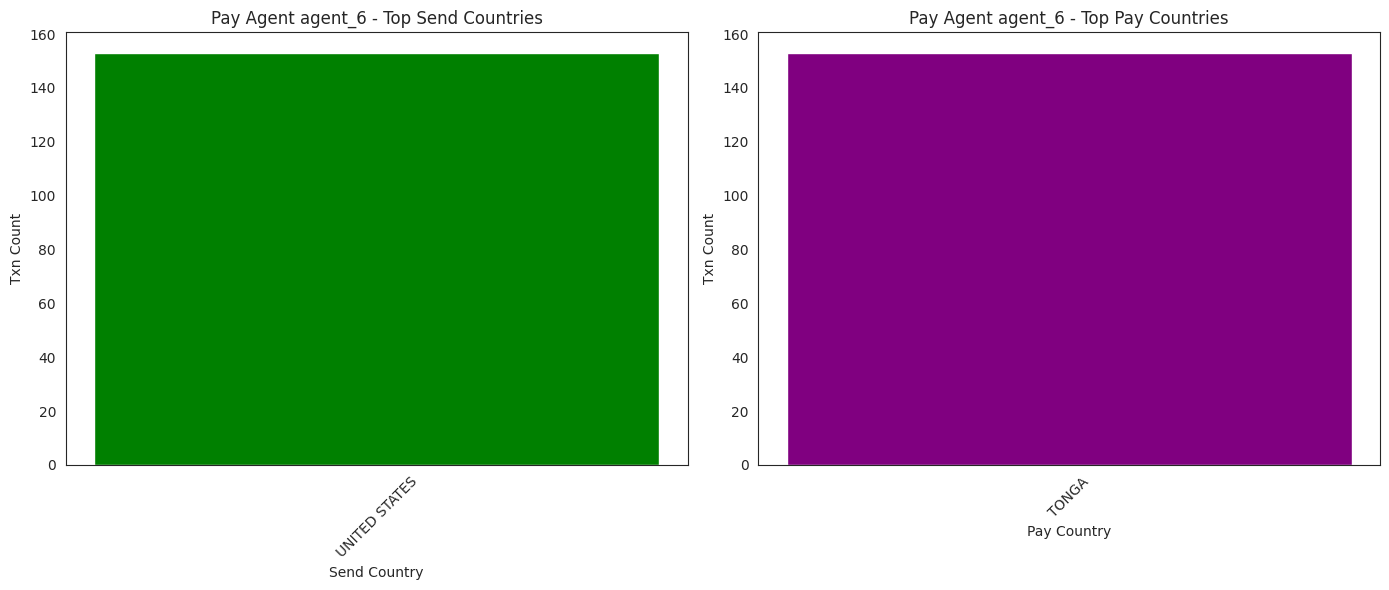


=== Pay Agent: agent_11 ===
Total Transactions: 966
Transactions near $3K: 2
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 22
US → Foreign transfers: 0


/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


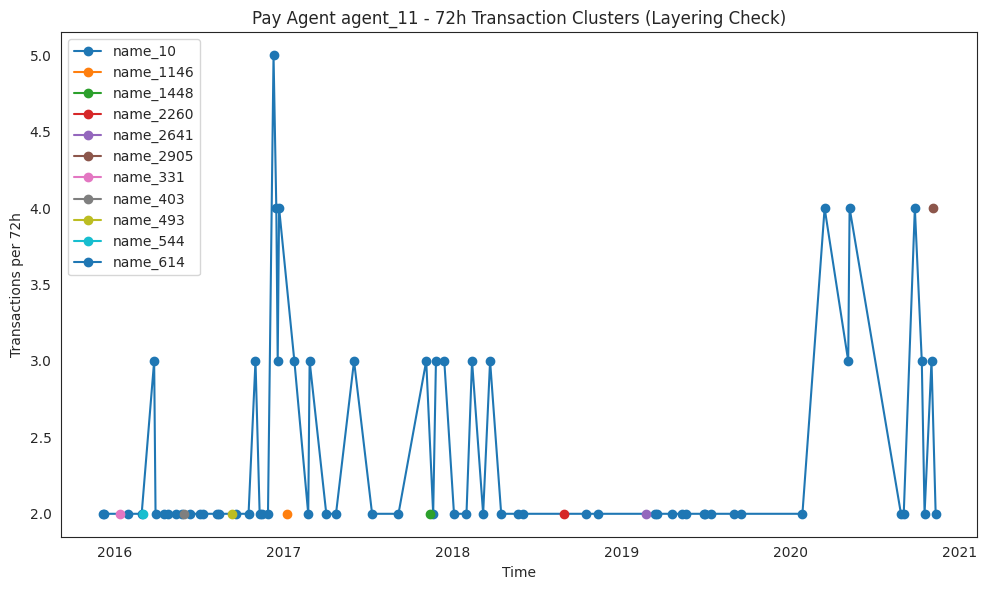

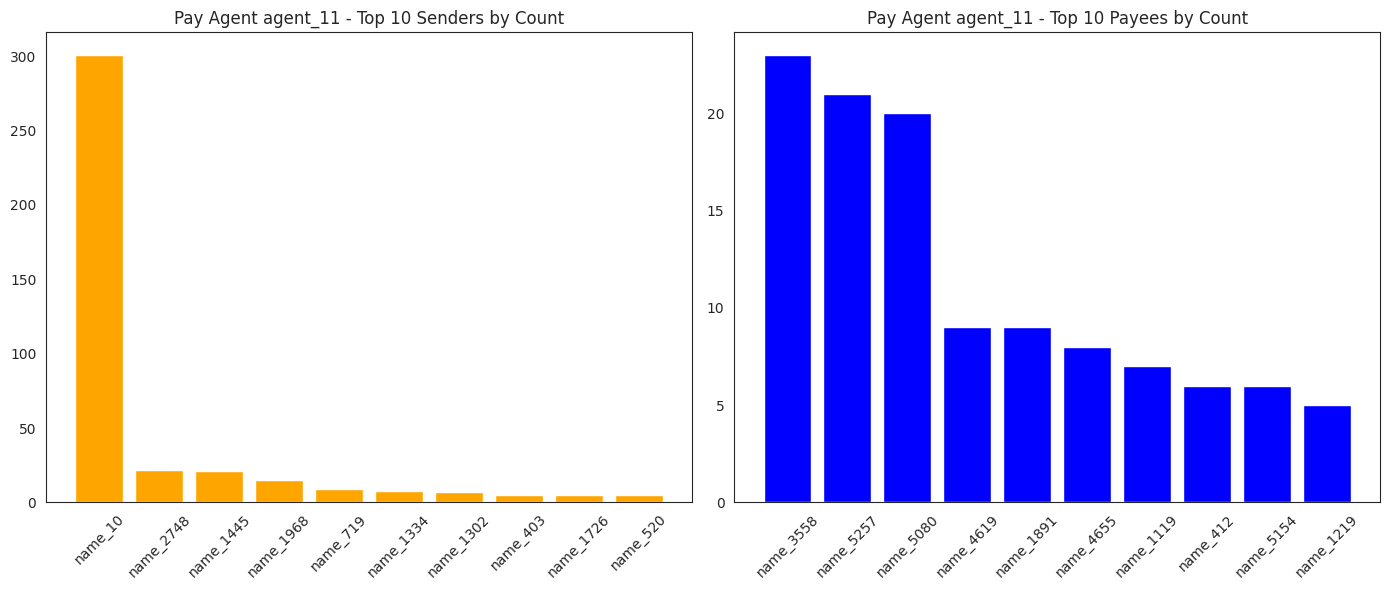

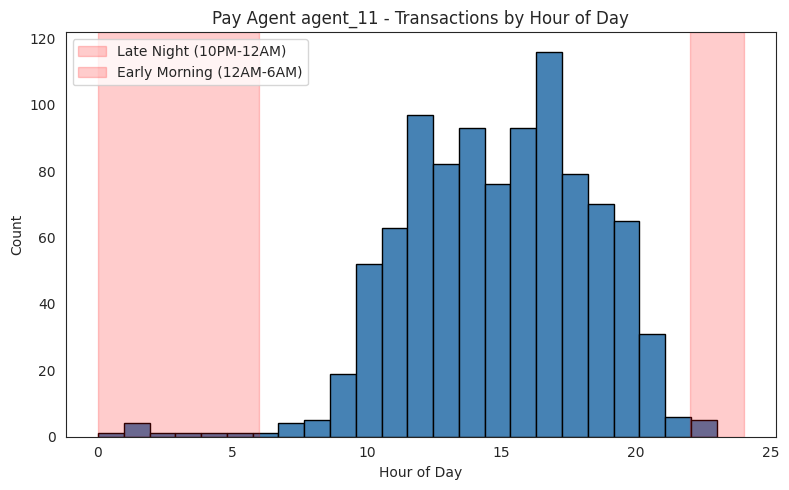

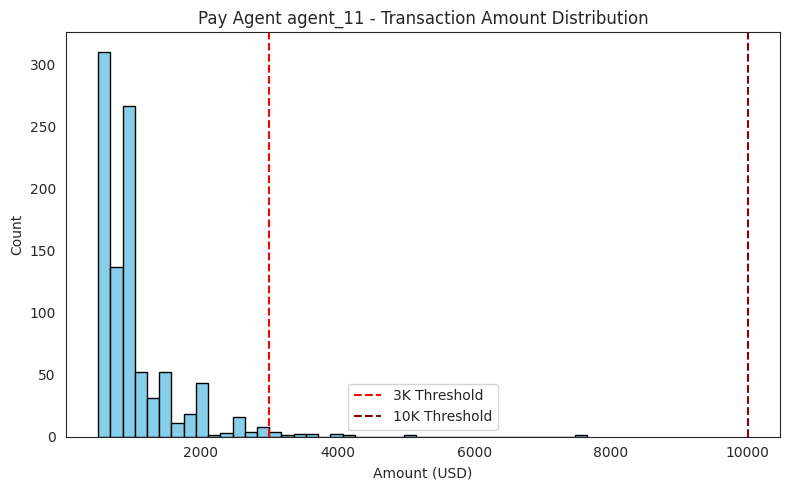

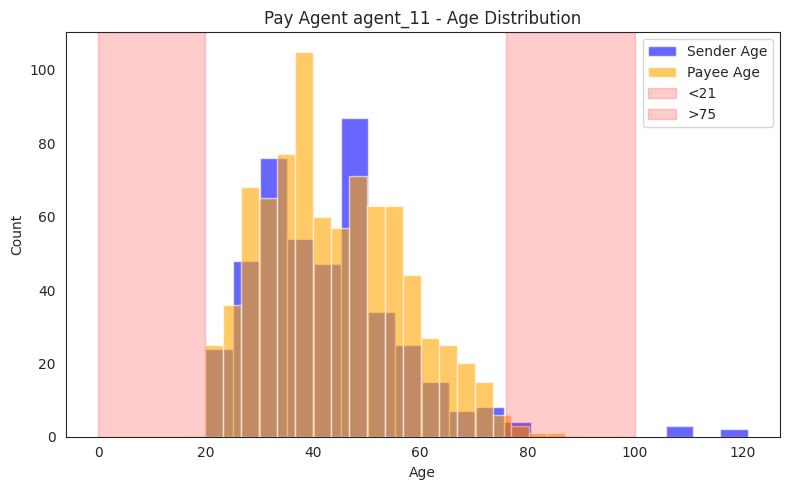

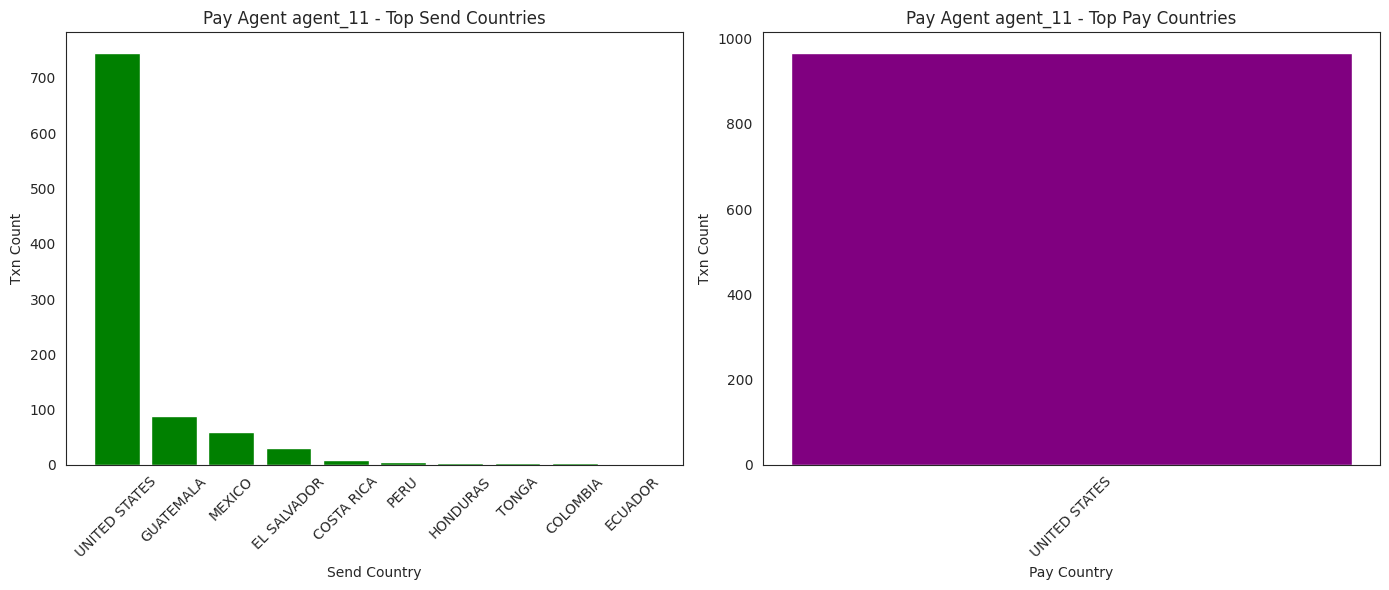


=== Pay Agent: agent_39 ===
Total Transactions: 200
Transactions near $3K: 0
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 7
US → Foreign transfers: 0


/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


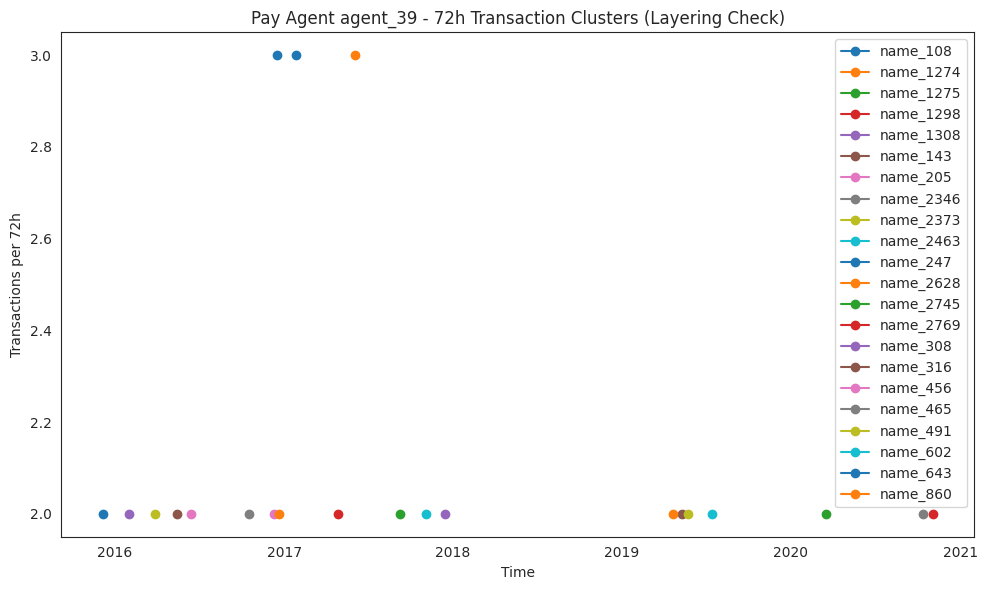

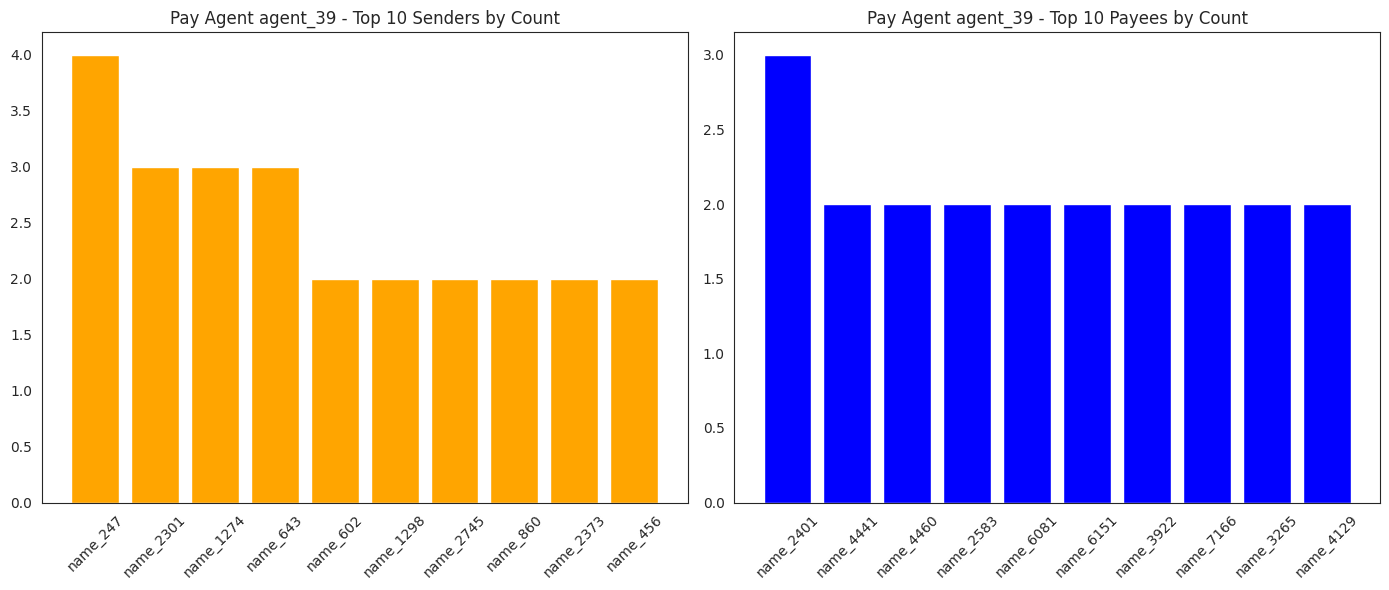

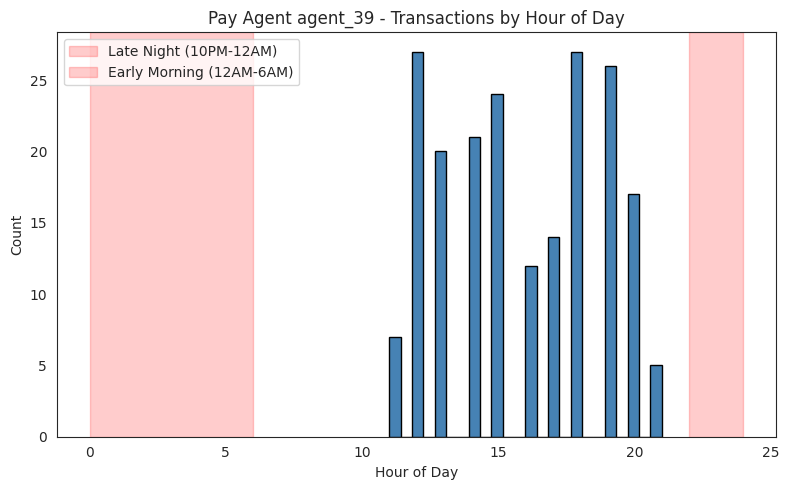

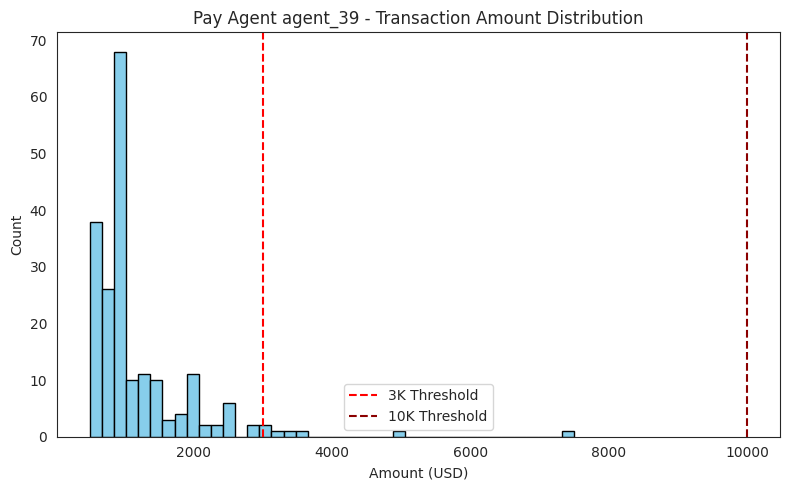

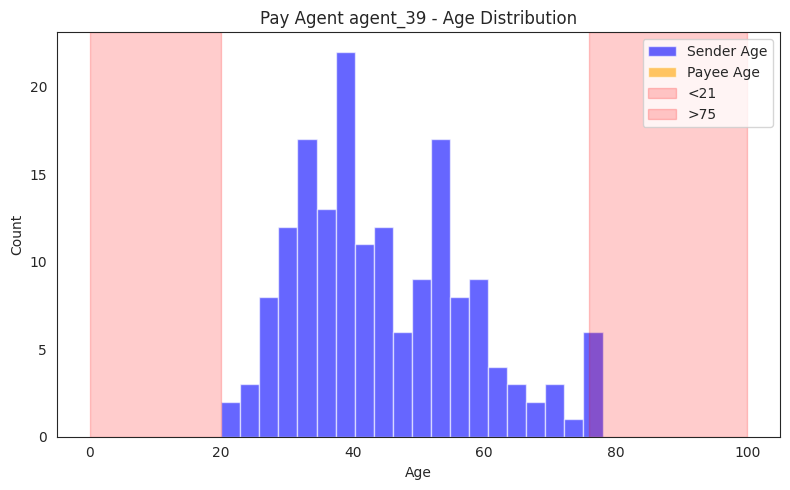

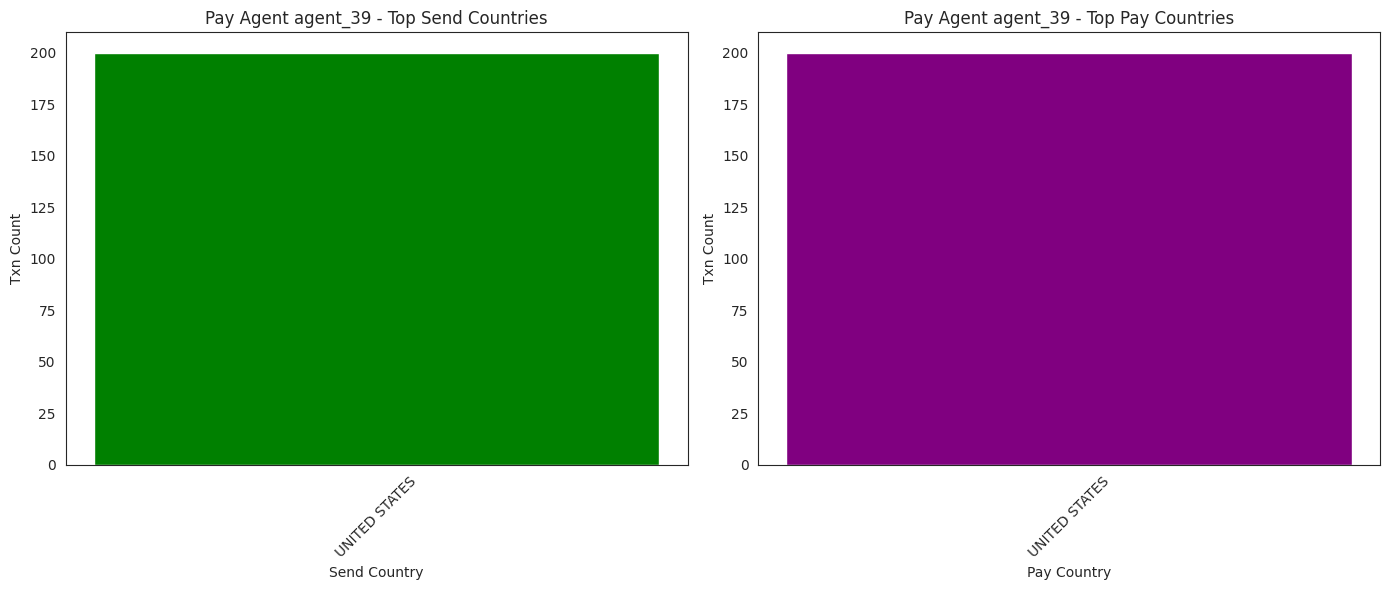


=== Pay Agent: agent_73 ===
Total Transactions: 182
Transactions near $3K: 4
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 4
US → Foreign transfers: 0


/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


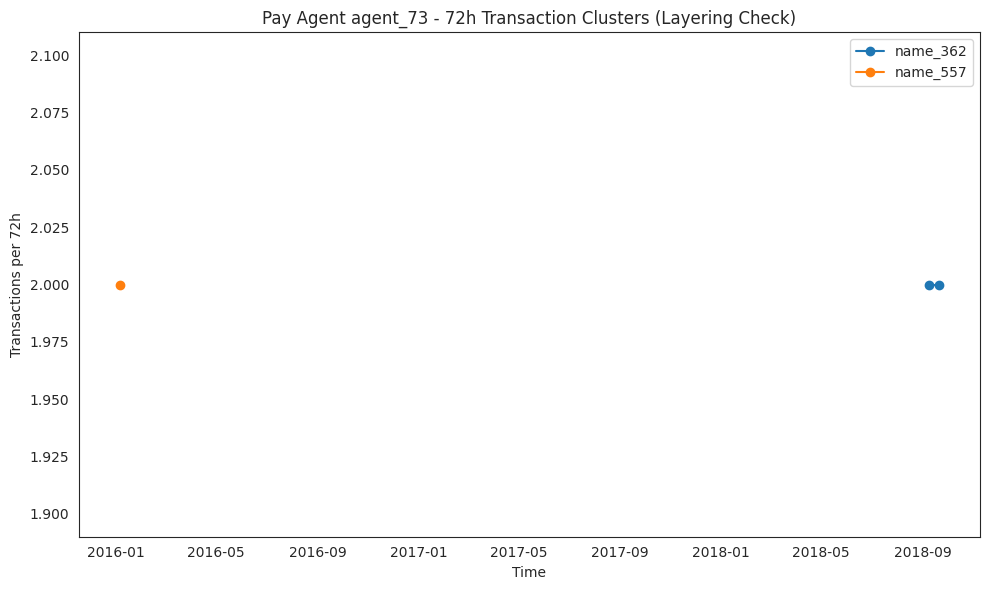

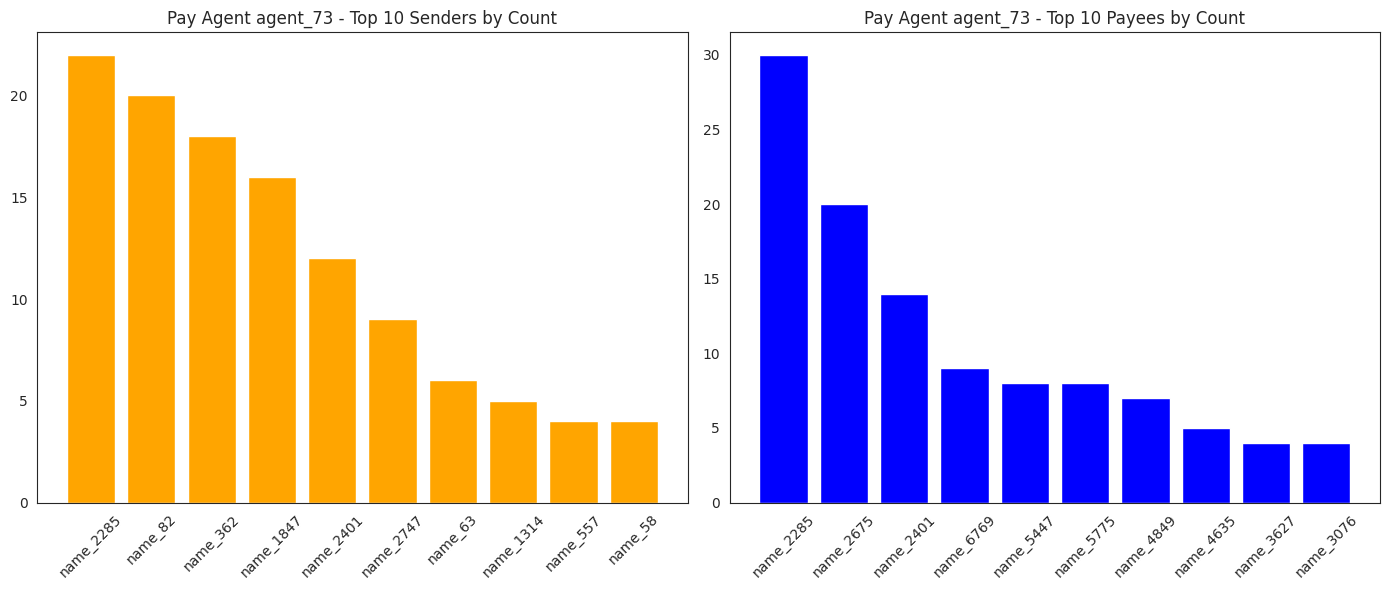

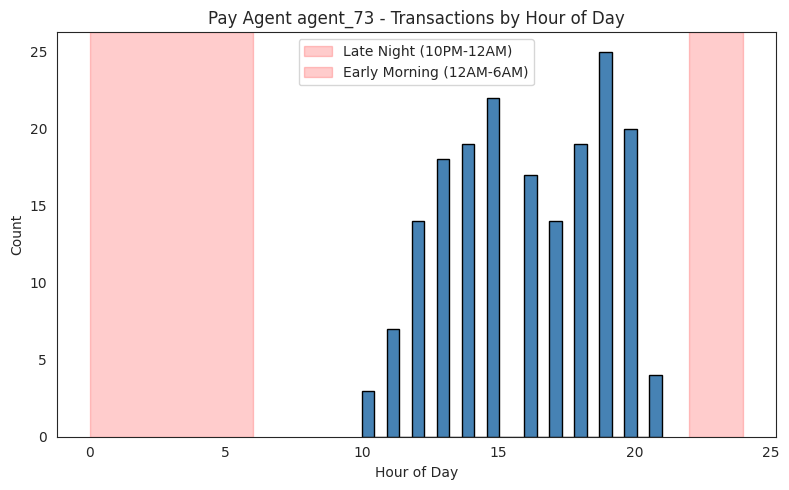

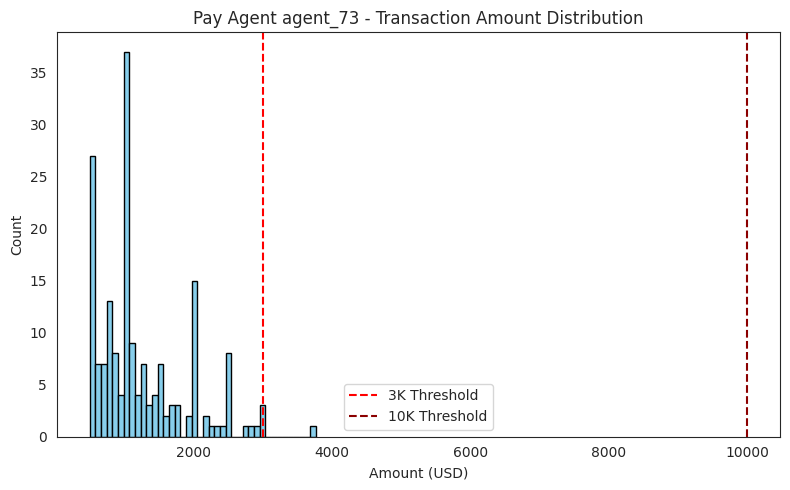

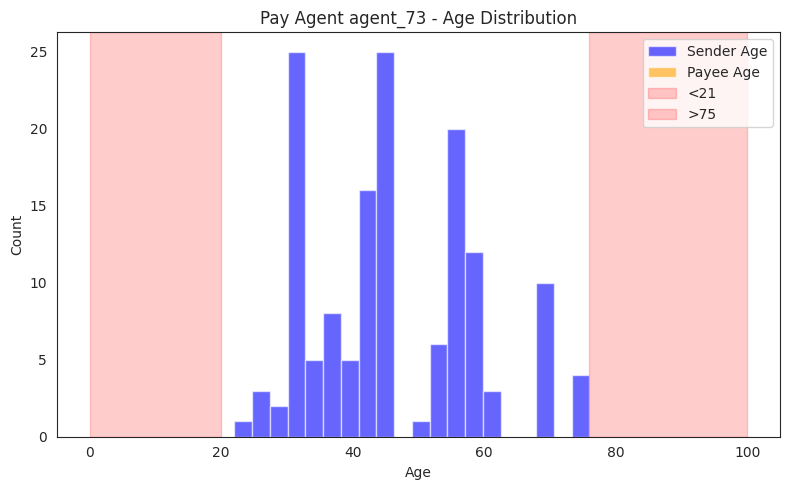

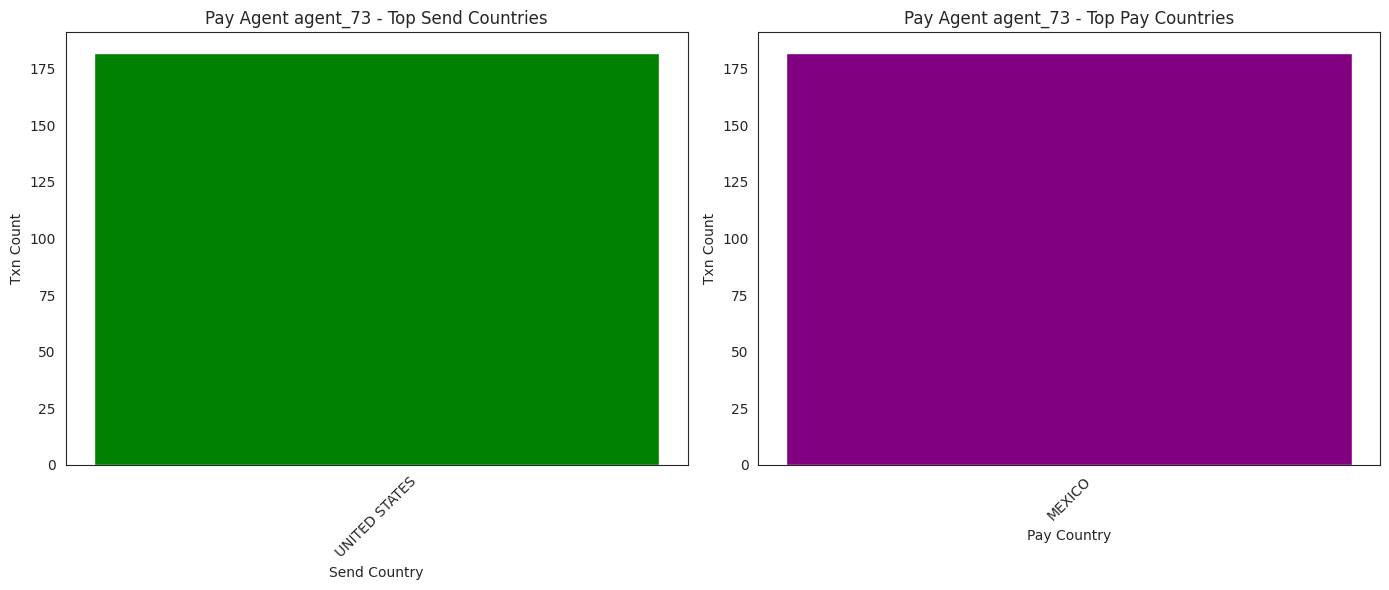


=== Send Agent: agent_2610 ===
Total Transactions: 1
Transactions near $3K: 0
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 0
US → Foreign transfers: 0
Send Agent agent_2610: No evidence of layering within 72h.



/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


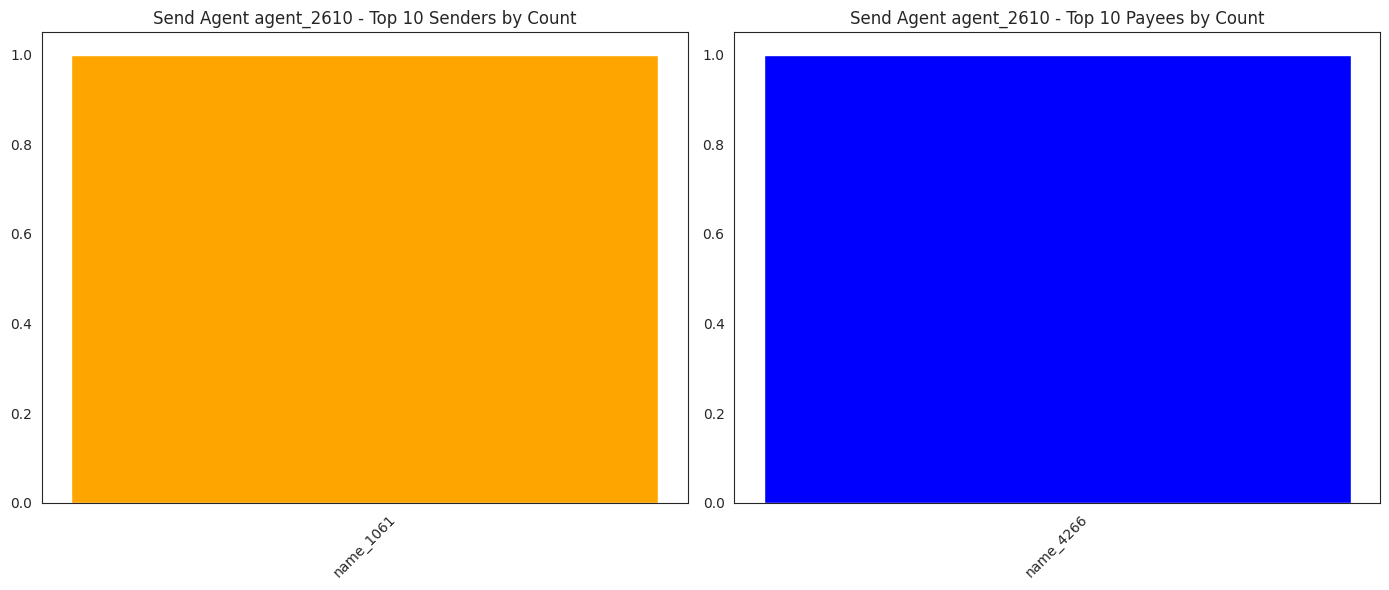

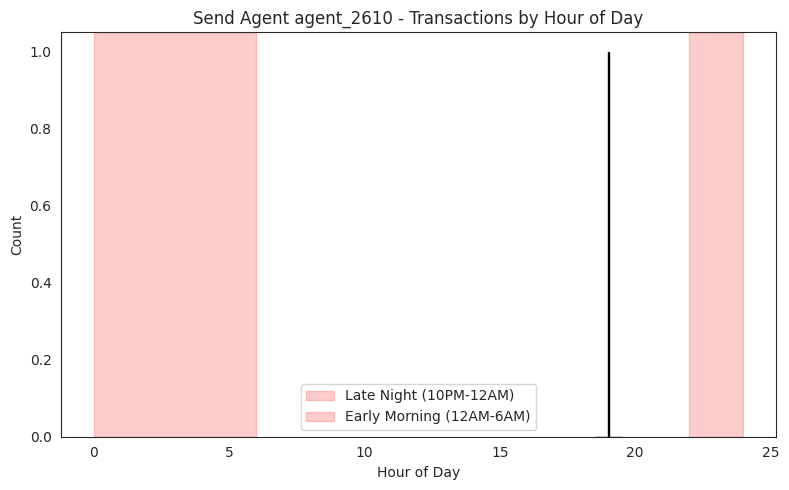

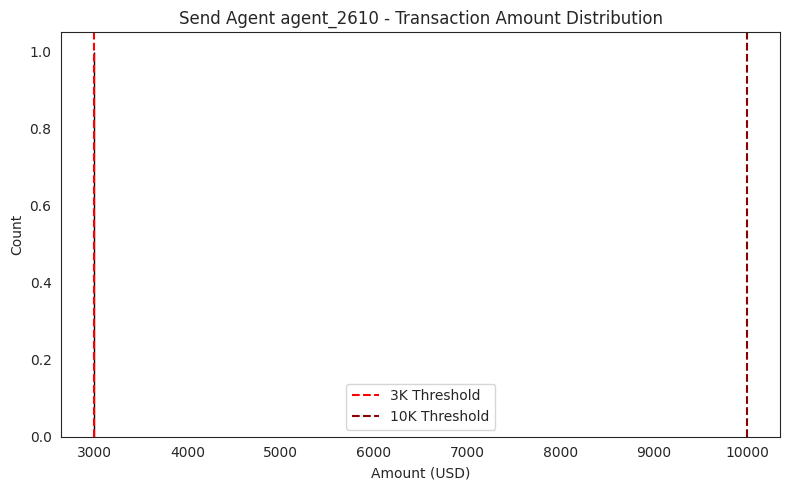

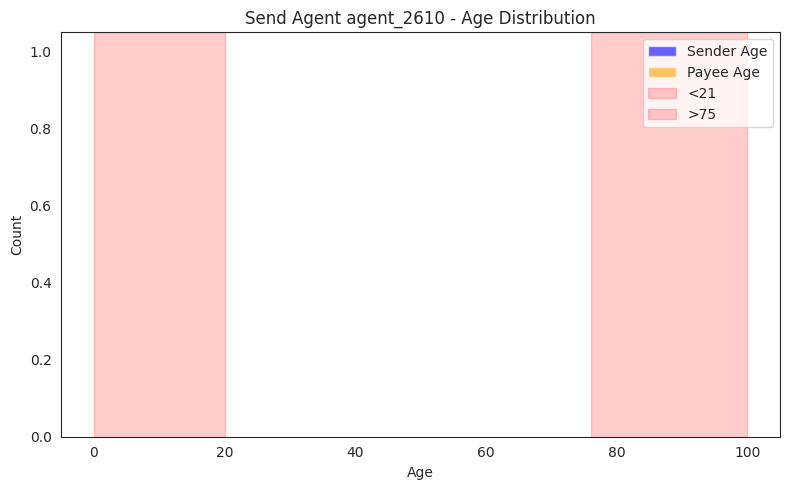

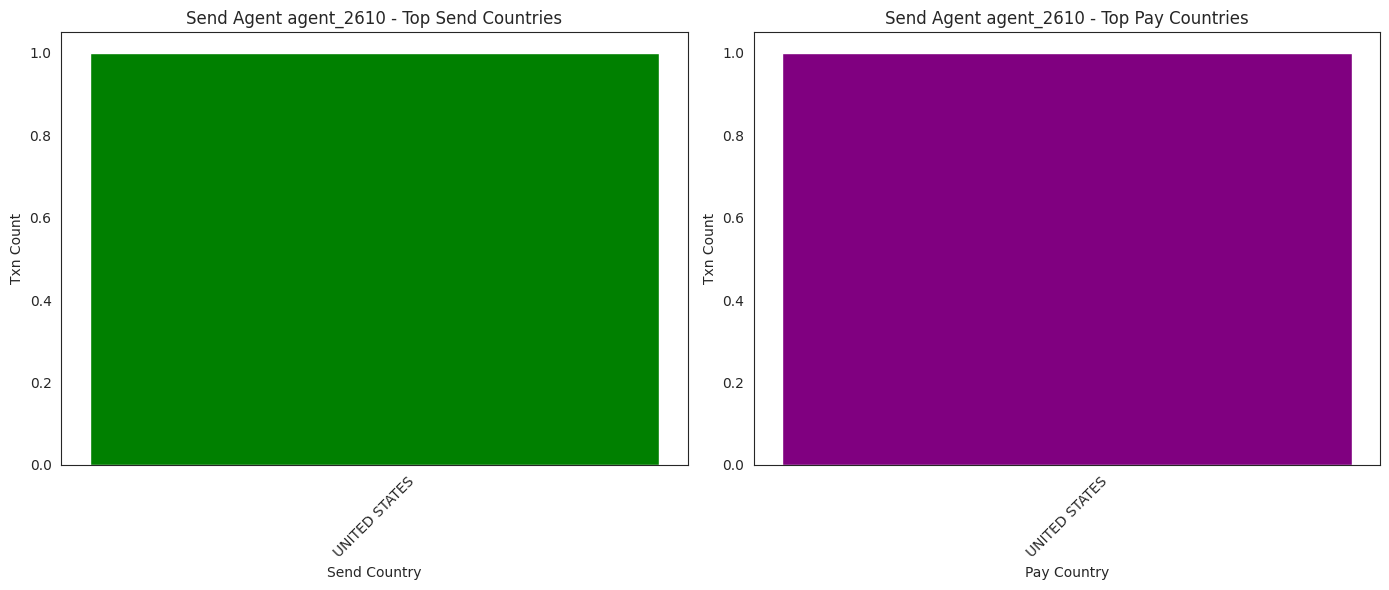


=== Send Agent: agent_2733 ===
Total Transactions: 1
Transactions near $3K: 0
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 0
US → Foreign transfers: 0
Send Agent agent_2733: No evidence of layering within 72h.



/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


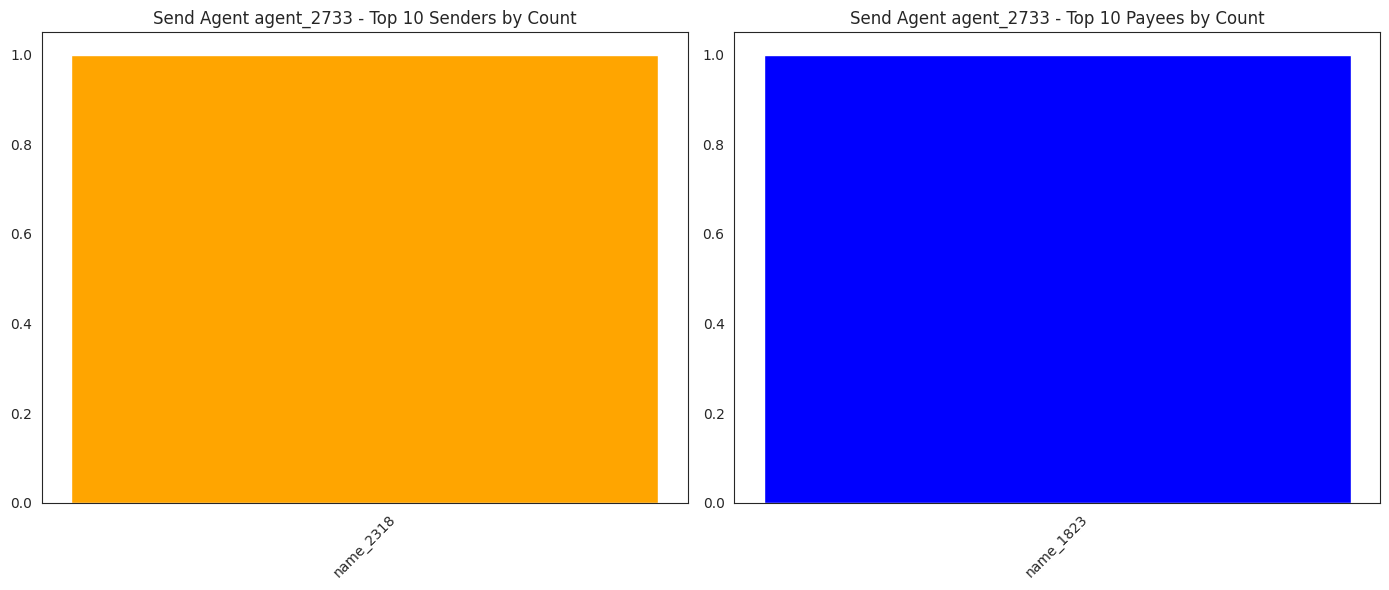

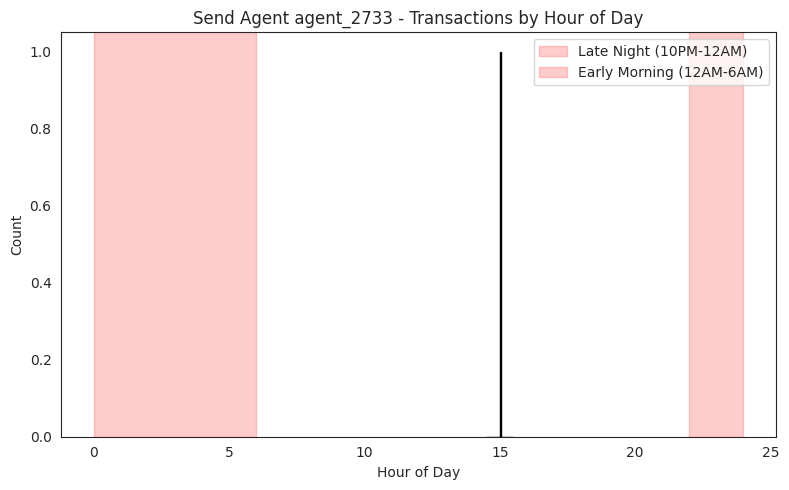

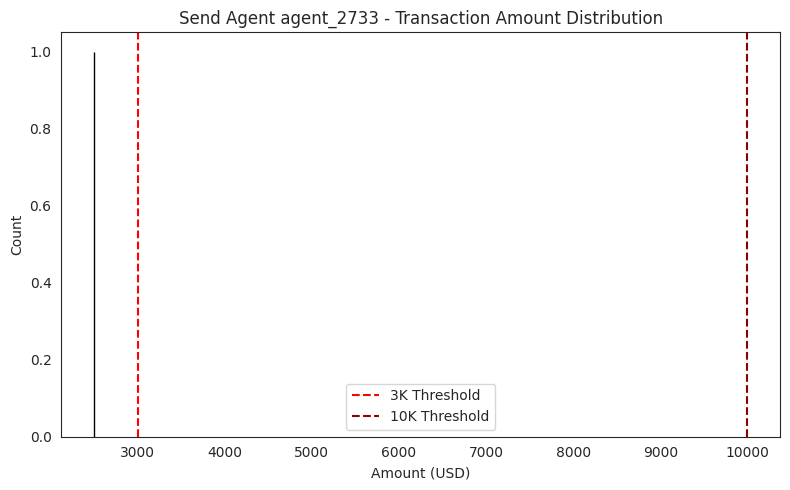

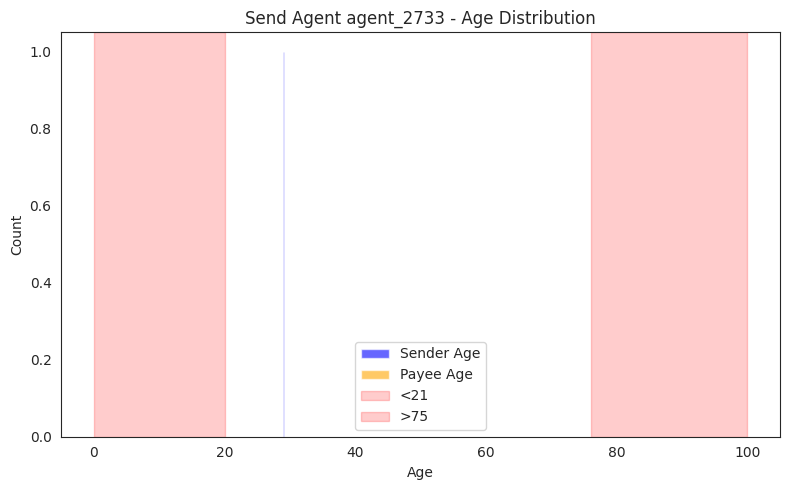

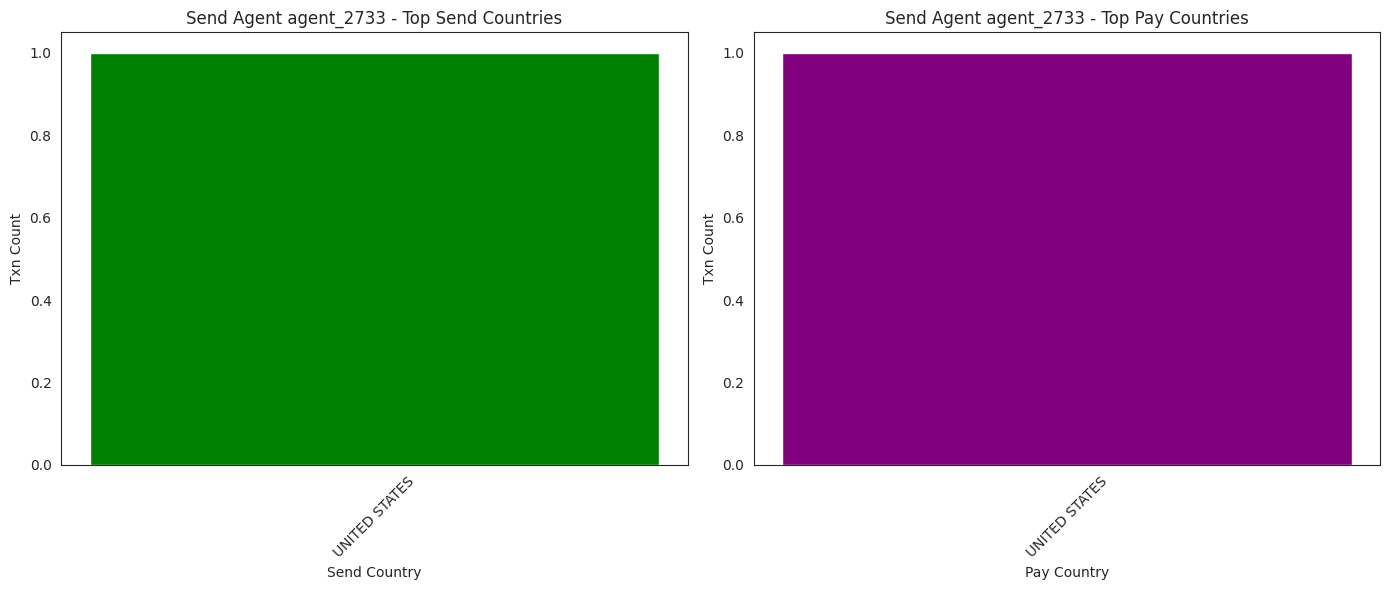


=== Send Agent: agent_1184 ===
Total Transactions: 1
Transactions near $3K: 0
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 0
US → Foreign transfers: 0
Send Agent agent_1184: No evidence of layering within 72h.



/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


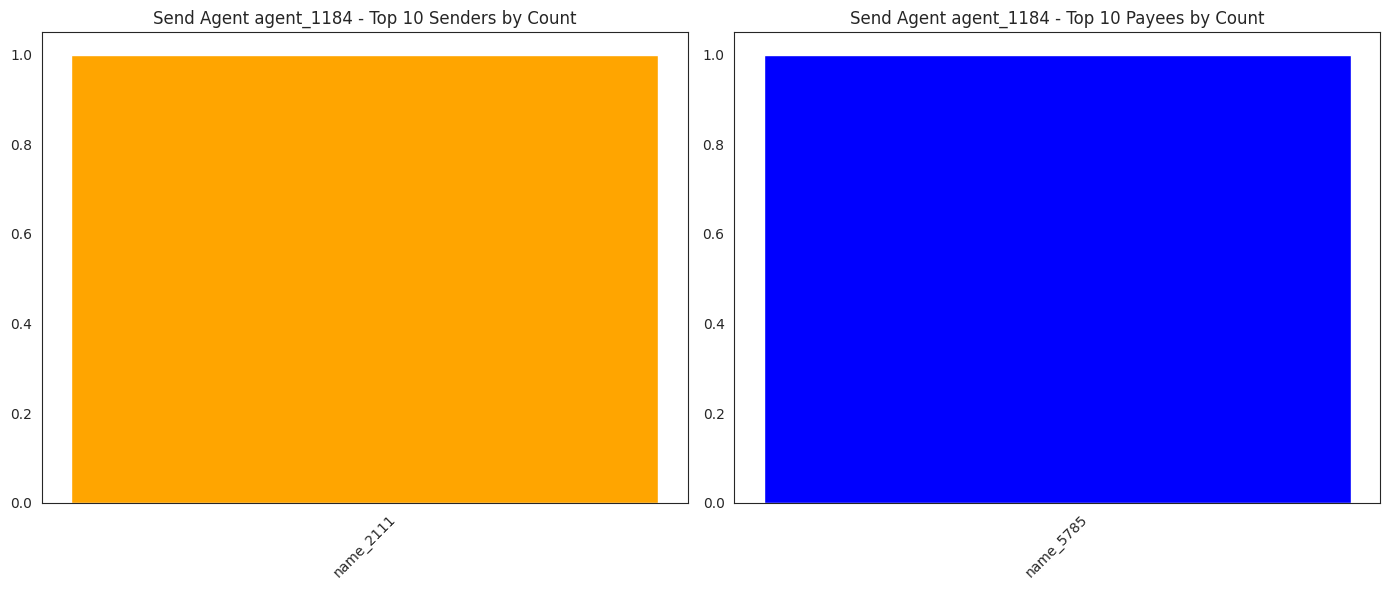

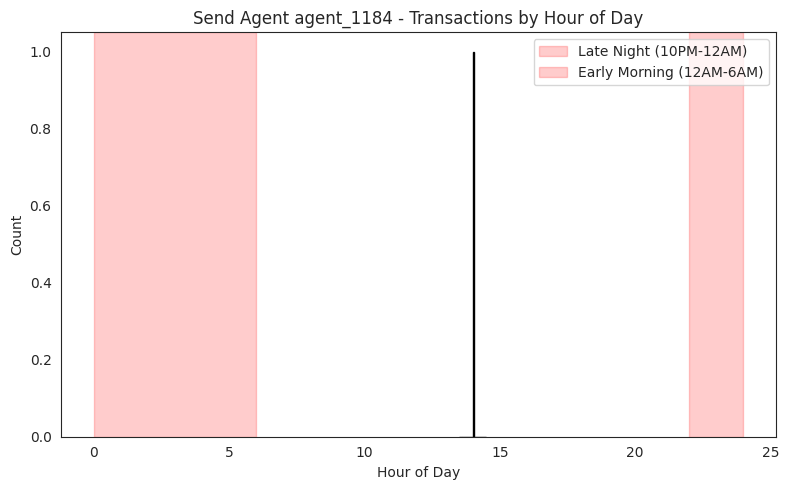

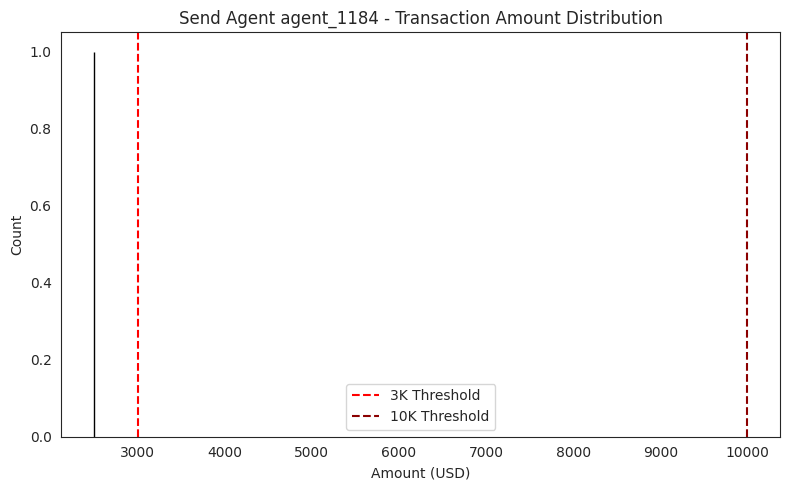

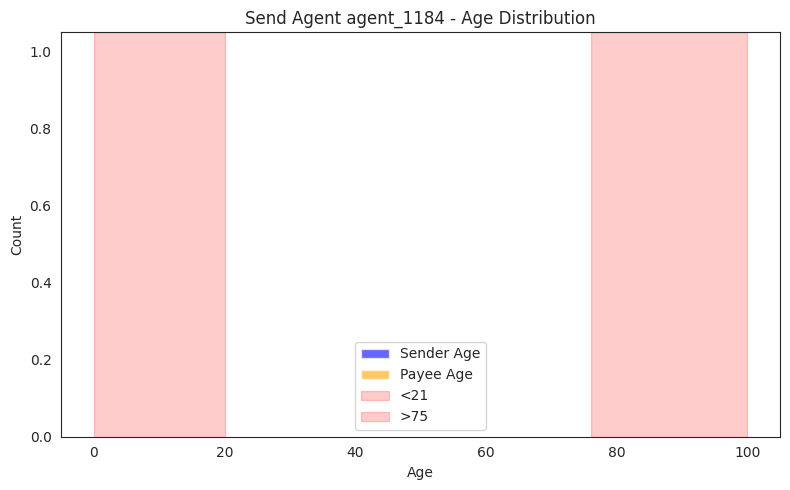

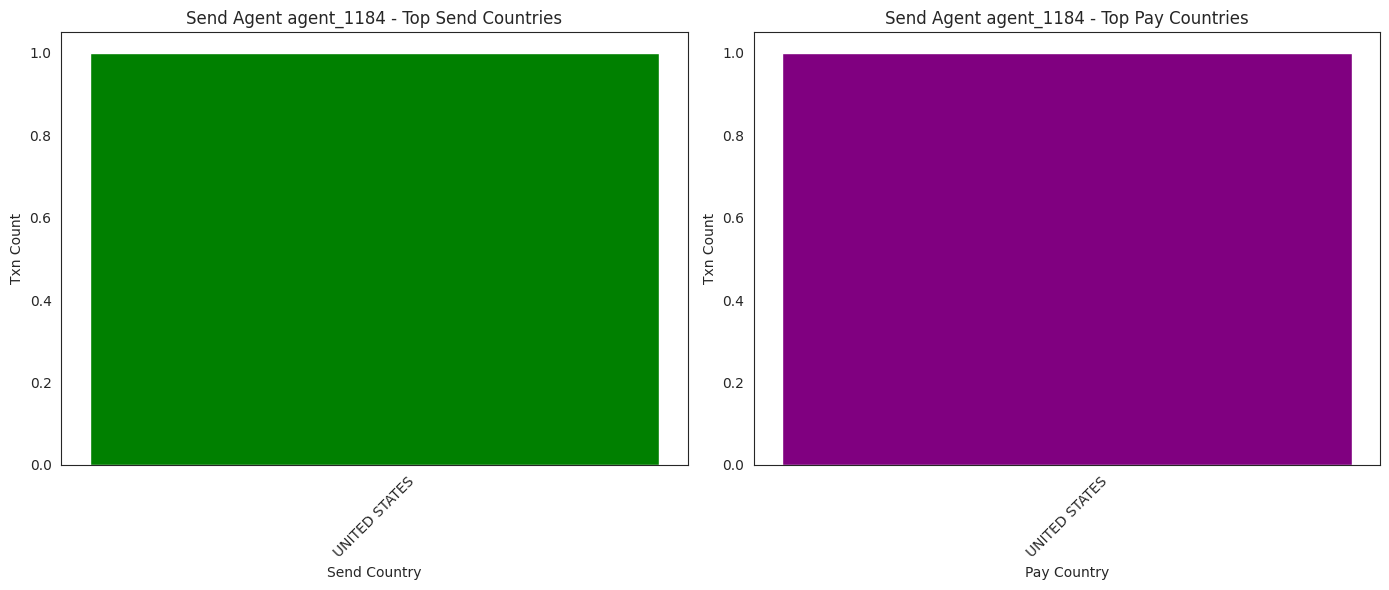


=== Send Agent: agent_2530 ===
Total Transactions: 1
Transactions near $3K: 0
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 0
US → Foreign transfers: 0
Send Agent agent_2530: No evidence of layering within 72h.



/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


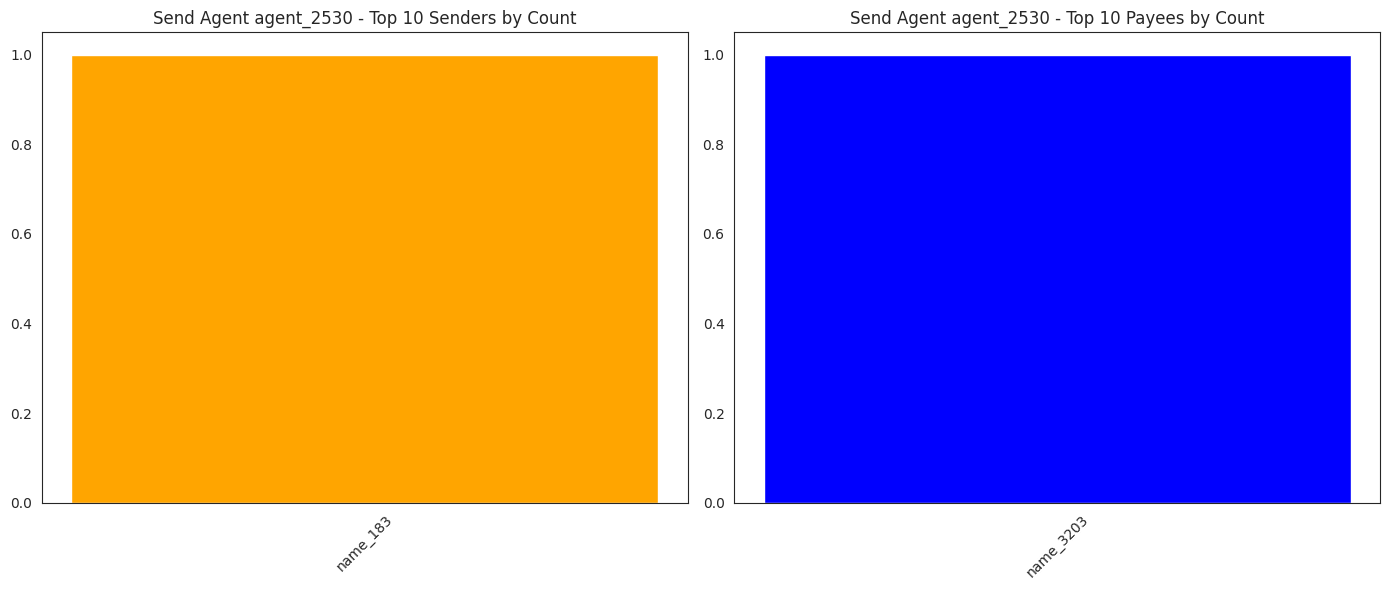

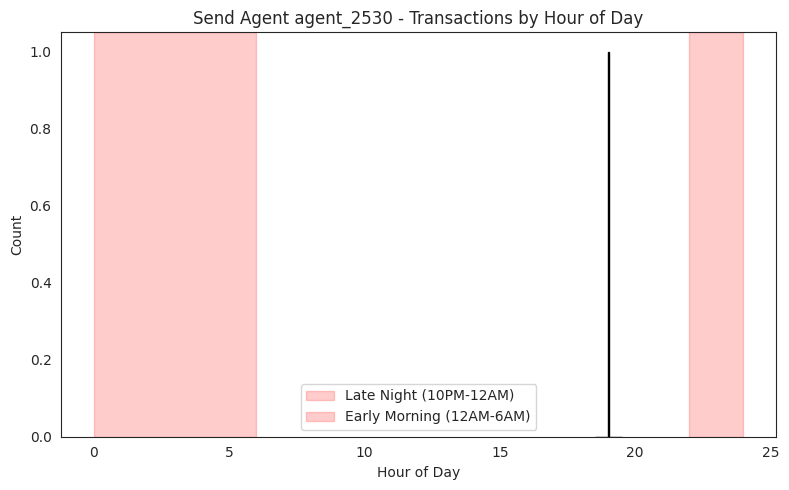

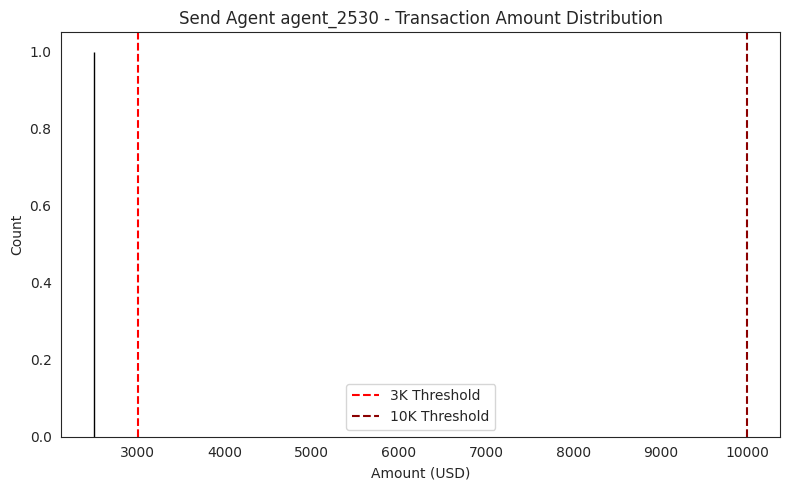

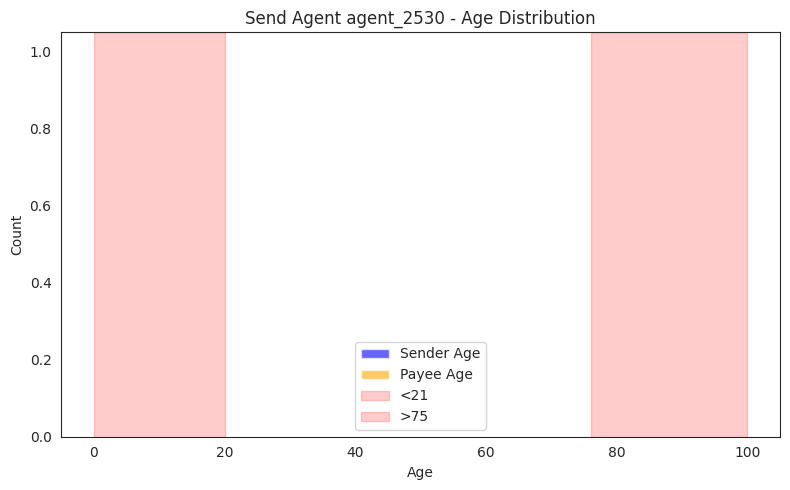

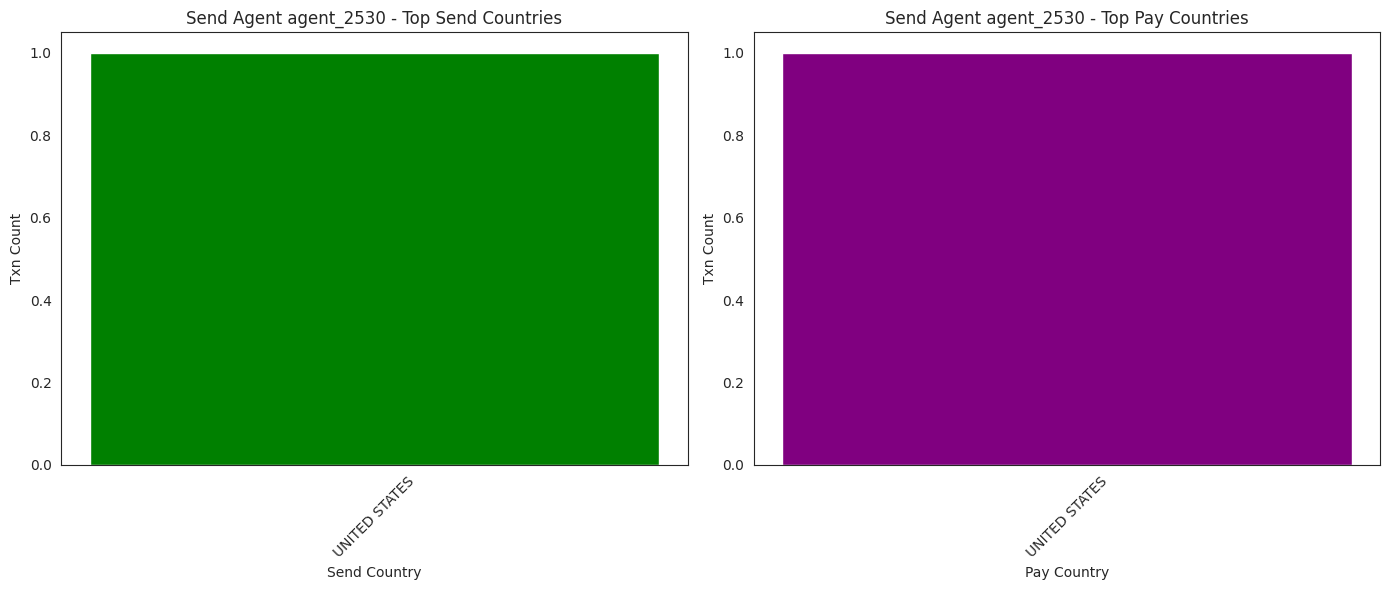


=== Send Agent: agent_2630 ===
Total Transactions: 1
Transactions near $3K: 0
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 0
US → Foreign transfers: 0
Send Agent agent_2630: No evidence of layering within 72h.



/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


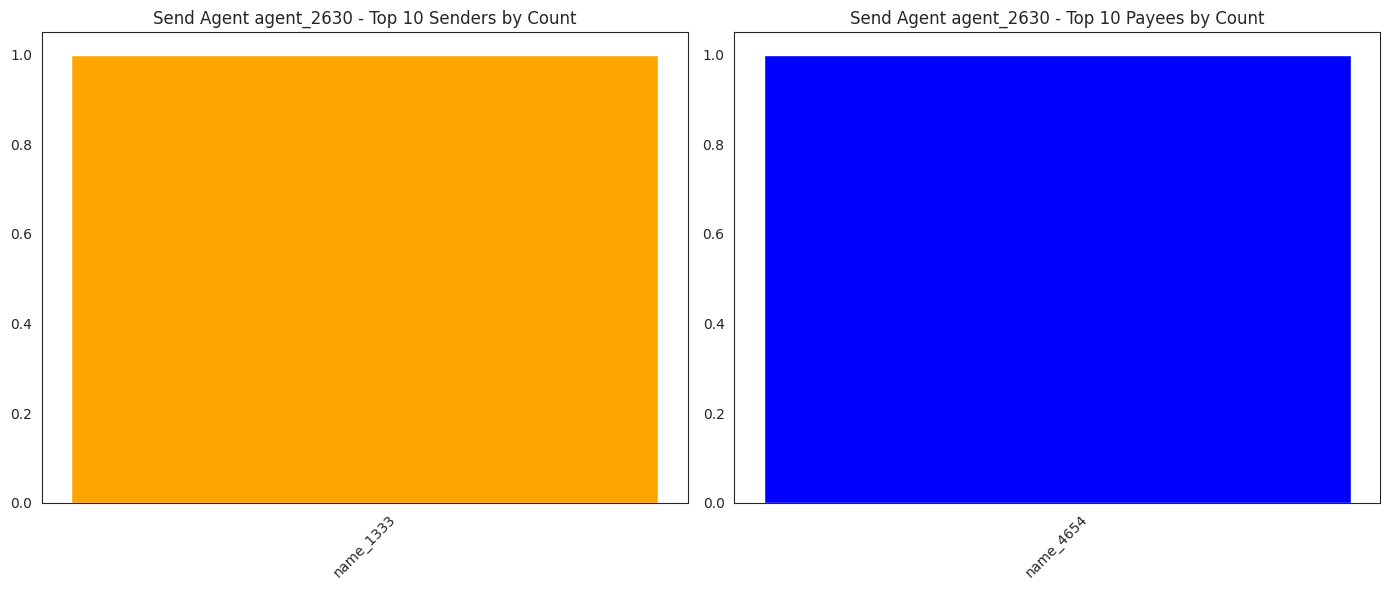

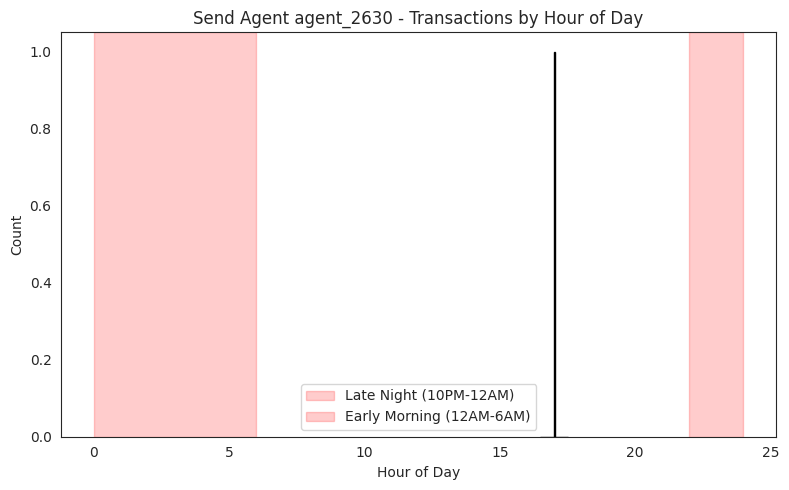

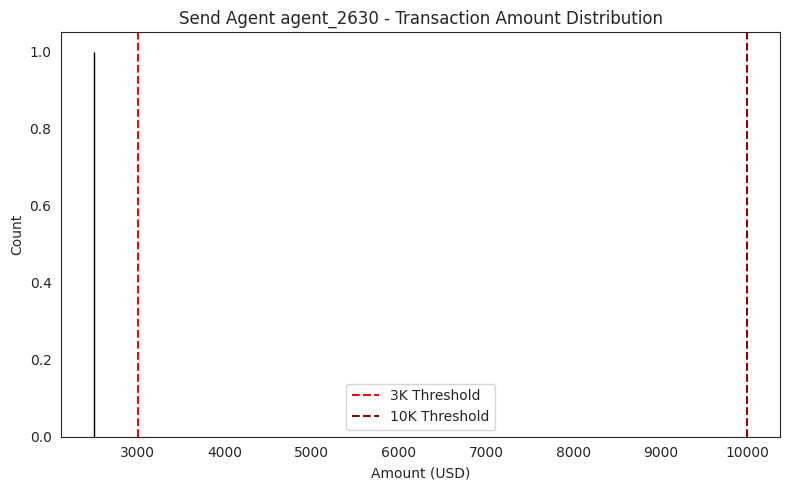

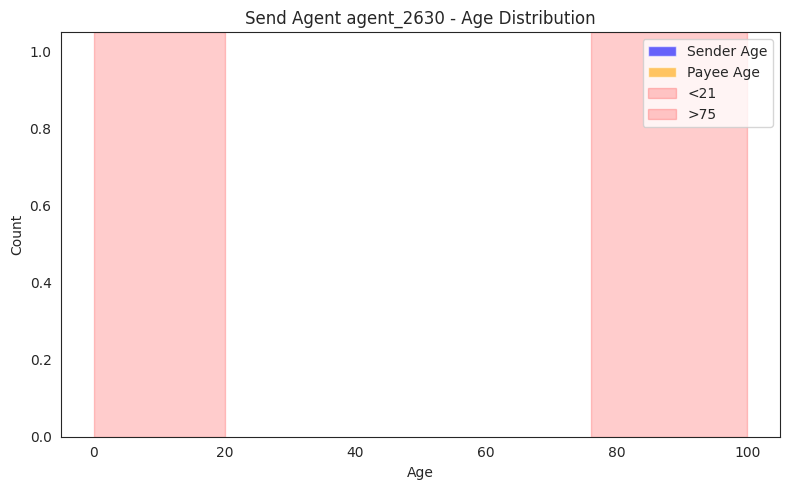

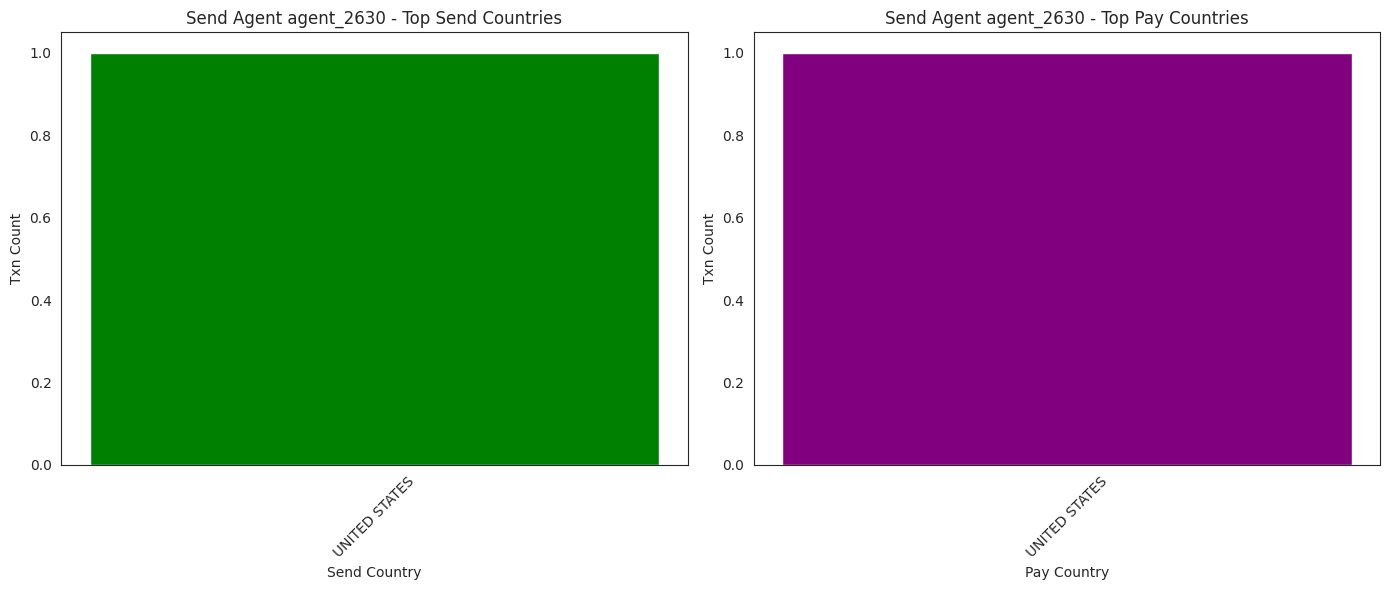


=== Send Agent: agent_2522 ===
Total Transactions: 1
Transactions near $3K: 0
Transactions near $10K: 0
Transactions with unusual ages (<21 or >75): 0
US → Foreign transfers: 0
Send Agent agent_2522: No evidence of layering within 72h.



/tmp/ipykernel_51/3345600643.py:100: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


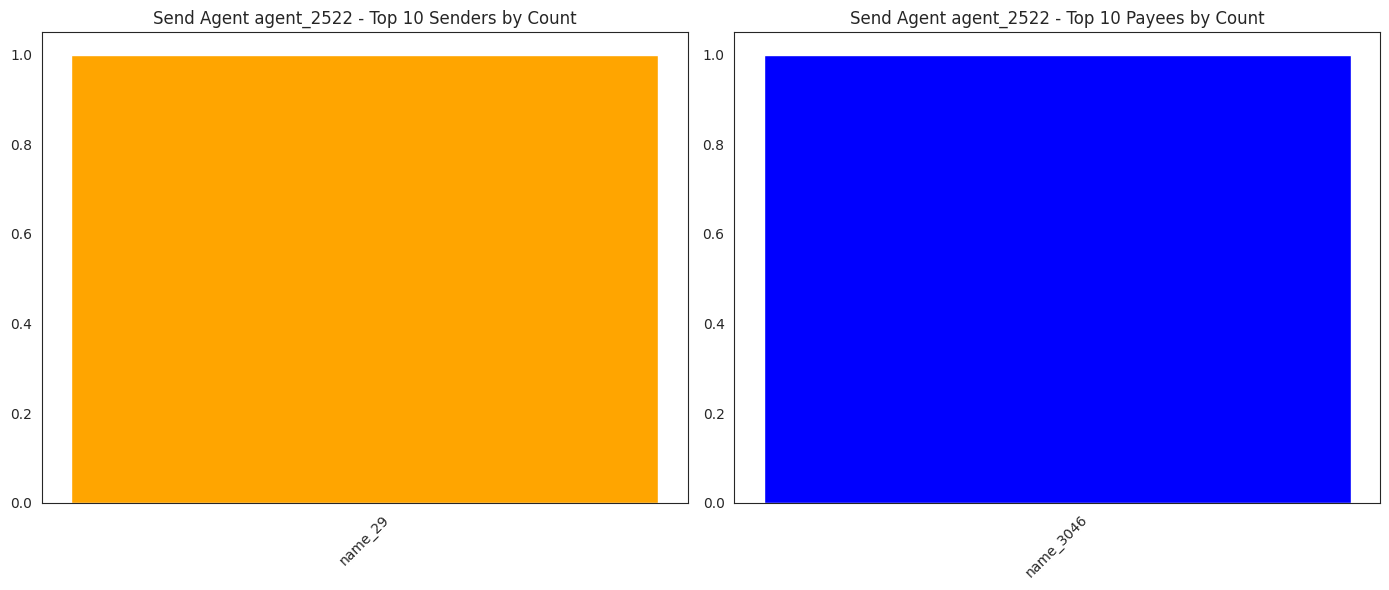

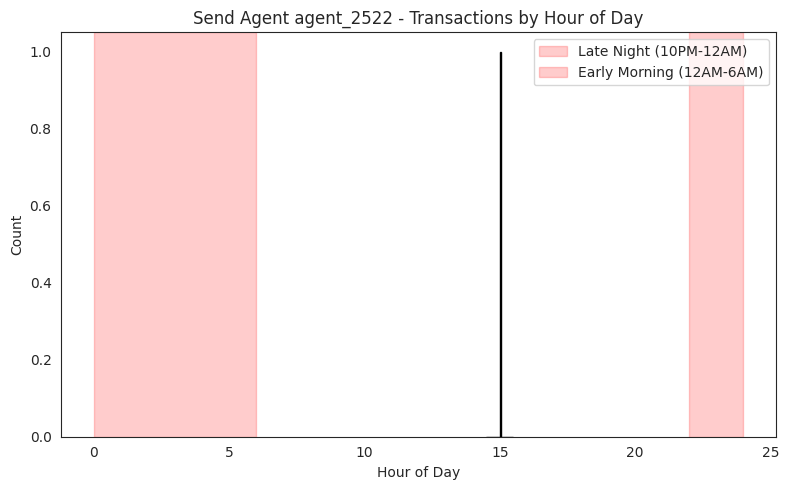

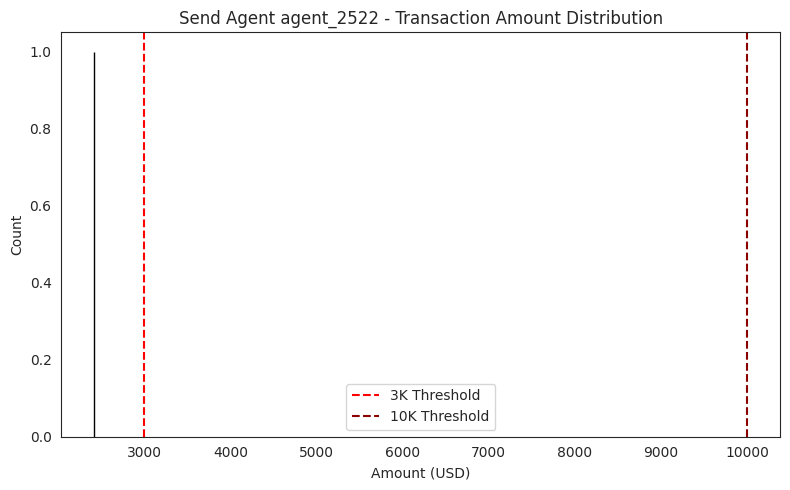

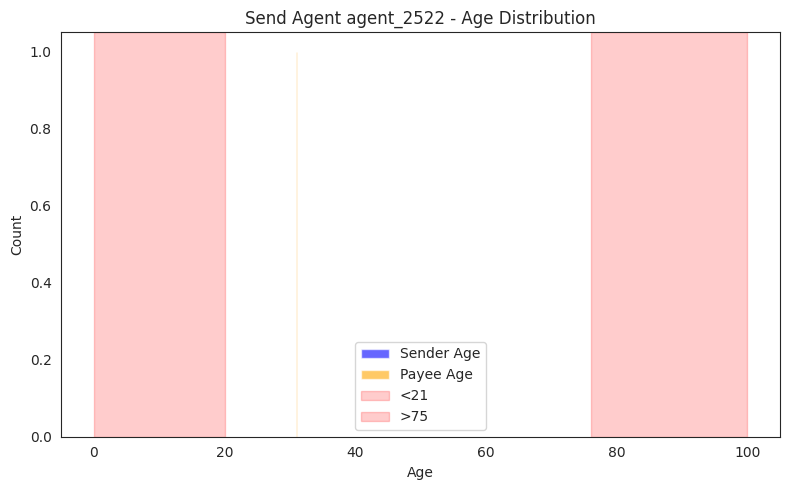

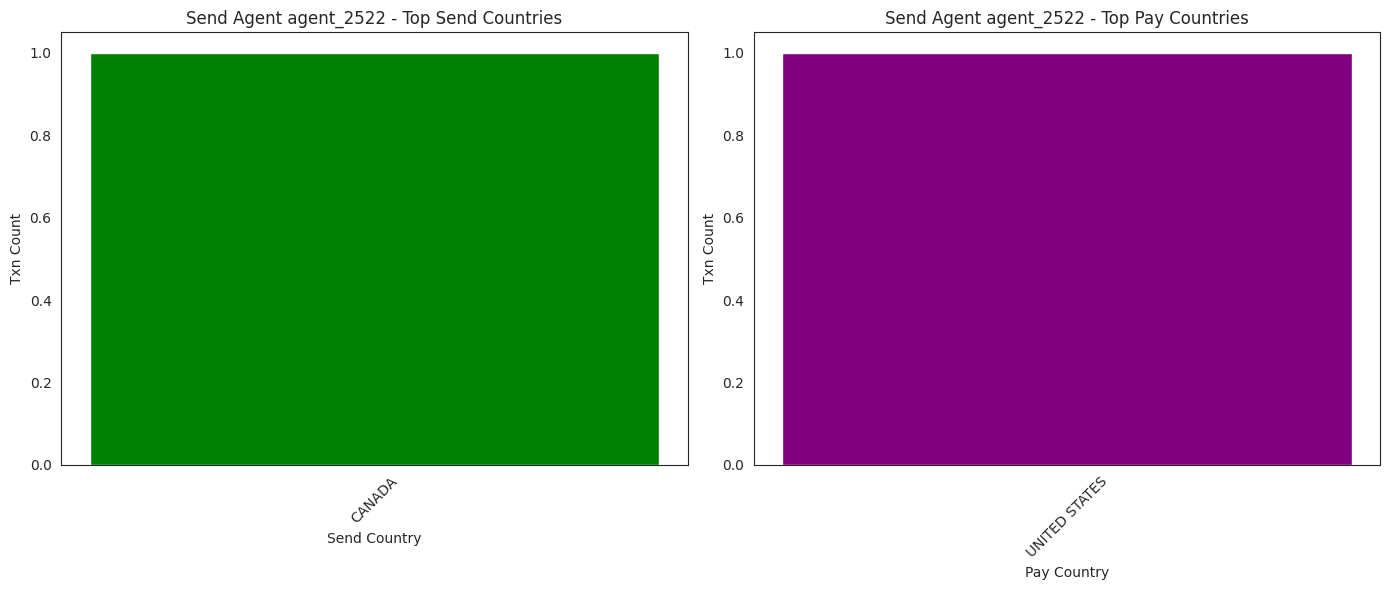

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Agents to review
pay_agents_to_review  = ["agent_6", "agent_11", "agent_39", "agent_73"]
send_agents_to_review = ["agent_2610", "agent_2733", "agent_1184", "agent_2530", "agent_2630", "agent_2522"]

# Ensure datetimes
df["Send DateTime"] = pd.to_datetime(df["Send DateTime"], errors="coerce")
df["Pay DateTime"]  = pd.to_datetime(df["Pay DateTime"], errors="coerce")

# --- Helper visualizations ---
def plot_amount_hist(df, agent_name, agent_type):
    """Histogram of transaction amounts with thresholds."""
    plt.figure(figsize=(8,5))
    plt.hist(df["Amount"], bins=40, color="skyblue", edgecolor="black")
    plt.axvline(3000, color="red", linestyle="--", label="3K Threshold")
    plt.axvline(10000, color="darkred", linestyle="--", label="10K Threshold")
    plt.title(f"{agent_type} {agent_name} - Transaction Amount Distribution")
    plt.xlabel("Amount (USD)")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_age_distribution(df, agent_name, agent_type):
    """Distribution of sender and payee ages."""
    plt.figure(figsize=(8,5))
    plt.hist(df["Sender Age"].dropna(), bins=20, alpha=0.6, label="Sender Age", color="blue")
    plt.hist(df["Payee Age"].dropna(), bins=20, alpha=0.6, label="Payee Age", color="orange")
    plt.axvspan(0, 20, color="red", alpha=0.2, label="<21")
    plt.axvspan(76, 100, color="red", alpha=0.2, label=">75")
    plt.title(f"{agent_type} {agent_name} - Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_country_bar(df, agent_name, agent_type):
    """Barplot of Send and Pay Countries for an agent."""
    send_counts = df["Send Country"].value_counts().head(10)
    pay_counts  = df["Pay Country"].value_counts().head(10)

    fig, axes = plt.subplots(1, 2, figsize=(14,6))
    axes[0].bar(send_counts.index, send_counts.values, color="green")
    axes[0].set_title(f"{agent_type} {agent_name} - Top Send Countries")
    axes[0].set_xlabel("Send Country")
    axes[0].set_ylabel("Txn Count")
    axes[0].tick_params(axis="x", rotation=45)

    axes[1].bar(pay_counts.index, pay_counts.values, color="purple")
    axes[1].set_title(f"{agent_type} {agent_name} - Top Pay Countries")
    axes[1].set_xlabel("Pay Country")
    axes[1].set_ylabel("Txn Count")
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

def plot_time_activity(df, agent_name, agent_type):
    """Histogram of transactions by hour-of-day."""
    plt.figure(figsize=(8,5))
    plt.hist(df["Send DateTime"].dt.hour.dropna(), bins=24, color="steelblue", edgecolor="black")
    plt.axvspan(22, 24, color="red", alpha=0.2, label="Late Night (10PM-12AM)")
    plt.axvspan(0, 6, color="red", alpha=0.2, label="Early Morning (12AM-6AM)")
    plt.title(f"{agent_type} {agent_name} - Transactions by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_high_frequency(df, agent_name, agent_type):
    """Top senders and receivers by transaction count."""
    sender_counts = df["Sender Name_"].value_counts().head(10)
    payee_counts  = df["Payee Name_"].value_counts().head(10)

    fig, axes = plt.subplots(1, 2, figsize=(14,6))
    axes[0].bar(sender_counts.index, sender_counts.values, color="orange")
    axes[0].set_title(f"{agent_type} {agent_name} - Top 10 Senders by Count")
    axes[0].tick_params(axis="x", rotation=45)

    axes[1].bar(payee_counts.index, payee_counts.values, color="blue")
    axes[1].set_title(f"{agent_type} {agent_name} - Top 10 Payees by Count")
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

def plot_layering_72h(df, agent_name, agent_type):
    """Counts transactions per sender in rolling 72h windows."""
    if df.empty:
        return
    
    df = df.sort_values("Send DateTime")
    # Group by sender, resample in 72h windows
    layering = (
        df.set_index("Send DateTime")
        .groupby("Sender Name_")
        .resample("72H")["Amount"].count()
        .reset_index(name="Txn Count")
    )
    layering = layering[layering["Txn Count"] > 1]

    if layering.empty:
        print(f"{agent_type} {agent_name}: No evidence of layering within 72h.\n")
        return

    plt.figure(figsize=(10,6))
    for sender, sub in layering.groupby("Sender Name_"):
        plt.plot(sub["Send DateTime"], sub["Txn Count"], marker="o", label=sender)
    plt.title(f"{agent_type} {agent_name} - 72h Transaction Clusters (Layering Check)")
    plt.xlabel("Time")
    plt.ylabel("Transactions per 72h")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Full agent analysis ---
def run_agent_analysis(agent_name, agent_type, df, filter_col):
    """Run full set of checks and visualizations for each agent."""
    subset = df[df[filter_col] == agent_name]
    if subset.empty:
        print(f"{agent_type} {agent_name}: No transactions found.\n")
        return

    print(f"\n=== {agent_type}: {agent_name} ===")
    print(f"Total Transactions: {len(subset)}")

    # --- 1) Structuring ---
    near_3k  = subset[(subset["Amount"] >= 2900) & (subset["Amount"] < 3000)].shape[0]
    near_10k = subset[(subset["Amount"] >= 9900) & (subset["Amount"] < 10000)].shape[0]
    print(f"Transactions near $3K: {near_3k}")
    print(f"Transactions near $10K: {near_10k}")

    # --- 2) Age Red Flags ---
    unusual_age = subset[
        (subset["Sender Age"].between(0,20)) | (subset["Sender Age"] >= 76) |
        (subset["Payee Age"].between(0,20))  | (subset["Payee Age"] >= 76)
    ].shape[0]
    print(f"Transactions with unusual ages (<21 or >75): {unusual_age}")

    # --- 3) Cross-Border ---
    cross_border = subset[(subset["Send Country"] == "US") & (subset["Pay Country"] != "US")].shape[0]
    print(f"US → Foreign transfers: {cross_border}")

    # --- 4) Layering (72h) ---
    plot_layering_72h(subset, agent_name, agent_type)

    # --- 5) High Frequency Actors ---
    plot_high_frequency(subset, agent_name, agent_type)

    # --- 6) Time of Day Analysis ---
    plot_time_activity(subset, agent_name, agent_type)

    # --- Core Visualizations ---
    plot_amount_hist(subset, agent_name, agent_type)
    plot_age_distribution(subset, agent_name, agent_type)
    plot_country_bar(subset, agent_name, agent_type)

# Run analyses
for agent in pay_agents_to_review:
    run_agent_analysis(agent, "Pay Agent", df, "Pay Agent Name_")

for agent in send_agents_to_review:
    run_agent_analysis(agent, "Send Agent", df, "Send Agent Name_")


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

# Agents to review
pay_agents_to_review  = ["agent_6", "agent_11", "agent_39"]
send_agents_to_review = ["agent_2610", "agent_2733", "agent_1184"]

# Ensure datetimes
df["Send DateTime"] = pd.to_datetime(df["Send DateTime"], errors="coerce")
df["Pay DateTime"]  = pd.to_datetime(df["Pay DateTime"], errors="coerce")

# Directory to save plots
os.makedirs("agent_analysis_plots", exist_ok=True)

# --- Helper visualizations ---
def plot_amount_hist(df, agent_name, agent_type):
    plt.figure(figsize=(8,5))
    plt.hist(df["Amount"], bins=40, color="skyblue", edgecolor="black")
    plt.axvline(3000, color="red", linestyle="--", label="3K Threshold")
    plt.axvline(10000, color="darkred", linestyle="--", label="10K Threshold")
    plt.title(f"{agent_type} {agent_name} - Transaction Amount Distribution")
    plt.xlabel("Amount (USD)")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    filename = f"agent_analysis_plots/{agent_type}_{agent_name}_amount_hist.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()

def plot_country_bar(df, agent_name, agent_type):
    send_counts = df["Send Country"].value_counts().head(10)
    pay_counts  = df["Pay Country"].value_counts().head(10)

    fig, axes = plt.subplots(1, 2, figsize=(14,6))
    axes[0].bar(send_counts.index, send_counts.values, color="green")
    axes[0].set_title(f"{agent_type} {agent_name} - Top Send Countries")
    axes[0].set_xlabel("Send Country")
    axes[0].set_ylabel("Txn Count")
    axes[0].tick_params(axis="x", rotation=45)

    axes[1].bar(pay_counts.index, pay_counts.values, color="purple")
    axes[1].set_title(f"{agent_type} {agent_name} - Top Pay Countries")
    axes[1].set_xlabel("Pay Country")
    axes[1].set_ylabel("Txn Count")
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    filename = f"agent_analysis_plots/{agent_type}_{agent_name}_country_bar.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()

def plot_time_activity(df, agent_name, agent_type):
    plt.figure(figsize=(8,5))
    plt.hist(df["Send DateTime"].dt.hour.dropna(), bins=24, color="steelblue", edgecolor="black")
    plt.axvspan(22, 24, color="red", alpha=0.2, label="Late Night (10PM-12AM)")
    plt.axvspan(0, 6, color="red", alpha=0.2, label="Early Morning (12AM-6AM)")
    plt.title(f"{agent_type} {agent_name} - Transactions by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    filename = f"agent_analysis_plots/{agent_type}_{agent_name}_time_activity.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()

def plot_layering_72h(df, agent_name, agent_type):
    if df.empty:
        return
    
    df = df.sort_values("Send DateTime")
    layering = (
        df.set_index("Send DateTime")
        .groupby("Sender Name_")
        .resample("72H")["Amount"].count()
        .reset_index(name="Txn Count")
    )
    layering = layering[layering["Txn Count"] > 1]

    if layering.empty:
        print(f"{agent_type} {agent_name}: No evidence of layering within 72h.\n")
        return

    plt.figure(figsize=(10,6))
    for sender, sub in layering.groupby("Sender Name_"):
        plt.plot(sub["Send DateTime"], sub["Txn Count"], marker="o", label=sender)
    plt.title(f"{agent_type} {agent_name} - 72h Transaction Clusters (Layering Check)")
    plt.xlabel("Time")
    plt.ylabel("Transactions per 72h")
    plt.legend()
    plt.tight_layout()
    filename = f"agent_analysis_plots/{agent_type}_{agent_name}_layering.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()

# --- Full agent analysis ---
def run_agent_analysis(agent_name, agent_type, df, filter_col):
    subset = df[df[filter_col] == agent_name]
    if subset.empty:
        print(f"{agent_type} {agent_name}: No transactions found.\n")
        return

    print(f"\n=== {agent_type}: {agent_name} ===")
    print(f"Total Transactions: {len(subset)}")

    # Structuring near thresholds
    near_3k  = subset[(subset["Amount"] >= 2900) & (subset["Amount"] < 3000)].shape[0]
    near_10k = subset[(subset["Amount"] >= 9900) & (subset["Amount"] < 10000)].shape[0]
    print(f"Transactions near $3K: {near_3k}")
    print(f"Transactions near $10K: {near_10k}")

    # Cross-border
    cross_border = subset[(subset["Send Country"] == "US") & (subset["Pay Country"] != "US")].shape[0]
    print(f"US → Foreign transfers: {cross_border}")

    # Visualizations
    plot_layering_72h(subset, agent_name, agent_type)
    plot_time_activity(subset, agent_name, agent_type)
    plot_amount_hist(subset, agent_name, agent_type)
    plot_country_bar(subset, agent_name, agent_type)

# Run analyses
for agent in pay_agents_to_review:
    run_agent_analysis(agent, "Pay Agent", df, "Pay Agent Name_")

for agent in send_agents_to_review:
    run_agent_analysis(agent, "Send Agent", df, "Send Agent Name_")



=== Pay Agent: agent_6 ===
Total Transactions: 153
Transactions near $3K: 1
Transactions near $10K: 0
US → Foreign transfers: 0


/tmp/ipykernel_51/4203025940.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")



=== Pay Agent: agent_11 ===
Total Transactions: 966
Transactions near $3K: 2
Transactions near $10K: 0
US → Foreign transfers: 0


/tmp/ipykernel_51/4203025940.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")



=== Pay Agent: agent_39 ===
Total Transactions: 200
Transactions near $3K: 0
Transactions near $10K: 0
US → Foreign transfers: 0


/tmp/ipykernel_51/4203025940.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")



=== Send Agent: agent_2610 ===
Total Transactions: 1
Transactions near $3K: 0
Transactions near $10K: 0
US → Foreign transfers: 0
Send Agent agent_2610: No evidence of layering within 72h.



/tmp/ipykernel_51/4203025940.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")



=== Send Agent: agent_2733 ===
Total Transactions: 1
Transactions near $3K: 0
Transactions near $10K: 0
US → Foreign transfers: 0
Send Agent agent_2733: No evidence of layering within 72h.



/tmp/ipykernel_51/4203025940.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")



=== Send Agent: agent_1184 ===
Total Transactions: 1
Transactions near $3K: 0
Transactions near $10K: 0
US → Foreign transfers: 0
Send Agent agent_1184: No evidence of layering within 72h.



/tmp/ipykernel_51/4203025940.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index("Send DateTime")


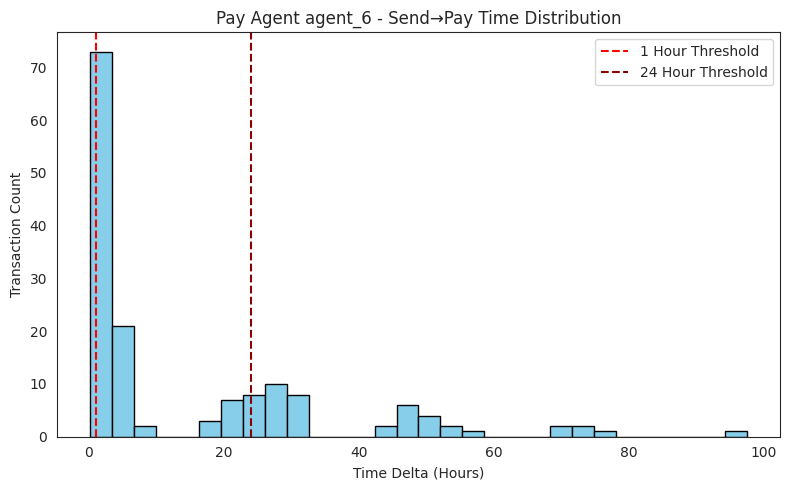

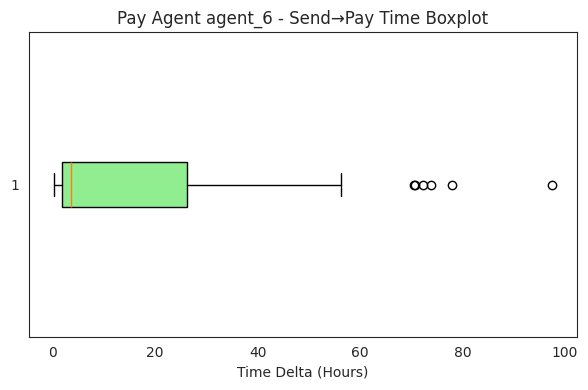

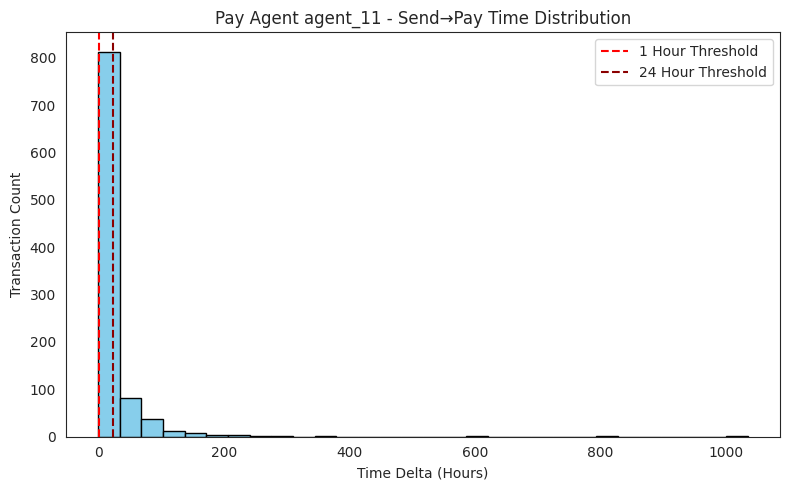

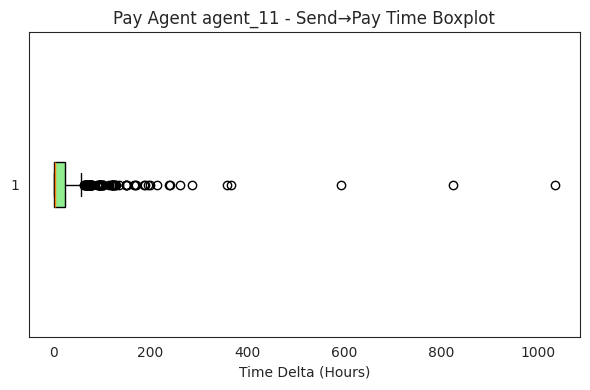

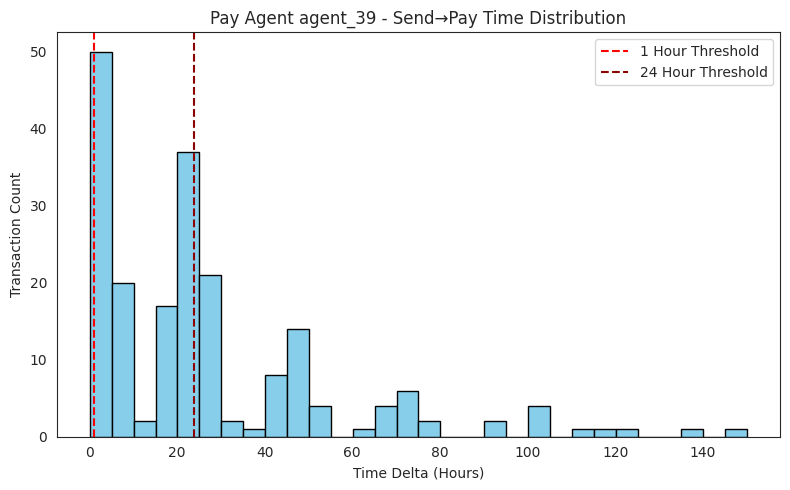

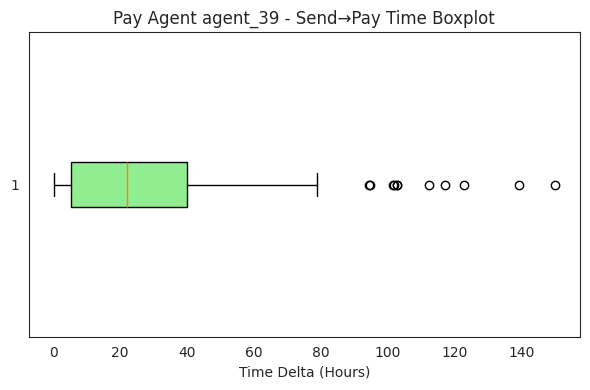

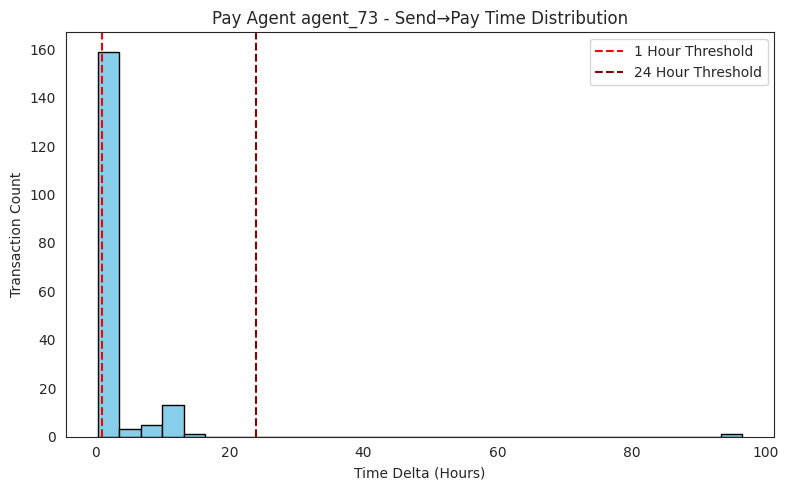

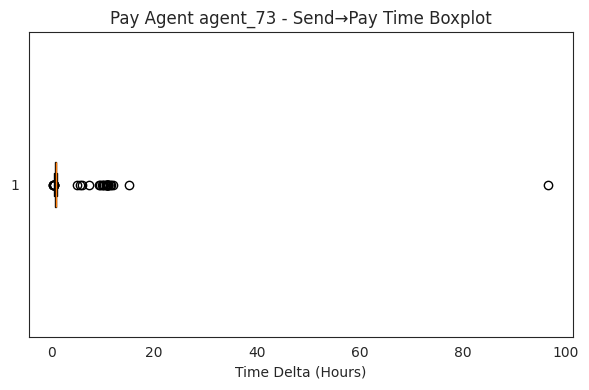

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_delta(df, agent_name, send_col="Send DateTime", pay_col="Pay DateTime"):
    """Histogram + boxplot of send-to-pay time deltas for a Pay Agent."""
    if send_col not in df.columns or pay_col not in df.columns:
        print(f"{agent_name}: Missing datetime columns ({send_col}, {pay_col})")
        return
    
    df = df.copy()
    df[send_col] = pd.to_datetime(df[send_col], errors="coerce")
    df[pay_col]  = pd.to_datetime(df[pay_col], errors="coerce")
    df["Time Delta (hrs)"] = (df[pay_col] - df[send_col]).dt.total_seconds() / 3600
    
    if df["Time Delta (hrs)"].dropna().empty:
        print(f"{agent_name}: No valid time deltas found.\n")
        return
    
    # histogram
    plt.figure(figsize=(8,5))
    plt.hist(df["Time Delta (hrs)"].dropna(), bins=30, color="skyblue", edgecolor="black")
    plt.axvline(1, color="red", linestyle="--", label="1 Hour Threshold")
    plt.axvline(24, color="darkred", linestyle="--", label="24 Hour Threshold")
    plt.title(f"Pay Agent {agent_name} - Send→Pay Time Distribution")
    plt.xlabel("Time Delta (Hours)")
    plt.ylabel("Transaction Count")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # boxplot
    plt.figure(figsize=(6,4))
    plt.boxplot(df["Time Delta (hrs)"].dropna(), vert=False,
                patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    plt.title(f"Pay Agent {agent_name} - Send→Pay Time Boxplot")
    plt.xlabel("Time Delta (Hours)")
    plt.tight_layout()
    plt.show()

# example usage
pay_agents_to_review = ["agent_6", "agent_11", "agent_39", "agent_73"]

for agent in pay_agents_to_review:
    subset = df[df["Pay Agent Name_"] == agent]
    plot_time_delta(subset, agent, send_col="Send DateTime", pay_col="Pay DateTime")


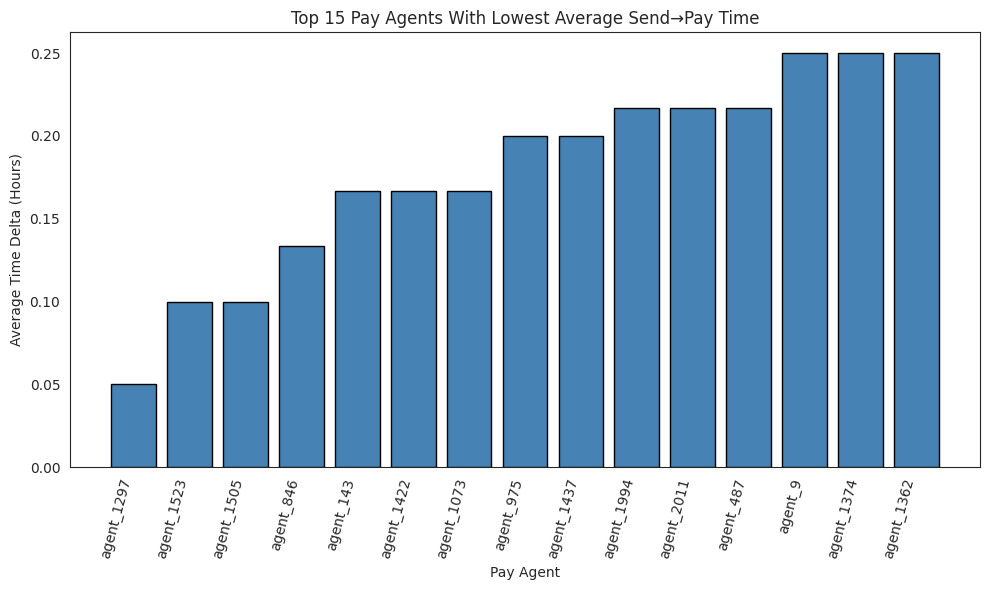

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_fastest_agents(df, send_col="Send DateTime", pay_col="Pay DateTime", agent_col="Pay Agent Name_"):
    """Barplot of top 15 agents with the lowest average send→pay time (in hours)."""
    
    # make sure datetime is parsed
    df = df.copy()
    df[send_col] = pd.to_datetime(df[send_col], errors="coerce")
    df[pay_col]  = pd.to_datetime(df[pay_col], errors="coerce")
    
    # compute delta in hours
    df["Time Delta (hrs)"] = (df[pay_col] - df[send_col]).dt.total_seconds() / 3600
    
    # group by agent and get mean delta
    agent_means = (
        df.dropna(subset=["Time Delta (hrs)"])
          .groupby(agent_col)["Time Delta (hrs)"]
          .mean()
          .sort_values()
          .head(15)
    )
    
    # barplot
    plt.figure(figsize=(10,6))
    plt.bar(agent_means.index, agent_means.values, color="steelblue", edgecolor="black")
    plt.xticks(rotation=75, ha="right")
    plt.title("Top 15 Pay Agents With Lowest Average Send→Pay Time")
    plt.xlabel("Pay Agent")
    plt.ylabel("Average Time Delta (Hours)")
    plt.tight_layout()
    plt.show()

# example usage
plot_fastest_agents(df, send_col="Send DateTime", pay_col="Pay DateTime", agent_col="Pay Agent Name_")


In [ ]:
Link to chatgpt conversation:
https://chatgpt.com/share/68d11875-b56c-800f-8657-5880d999497d

## Appendix

# **Selected column definitions**

- **Sender ID1 Info** - whether a sender indicated his or her ID (binary). In a real anti-money laundering (AML) analysis, this would be an ID number (e.g. a driver's license).
- **Payee ID1 Info** - whether a payee (receiver) indicated his or her ID (binary). In a real anti-money laundering (AML) analysis, this would be an ID number (e.g. a driver's license).
- **Sender Name** - the name of the sender
- **Payee Name** -  the name of the payee (receiver)
- **Send Agent Name** - the physical location or business address where the sender wires money. Frequently, AML cases are initiated because of suspicious transactions being made out of specific stores (or send agents)
- **Send Operator Name -**  the sender's wire transfer operator (such as Western Union)
- **Pay Agent Name -** the physical location or business address where the receiver (payee) receives the money
- **Pay Operator Name** - the receiver's wire transfer operator (again, such as Western Union)

In [ ]:
## 